# Assessing GDPR-Compliance in Web Applications: A Machine Learning Approach

We will assess the GDPR-compliance of web applications based on their privacy policies. We use a classification model, trained on a corpus of 18,397 natural sentences, to classify the privacy policies on whether five General Data Protection Regulation (GDPR) privacy policy core requirements are communicated in the policy.

__Relevance:__ The GDPR applies to any personal data processing of EU citizens. We aim to assess the state of GDPR-compliance in application software based on their privacy policies.

__Focus:__ web applications; as the web application paradigm is widely used due to the omnipresence of web browsers across PCs and mobile devices. In particular, we focus on organisations that provide cloud-based solutions: Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud, Management, and Cloud Storage.


__Goal:__ to scrutinize the privacy policies of web applications using ML, to assess whether core privacy policy requirements are communicated.

#### __RQ:__ What is the state of GDPR-compliance disclosure in web applications?

---

### Step 1: collect list of companies active in the Web Apps industry

To do so we utilize the Crunchbase database that allows us to identify companies that engage in web applications, filtered on location (which in our case will be the European Union). We used 

We've imported 2792 companies using the following criteria:
- Industry: Web Apps
- Location: Europe (European Union)

---

In [1]:
import os
from newspaper import Article
from bs4 import BeautifulSoup
from six.moves.urllib.parse import urlparse
import urllib
import sys
import time
import nltk
import glob
import pandas as pd
import requests
import spacy
import random
# from googlesearch import search
from langdetect import detect
import re
import pickle
import math
import numpy as np
import collections
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from tabulate import tabulate
from IPython.display import display, HTML

### Step 2: read data

In [2]:
path = r'C:\Users\aaberkan\OneDrive - UGent\Scripts\GDPR-Compliance in Web Applications\data\Crunchbase\Cloud'
filenames = glob.glob(path + "/*.csv")

In [3]:
# len = 30
len(filenames)

30

In [4]:
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [5]:
crunch_data = pd.concat(dfs, ignore_index=True)

In [6]:
crunch_data

Organization Name  \
0                 Ex Libris   
1                     Exact   
2                 Xperience   
3                      Sage   
4                    Novahé   
...                     ...   
21235          BackupAddict   
21236  NetConvergence, Inc.   
21237         MyLabBook.com   
21238              Radmedix   
21239    Knockout PC Repair   

                                   Organization Name URL  \
0      https://www.crunchbase.com/organization/ex-libris   
1          https://www.crunchbase.com/organization/exact   
2      https://www.crunchbase.com/organization/xperie...   
3      https://www.crunchbase.com/organization/sage-c1e4   
4         https://www.crunchbase.com/organization/novahé   
...                                                  ...   
21235  https://www.crunchbase.com/organization/backup...   
21236  https://www.crunchbase.com/organization/netcon...   
21237  https://www.crunchbase.com/organization/mylabb...   
21238   https://www.crunchbase.com/organization/radmedix   
21239  https://www.crunchbase.com/organization/knocko...   

                                        Full Description  \
0      Ex Libris Group is a leading provider of libra...   
1      Exact is a global supplier of cloud business s...   
2      Xperience provides software solutions within E...   
3      Sage DPW-Software is now implementing over 100...   
4                                                    NaN   
...                                                  ...   
21235                                                NaN   
21236                                                NaN   
21237                                                NaN   
21238                                                NaN   
21239                                                NaN   

                                              Industries  \
0      Apps, Cloud Computing, Enterprise Software, In...   
1      Accounting, Cloud Computing, CRM, Enterprise R...   
2      Cloud Computing, Consulting, CRM, Enterprise R...   
3      Cloud Computing, Computer, Private Cloud, Secu...   
4      Cloud Computing, Information Technology, IT In...   
...                                                  ...   
21235  Cloud Storage, Information Technology, Profess...   
21236  Cloud Storage, Enterprise Software, Informatio...   
21237       Cloud Data Services, Cloud Storage, Software   
21238  Cloud Storage, Manufacturing, Medical Device, ...   
21239  Cloud Storage, Information Technology, IT Mana...   

                                Website  \
0          http://www.exlibrisgroup.com   
1                  http://www.exact.com   
2      https://www.xperience-group.com/   
3               https://www.sagedpw.at/   
4                https://www.novahe.fr/   
...                                 ...   
21235     https://www.backupaddict.com/   
21236     http://www.netconvergence.com   
21237         https://www.mylabbook.com   
21238              https://radmedix.com   
21239     https://knockoutpcrepair.com/   

                           Headquarters Location  \
0                 Ballerup, Hovedstaden, Denmark   
1           Delft, Zuid-Holland, The Netherlands   
2                 Antrim, Antrim, United Kingdom   
3                          Vienna, Wien, Austria   
4                        Orléans, Centre, France   
...                                          ...   
21235  Jersey Shore, Pennsylvania, United States   
21236     Santa Clara, California, United States   
21237       Texas, South Carolina, United States   
21238                Dayton, Ohio, United States   
21239       Brentwood, California, United States   

                                             Description CB Rank (Company)  \
0      Ex Libris Group is a leading provider of libra...           165,720   
1      Exact is a company that provides cloud based b...           229,780   
2      Xperience provides software solutions within E...           187,002   
3                Sag

In [7]:
# remove duplicates
crunch_data.drop_duplicates(inplace=True)

In [8]:
crunch_data = crunch_data[4244:].copy(deep=True)

In [9]:
crunch_data

Organization Name  \
4673                  trakkies™   
4674                    Viridom   
4675                  Tweekaboo   
4676          cloudscreener.com   
4677                     Nubapp   
...                         ...   
21234  Affordable Cloud Hosting   
21235              BackupAddict   
21236      NetConvergence, Inc.   
21238                  Radmedix   
21239        Knockout PC Repair   

                                   Organization Name URL  \
4673   https://www.crunchbase.com/organization/trakki...   
4674     https://www.crunchbase.com/organization/viridom   
4675   https://www.crunchbase.com/organization/tweekaboo   
4676   https://www.crunchbase.com/organization/clouds...   
4677      https://www.crunchbase.com/organization/nubapp   
...                                                  ...   
21234  https://www.crunchbase.com/organization/afford...   
21235  https://www.crunchbase.com/organization/backup...   
21236  https://www.crunchbase.com/organization/netcon...   
21238   https://www.crunchbase.com/organization/radmedix   
21239  https://www.crunchbase.com/organization/knocko...   

                                        Full Description  \
4673   trakkies is your ambient intelligence platform...   
4674   Viridom is a cloud-based platform for energy m...   
4675   Tweekaboo makes it easy for busy parents to re...   
4676   CloudScreener provides a range of public and p...   
4677   Nubapp is a booking software through a cross-c...   
...                                                  ...   
21234                                                NaN   
21235                                                NaN   
21236                                                NaN   
21238                                                NaN   
21239                                                NaN   

                                              Industries  \
4673   Analytics, Artificial Intelligence, Big Data, ...   
4674                        B2B, Cloud Computing, Energy   
4675   Apps, Cloud Computing, Mobile, Parenting, Prin...   
4676   Cloud Computing, Consulting, IaaS, Infrastructure   
4677                 Cloud Computing, Internet, Software   
...                                                  ...   
21234  Cloud Storage, Information Technology, Web Hos...   
21235  Cloud Storage, Information Technology, Profess...   
21236  Cloud Storage, Enterprise Software, Informatio...   
21238  Cloud Storage, Manufacturing, Medical Device, ...   
21239  Cloud Storage, Information Technology, IT Mana...   

                                     Website  \
4673                 http://www.trakkies.com   
4674                     http://viridom.com/   
4675                http://www.tweekaboo.com   
4676            http://www.cloudscreener.com   
4677                   https://es.nubapp.com   
...                                      ...   
21234  http://www.affordablecloudhosting.com   
21235          https://www.backupaddict.com/   
21236          http://www.netconvergence.com   
21238                   https://radmedix.com   
21239          https://knockoutpcrepair.com/   

                           Headquarters Location  \
4673   Amsterdam, Noord-Holland, The Netherlands   
4674                      Paphos, Paphos, Cyprus   
4675                         Cork, Cork, Ireland   
4676                Paris, Ile-de-France, France   
4677                      Artica, Navarra, Spain   
...                                          ...   
21234              Tampa, Florida, United States   
21235  Jersey Shore, Pennsylvania, United States   
21236     Santa Clara, California, United States   
21238                Dayton, Ohio, United States   
21239       Brentwood, California, United States   

                                             Description CB Rank (Company)  \
4673   trakkies international is an intelligence plat...           150,972   
4674                  Viridom is a cloud-based platform.           155,7

In [10]:
crunch_data.to_csv("crunch_cloud_conc_p2.csv", sep='\t', header=True, index=False)

#### Clean websites list

In [11]:
websites_list = crunch_data["Website"].tolist()

In [12]:
websites_list

['http://www.trakkies.com',
 'http://viridom.com/',
 'http://www.tweekaboo.com',
 'http://www.cloudscreener.com',
 'https://es.nubapp.com',
 'http://www.cleverlize.com',
 'http://www.quolaw.com',
 'http://icebergs.com',
 'http://truepivot.com/',
 'https://en.outscale.com',
 'http://visiobox.co/',
 'http://www.ideedock.com',
 'http://www.innovair.hu/',
 'http://www.socitive.com',
 nan,
 'https://www.iascloud.com',
 'http://www.ferusbestia.com',
 'http://new.mobitile.com',
 'http://swisscloudcomputing.com',
 'http://www.hotelninjas.com',
 'http://www.scards.com',
 'http://elasticdot.com',
 'http://www.prehash.com/',
 'http://www.instagent.com',
 'http://taskmessenger.com',
 'https://www.ocedo.com',
 'http://www.leanciti.com',
 'http://sagacify.com',
 'http://www.beecrm.com',
 'http://www.beondesk.com',
 'http://littlevista.ie',
 'http://www.jemix.de',
 'http://splan.it',
 'https://www.incloudsolutions.co.uk/',
 'http://cloud90.ie/',
 'https://www.bindoc.de',
 'https://www.mycircleinc.com

In [13]:
# remove / from the end of the string that contains the website
# websites_list = [website.rstrip(website[-1]) if (website[-1] == "/") else website for website in websites_list]
websites_list = [website.rstrip(website[-1]) if (isinstance(website, str) and website[-1] == "/") else website for website in websites_list]
# een keer extra voor het geval er een url was met // op het eind
websites_list = [website.rstrip(website[-1]) if (isinstance(website, str) and website[-1] == "/") else website for website in websites_list]

In [14]:
len(websites_list)

13639

---

### Step 3: scrape privacy policies

In [15]:
def get_privacy_policy_url(query):
    keyword_in_title = 0
    attempts = 0
    url = ""
    print("Query: " + query)
    
    try:
        query_results_list = return_google_results(query, 3, 5)
        print("Considering " + str(len(query_results_list)) + " URL(s) ...")
        for i, url in enumerate(query_results_list):
            term_in_url = 0
            attempts = attempts + 1
            print("Assessing privacy policy URL: " + url)
            
            if (re.findall('privacy', url) or re.findall('policy', url) or re.findall('gdpr', url) 
                or re.findall('terms', url) or re.findall('legal', url)): 
                print("Found relevant terms in URL! Succesful break!")
                break

#                     pass
            if keyword_in_title == 1 or attempts == 3 or i==(len(query_results_list)-1): 
                keyword_in_title = 0
                attempts = 0
                print("No results. Breaking ..")
                url = ""
#                 print(sentences)
                break   
    except Exception as e:
            print(str(e))
            pass
    return url

In [16]:
def return_google_results(keywords, num_results, attempts):
    user_agent_list = [
      'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15',
      'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0',
      'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
      'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0',
      'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    ]

    html_keywords = urllib.parse.quote_plus(keywords)
    sleep_init = 10
    
    url = "https://www.google.com/search?q=" + html_keywords + "&num=" + str(num_results)
    print("** Search query in URL: " + url)

    headers = {'User-Agent': random.choice(user_agent_list)}
    
    html = requests.get(url, headers=headers)

    if html.status_code == 429:
        if(attempts == 0):
            sys.exit("Too many request 429, attempted "+ str(5)+ " times, break ...")
        else:
            if 'Retry_After' in html.headers:
                print("Helaas, geen retry-after info")
            else:
                time.sleep(sleep_init)
                print("Too many requests (attempt "+ str(5 - attempts)+ "), we will attempt again in " + str(sleep_init) + " seconds")
                return_google_results(keywords, num_results, (attempts - 1))
    else: 
        pass
        
    soup = BeautifulSoup(html.text, 'html.parser')

    allData = soup.find_all("div",{"class":"g"})

    link_list = []
    print("len alldata: " + str(len(allData)))
    
    for i in range(0,len(allData)):
        link = allData[i].find('a').get('href')
        
        if(link is not None):
            if(link.find('https') != -1 and link.find('http') == 0 and link.find('aclk') == -1):
                print(link)
                link_list.append(link)
    print(link_list)
    return link_list

#### Collect privacy policy URLs

In [17]:
privacy_policies_url_list = []

In [20]:
# loop through each company URL and attempt to find the URL of the privacy policy
count_urls = 0
for i, url_company in enumerate(websites_list):    
    print(i)

#     print(len(privacy_policies_url_list))
    if(isinstance("url_company", str) is False or (url_company == url_company) is False):
        privacy_policies_url_list.append("")
    else:
        query = "site:\"" + url_company + " \"privacy policy"
        privacy_policies_url_list.append(get_privacy_policy_url(query))
        if(len(privacy_policies_url_list[-1]) > 0):
            count_urls = count_urls + 1
    print("URL count: " + str(count_urls))
    print()
    time.sleep(60)

0
Query: site:"http://www.trakkies.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.trakkies.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 0

1
Query: site:"http://viridom.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fviridom.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 0

2
Query: site:"http://www.tweekaboo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tweekaboo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 0

3
Query: site:"http://www.cloudscreener.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudscreener.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 0

4
Query: site:"https://es.nubapp.com "privacy policy
** Search query i

len alldata: 2
https://www.jemix.de/en/contact/
https://www.jemix.de/en/products/dreamwell/
['https://www.jemix.de/en/contact/', 'https://www.jemix.de/en/products/dreamwell/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.jemix.de/en/contact/
Assessing privacy policy URL: https://www.jemix.de/en/products/dreamwell/
No results. Breaking ..
URL count: 3

32
Query: site:"http://splan.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fsplan.it+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3

33
Query: site:"https://www.incloudsolutions.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.incloudsolutions.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.incloudsolutions.co.uk/privacy-policy/
https://www.incloudsolutions.co.uk/contact/
['https://www.incloudsolutions.co.uk/privacy-policy/', 'https://www.incloudsolutions.co.uk/contact/

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 8

55
Query: site:"http://www.psykosoft.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.psykosoft.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 8

56
Query: site:"http://www.keboko.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.keboko.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 8

57
Query: site:"http://www.stackops.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.stackops.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 8

58
Query: site:"https://www.vanquishtech.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.vanquishtech.co.uk+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 8


78
Query: site:"http://www.edyou.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.edyou.eu+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 12

79
Query: site:"https://www.cistec.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cistec.es+%22privacy+policy&num=3
len alldata: 1
https://www.cistec.es/politica-de-privacidad-y-aviso-legal/
['https://www.cistec.es/politica-de-privacidad-y-aviso-legal/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.cistec.es/politica-de-privacidad-y-aviso-legal/
Found relevant terms in URL! Succesful break!
URL count: 13

80
Query: site:"http://www.controlspace.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.controlspace.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 13

81
Query: site:"https://kubex.ch "privacy polic

len alldata: 1
https://privacy.litesoft.fr/
['https://privacy.litesoft.fr/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://privacy.litesoft.fr/
Found relevant terms in URL! Succesful break!
URL count: 17

101
Query: site:"https://danubecloud.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdanubecloud.org+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 17

102
Query: site:"https://www.bluetomato-technologies.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bluetomato-technologies.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 17

103
Query: site:"http://www.dasdata.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.dasdata.co+%22privacy+policy&num=3
len alldata: 2
https://www.dasdata.co/?page=terms
['https://www.dasdata.co/?page=terms']
Considering 1 UR

124
Query: site:"https://sitp.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsitp.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 23

125
Query: site:"http://nordicit.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fnordicit.org+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 23

126
Query: site:"https://www.cloudoko.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudoko.com+%22privacy+policy&num=3
len alldata: 1
https://www.cloudoko.com/forms
['https://www.cloudoko.com/forms']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.cloudoko.com/forms
No results. Breaking ..
URL count: 23

127
Query: site:"https://www.reinsight.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.reinsight.se+%22privacy+pol

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 29

147
Query: site:"http://www.eradvisor.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.eradvisor.com+%22privacy+policy&num=3
len alldata: 1
https://www.eradvisor.com/
['https://www.eradvisor.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.eradvisor.com/
No results. Breaking ..
URL count: 29

148
Query: site:"http://www.incloudtech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.incloudtech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 29

149
Query: site:"http://www.pronest.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pronest.no+%22privacy+policy&num=3
len alldata: 1
https://www.pronest.no/en/cookies-policy/
['https://www.pronest.no/en/cookies-policy/']
Considering 1 URL(s) ...
Assessing privacy policy UR

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 36

168
Query: site:"https://industrious.agency "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Findustrious.agency+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 36

169
Query: site:"https://www.spacedatacentres.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.spacedatacentres.co.uk+%22privacy+policy&num=3
len alldata: 3
https://www.spacedatacentres.co.uk/Privacy
https://www.spacedatacentres.co.uk/cookies
https://www.spacedatacentres.co.uk/terms-and-conditions
['https://www.spacedatacentres.co.uk/Privacy', 'https://www.spacedatacentres.co.uk/cookies', 'https://www.spacedatacentres.co.uk/terms-and-conditions']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.spacedatacentres.co.uk/Privacy
Assessing privacy policy URL: https://www.spacedatacentres.co.uk/cookies
Assessing privacy poli

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 44

189
Query: site:"http://www.diva-cloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.diva-cloud.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 44

190
Query: site:"https://www.swisscloudworkplace.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.swisscloudworkplace.ch+%22privacy+policy&num=3
len alldata: 2
https://www.swisscloudworkplace.ch/en/registrierung-6165.html
https://www.swisscloudworkplace.ch/en/aktuelles/die-geschaeftsleitung-der-swiss-cloud-workplace-gmbh-in-neuer-formation.html
['https://www.swisscloudworkplace.ch/en/registrierung-6165.html', 'https://www.swisscloudworkplace.ch/en/aktuelles/die-geschaeftsleitung-der-swiss-cloud-workplace-gmbh-in-neuer-formation.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.swisscloudworkplace.ch/en/registrierung-6

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 47

215
Query: site:"http://www.adelante.cloud "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.adelante.cloud+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 47

216
Query: site:"https://peasoup.cloud "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpeasoup.cloud+%22privacy+policy&num=3
len alldata: 2
https://peasoup.cloud/peasoup-privacy-policy/
https://peasoup.cloud/data-protection/
['https://peasoup.cloud/peasoup-privacy-policy/', 'https://peasoup.cloud/data-protection/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://peasoup.cloud/peasoup-privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 48

217
Query: site:"http://www.forganiser.be "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.forganiser.be+%22privacy+policy&num

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 51

242
Query: site:"http://www.lunacloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.lunacloud.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 51

243
Query: site:"http://www.WebhostingUK.Com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.WebhostingUK.Com+%22privacy+policy&num=3
len alldata: 2
https://www.webhostinguk.com/cookie-policy.html
https://www.webhostinguk.com/affiliate/affiliate-tos.html
['https://www.webhostinguk.com/cookie-policy.html', 'https://www.webhostinguk.com/affiliate/affiliate-tos.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.webhostinguk.com/cookie-policy.html
Found relevant terms in URL! Succesful break!
URL count: 52

244
Query: site:"https://www.techequity.cloud "privacy policy
** Search query in URL: https://www.google.com/search?q=site

269
Query: site:"http://engagecrm.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fengagecrm.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.engagecrm.co.uk/privacy-policy/
https://www.engagecrm.co.uk/home/
['https://www.engagecrm.co.uk/privacy-policy/', 'https://www.engagecrm.co.uk/home/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.engagecrm.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 55

270
Query: site:"http://www.rco-services.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.rco-services.nl+%22privacy+policy&num=3
len alldata: 2
https://www.rco-services.nl/privacy-verklaring/
https://www.rco-services.nl/particulieren/beveiliging/
['https://www.rco-services.nl/privacy-verklaring/', 'https://www.rco-services.nl/particulieren/beveiliging/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.rco-servi

296
Query: site:"https://www.hixongroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.hixongroup.com+%22privacy+policy&num=3
len alldata: 2
https://www.hixongroup.com/privacy-policy/
https://www.hixongroup.com/policies/
['https://www.hixongroup.com/privacy-policy/', 'https://www.hixongroup.com/policies/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.hixongroup.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 61

297
Query: site:"https://debugle.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdebugle.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 61

298
Query: site:"http://www.qloum.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.qloum.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 61

299
Query: site:"htt

322
Query: site:"http://prymapps.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fprymapps.com+%22privacy+policy&num=3
len alldata: 3
[]
Considering 0 URL(s) ...
URL count: 63

323
Query: site:"https://www.aero.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.aero.se+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 63

324
Query: site:"http://www.attigo.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.attigo.se+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 63

325
Query: site:"http://netacloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fnetacloud.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 63

326
Query: site:"https://xplor.solutions "privacy policy
** Search query in URL: https:/

len alldata: 2
https://podiumidc.com/privacy-policy/
https://podiumidc.com/tcs-privacy-policy/
['https://podiumidc.com/privacy-policy/', 'https://podiumidc.com/tcs-privacy-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://podiumidc.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 66

349
Query: site:"http://www.simplycashflow.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.simplycashflow.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 66

350
Query: site:"https://norilo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnorilo.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 66

351
Query: site:"https://www.interparts.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.interparts.nl+%22privacy+policy&num=3
len alldata

374
Query: site:"http://www.cloud9software.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloud9software.ie+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 72

375
Query: site:"http://www.otomotech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.otomotech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 72

376
Query: site:"http://www.getthebet.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.getthebet.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 72

377
Query: site:"https://creopark.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcreopark.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 72

378
Query: site:"http://www.filerock.com "privacy policy

len alldata: 1
https://fenix.codes/sites/default/files/2020-03/DigitalPhoenixPresentation.pdf
['https://fenix.codes/sites/default/files/2020-03/DigitalPhoenixPresentation.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://fenix.codes/sites/default/files/2020-03/DigitalPhoenixPresentation.pdf
No results. Breaking ..
URL count: 76

401
Query: site:"https://www.allbit.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.allbit.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 76

402
Query: site:"https://www.mybenefitszone.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mybenefitszone.com+%22privacy+policy&num=3
len alldata: 2
https://www.mybenefitszone.com/privacy-policy/
https://www.mybenefitszone.com/terms-conditions/
['https://www.mybenefitszone.com/privacy-policy/', 'https://www.mybenefitszone.com/terms-conditions/']
Considering 2 

424
Query: site:"https://happy-coding.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhappy-coding.com+%22privacy+policy&num=3
len alldata: 3
https://audio.happy-coding.com/privacy/
https://audio.happy-coding.com/
https://happy-coding.com/privacy/
['https://audio.happy-coding.com/privacy/', 'https://audio.happy-coding.com/', 'https://happy-coding.com/privacy/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://audio.happy-coding.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 80

425
Query: site:"https://riberinfo.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Friberinfo.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 80

426
Query: site:"http://www.bitrzr.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.bitrzr.com+%22privacy+policy&num=3
len alldata: 0
[]
Consider

448
Query: site:"https://sarbeluc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsarbeluc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 85

449
Query: site:"https://soconnect.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsoconnect.co.uk+%22privacy+policy&num=3
len alldata: 2
https://soconnect.co.uk/privacy-policy/
https://soconnect.co.uk/terms-of-use/
['https://soconnect.co.uk/privacy-policy/', 'https://soconnect.co.uk/terms-of-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://soconnect.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 86

450
Query: site:"https://www.cavere.be  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cavere.be++%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 86

451
Query: site:"https://ww

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 86

475
Query: site:"https://adwind.cz "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fadwind.cz+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 86

476
Query: site:"https://dinitpartner.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdinitpartner.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 86

477
Query: site:"https://www.linsight.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.linsight.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 86

478
Query: site:"http://www.kaymansolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.kaymansolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 86

510
Query: site:"http://www.threeplicate.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.threeplicate.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 86

511
Query: site:"https://www.xithi.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.xithi.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 86

512
Query: site:"https://www.chelmerit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.chelmerit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 86

513
Query: site:"https://www.exodata.fr/fr/opensphere "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.exodata.fr%2Ffr%2Fopensphere+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 86

514
Query: site:"http:

530
Query: site:"https://riders.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Friders.co+%22privacy+policy&num=3
len alldata: 3
https://riders.co/privacy-policy.html
https://riders.co/terms-of-service.html
https://riders.co/
['https://riders.co/privacy-policy.html', 'https://riders.co/terms-of-service.html', 'https://riders.co/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://riders.co/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 95

531
Query: site:"https://www.leadpages.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.leadpages.com+%22privacy+policy&num=3
len alldata: 3
https://www.leadpages.com/blog/how-to-write-a-privacy-policy/
https://www.leadpages.com/privacy
https://www.leadpages.com/blog/leadpages-gdpr/
['https://www.leadpages.com/blog/how-to-write-a-privacy-policy/', 'https://www.leadpages.com/privacy', 'https://www.leadpag

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 108

548
Query: site:"http://stayntouch.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fstayntouch.com+%22privacy+policy&num=3
len alldata: 2
https://www.stayntouch.com/privacy/
https://www.stayntouch.com/blog/hotel-data-management-the-impact-of-gdpr-on-the-hotel-sector/
['https://www.stayntouch.com/privacy/', 'https://www.stayntouch.com/blog/hotel-data-management-the-impact-of-gdpr-on-the-hotel-sector/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.stayntouch.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 109

549
Query: site:"http://www.plivo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.plivo.com+%22privacy+policy&num=3
len alldata: 2
https://www.plivo.com/legal/privacy/
https://www.plivo.com/security/
['https://www.plivo.com/legal/privacy/', 'https://www.plivo.com/security/']
Co

566
Query: site:"http://www.treasuredata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.treasuredata.com+%22privacy+policy&num=3
len alldata: 2
https://www.treasuredata.com/privacy/
https://www.treasuredata.com/security/personalization-with-privacy-and-trust/
['https://www.treasuredata.com/privacy/', 'https://www.treasuredata.com/security/personalization-with-privacy-and-trust/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.treasuredata.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 123

567
Query: site:"http://www.master-pos.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.master-pos.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 123

568
Query: site:"http://www.dincloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.dincloud.com+%22privacy+po

584
Query: site:"https://platform9.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fplatform9.com+%22privacy+policy&num=3
len alldata: 2
https://community.platform9.com/privacy
https://platform9.com/security/
['https://community.platform9.com/privacy', 'https://platform9.com/security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://community.platform9.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 135

585
Query: site:"http://www.talentoday.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.talentoday.com+%22privacy+policy&num=3
len alldata: 2
https://www.talentoday.com/product-training/
https://www.talentoday.com/thought-leadership/
['https://www.talentoday.com/product-training/', 'https://www.talentoday.com/thought-leadership/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.talentoday.com/product-training/
Assessing privacy

len alldata: 2
https://www.leansentry.com/About/Privacy
https://www.leansentry.com/Privacy
['https://www.leansentry.com/About/Privacy', 'https://www.leansentry.com/Privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.leansentry.com/About/Privacy
Assessing privacy policy URL: https://www.leansentry.com/Privacy
No results. Breaking ..
URL count: 143

601
Query: site:"http://supplyshift.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fsupplyshift.net+%22privacy+policy&num=3
len alldata: 2
https://www.supplyshift.net/privacy-policy/
https://www.supplyshift.net/wp-content/uploads/2020/10/Privacy-Policy-2020.pdf
['https://www.supplyshift.net/privacy-policy/', 'https://www.supplyshift.net/wp-content/uploads/2020/10/Privacy-Policy-2020.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.supplyshift.net/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 144

602
Query: site:"http

617
Query: site:"https://bcinthecloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbcinthecloud.com+%22privacy+policy&num=3
len alldata: 2
https://discover.bcinthecloud.com/
https://bcinthecloud.com/contact/
['https://discover.bcinthecloud.com/', 'https://bcinthecloud.com/contact/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://discover.bcinthecloud.com/
Assessing privacy policy URL: https://bcinthecloud.com/contact/
No results. Breaking ..
URL count: 156

618
Query: site:"https://www.trilio.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.trilio.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 156

619
Query: site:"http://fra.me "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ffra.me+%22privacy+policy&num=3
len alldata: 2
https://fra.me/dpa
https://fra.me/pp
['https://fra.me/dpa', 'ht

633
Query: site:"http://www.nebula.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nebula.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 165

634
Query: site:"http://www.enquiresolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.enquiresolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 165

635
Query: site:"https://nirmata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnirmata.com+%22privacy+policy&num=3
len alldata: 2
https://nirmata.com/privacy-policy/
https://nirmata.com/security-policy/
['https://nirmata.com/privacy-policy/', 'https://nirmata.com/security-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://nirmata.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 166

636
Query: site:"https://w

651
Query: site:"http://www.cloudamize.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudamize.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudamize.com/en/legal/privacy-notice/
https://www.cloudamize.com/en/legal/cookies/
['https://www.cloudamize.com/en/legal/privacy-notice/', 'https://www.cloudamize.com/en/legal/cookies/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudamize.com/en/legal/privacy-notice/
Found relevant terms in URL! Succesful break!
URL count: 177

652
Query: site:"http://coreos.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcoreos.com+%22privacy+policy&num=3
len alldata: 2
https://coreos.com/newsletter/
https://coreos.com/clair/
['https://coreos.com/newsletter/', 'https://coreos.com/clair/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://coreos.com/newsletter/
Assessing privacy policy URL: https://coreos.co

len alldata: 1
https://www.ipfolio.com/
['https://www.ipfolio.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.ipfolio.com/
No results. Breaking ..
URL count: 184

670
Query: site:"https://www.cyberbahnit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cyberbahnit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 184

671
Query: site:"http://arganteal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Farganteal.com+%22privacy+policy&num=3
len alldata: 2
https://www.arganteal.com/privacy-policy/
https://www.arganteal.com/site-map/
['https://www.arganteal.com/privacy-policy/', 'https://www.arganteal.com/site-map/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.arganteal.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 185

672
Query: site:"https://cloudwell.io "privacy policy
** Se

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 193

692
Query: site:"http://www.nexkey.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nexkey.com+%22privacy+policy&num=3
len alldata: 2
https://www.nexkey.com/privacy
https://www.nexkey.com/terms-of-service
['https://www.nexkey.com/privacy', 'https://www.nexkey.com/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.nexkey.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 194

693
Query: site:"http://www.telapi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.telapi.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 194

694
Query: site:"https://www.rgtech-elp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rgtech-elp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ..

len alldata: 2
https://www.tikamobile.com/privacy-policy
https://www.tikamobile.com/privacy-policy/customerdata/
['https://www.tikamobile.com/privacy-policy', 'https://www.tikamobile.com/privacy-policy/customerdata/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tikamobile.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 200

716
Query: site:"https://www.btreesolutionsinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.btreesolutionsinc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 200

717
Query: site:"https://procomitsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fprocomitsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 200

718
Query: site:"http://www.gizmo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%2

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 207

737
Query: site:"https://agendasec.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fagendasec.com+%22privacy+policy&num=3
len alldata: 3
https://ascent.dev.agendasec.com/?page_id=121
https://ascent.dev.agendasec.com/?page_id=164
https://ascent.dev.agendasec.com/?page_id=247
['https://ascent.dev.agendasec.com/?page_id=121', 'https://ascent.dev.agendasec.com/?page_id=164', 'https://ascent.dev.agendasec.com/?page_id=247']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://ascent.dev.agendasec.com/?page_id=121
Assessing privacy policy URL: https://ascent.dev.agendasec.com/?page_id=164
Assessing privacy policy URL: https://ascent.dev.agendasec.com/?page_id=247
No results. Breaking ..
URL count: 207

738
Query: site:"https://fanout.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffanout.io+%22privacy+policy&num=3
len allda

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 214

757
Query: site:"https://www.arbeitsoftware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.arbeitsoftware.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 214

758
Query: site:"http://www.plow.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.plow.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 214

759
Query: site:"http://salsify.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fsalsify.com+%22privacy+policy&num=3
len alldata: 2
https://www.salsify.com/privacy-policy
https://www.salsify.com/fr/confidentialit%C3%A9
['https://www.salsify.com/privacy-policy', 'https://www.salsify.com/fr/confidentialit%C3%A9']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.salsify.com/privacy-policy
Found 

len alldata: 2
https://www.lendingrobot.com/ref/EZkqC647/
https://www.lendingrobot.com/legal/terms.html
['https://www.lendingrobot.com/ref/EZkqC647/', 'https://www.lendingrobot.com/legal/terms.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.lendingrobot.com/ref/EZkqC647/
Assessing privacy policy URL: https://www.lendingrobot.com/legal/terms.html
Found relevant terms in URL! Succesful break!
URL count: 221

777
Query: site:"http://www.zulu-inc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.zulu-inc.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 221

778
Query: site:"http://www.saisei.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.saisei.com+%22privacy+policy&num=3
len alldata: 1
https://www.saisei.com/eula
['https://www.saisei.com/eula']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.saisei.com/eu

804
Query: site:"http://orchestrate.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Forchestrate.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 225

805
Query: site:"http://banyan.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fbanyan.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 225

806
Query: site:"http://edepoze.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fedepoze.com+%22privacy+policy&num=3
len alldata: 3
https://edepoze.com/
https://edepoze.com/category/lawyer-stuff/page/25/
https://edepoze.com/author/daviddunn/page/26/
['https://edepoze.com/', 'https://edepoze.com/category/lawyer-stuff/page/25/', 'https://edepoze.com/author/daviddunn/page/26/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://edepoze.com/
Assessing privacy policy URL: https://edep

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 227

831
Query: site:"http://mobiscope.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fmobiscope.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 227

832
Query: site:"http://www.gumbuya.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.gumbuya.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 227

833
Query: site:"http://www.qwinix.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.qwinix.io+%22privacy+policy&num=3
len alldata: 1
https://www.qwinix.io/blog/snowflake-vs-bigquery
['https://www.qwinix.io/blog/snowflake-vs-bigquery']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.qwinix.io/blog/snowflake-vs-bigquery
No results. Breaking ..
URL count: 227

834
Query: site:"http://www.lambdazen.com "pr

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 230

857
Query: site:"http://courseweaver.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcourseweaver.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 230

858
Query: site:"http://itsmerocks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fitsmerocks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 230

859
Query: site:"https://www.flentis.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.flentis.com+%22privacy+policy&num=3
len alldata: 2
https://www.flentis.com/privacy-policy
https://www.flentis.com/terms-conditions
['https://www.flentis.com/privacy-policy', 'https://www.flentis.com/terms-conditions']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.flentis.com/privacy-policy
Found relevant terms

883
Query: site:"http://www.midcloudcomputing.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.midcloudcomputing.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 235

884
Query: site:"https://solvuu.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsolvuu.com+%22privacy+policy&num=3
len alldata: 2
https://solvuu.com/privacy
https://solvuu.com/terms
['https://solvuu.com/privacy', 'https://solvuu.com/terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://solvuu.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 236

885
Query: site:"https://lessbits.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Flessbits.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 236

886
Query: site:"https://virtuvent.com "privacy policy
** Search query in URL: 

909
Query: site:"http://www.net3it.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.net3it.com+%22privacy+policy&num=3
len alldata: 2
https://www.net3it.com/privacy-policy/
https://www.net3it.com/5-commonly-overlooked-it-security-risks/
['https://www.net3it.com/privacy-policy/', 'https://www.net3it.com/5-commonly-overlooked-it-security-risks/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.net3it.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 239

910
Query: site:"http://www.alphaactual.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.alphaactual.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 239

911
Query: site:"https://www.wingumd.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.wingumd.com+%22privacy+policy&num=3
len alldata: 2
https://w

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 246

929
Query: site:"https://jbtechent.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fjbtechent.com+%22privacy+policy&num=3
len alldata: 3
https://jbtechent.com/privacy-policy/
https://jbtechent.com/cybersecurity-2/
https://jbtechent.com/
['https://jbtechent.com/privacy-policy/', 'https://jbtechent.com/cybersecurity-2/', 'https://jbtechent.com/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://jbtechent.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 247

930
Query: site:"https://www.affluentsolution.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.affluentsolution.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 247

931
Query: site:"https://smartchoicetech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3

958
Query: site:"http://www.servedby.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.servedby.net+%22privacy+policy&num=3
len alldata: 2
https://www.servedby.net/about/auptos
https://www.servedby.net/cloud/private
['https://www.servedby.net/about/auptos', 'https://www.servedby.net/cloud/private']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.servedby.net/about/auptos
Assessing privacy policy URL: https://www.servedby.net/cloud/private
No results. Breaking ..
URL count: 250

959
Query: site:"https://www.hcloudconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.hcloudconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 250

960
Query: site:"https://www.altusmeus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.altusmeus.com+%22privacy+policy&num=3
len alldat

985
Query: site:"https://www.polleosystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.polleosystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 255

986
Query: site:"https://www.securify.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.securify.us+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 255

987
Query: site:"http://cobooco.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcobooco.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 255

988
Query: site:"https://cloudladderconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudladderconsulting.com+%22privacy+policy&num=3
len alldata: 2
https://cloudladderconsulting.com/privacy-policy/
https://cloudladderconsultin

1009
Query: site:"http://www.mysafeplace.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.mysafeplace.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 261

1010
Query: site:"http://www.4ditsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.4ditsolutions.com+%22privacy+policy&num=3
len alldata: 3
https://www.4ditsolutions.com/
https://www.4ditsolutions.com/?page_id=63
https://www.4ditsolutions.com/?page_id=53
['https://www.4ditsolutions.com/', 'https://www.4ditsolutions.com/?page_id=63', 'https://www.4ditsolutions.com/?page_id=53']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.4ditsolutions.com/
Assessing privacy policy URL: https://www.4ditsolutions.com/?page_id=63
Assessing privacy policy URL: https://www.4ditsolutions.com/?page_id=53
No results. Breaking ..
URL count: 261

1011
Query: site:"http://www.shipzi.com "pri

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 264

1033
Query: site:"http://www.thehackerati.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.thehackerati.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 264

1034
Query: site:"http://sbsinfosystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fsbsinfosystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 264

1035
Query: site:"https://www.infradms.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.infradms.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 264

1036
Query: site:"http://www.xsyncapp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.xsyncapp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s)

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 268

1059
Query: site:"http://www.schoolhouseit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.schoolhouseit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 268

1060
Query: site:"https://www.cloudvmssolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudvmssolutions.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudvmssolutions.com/privacy-policy/
https://www.cloudvmssolutions.com/recursos/case-studies/
['https://www.cloudvmssolutions.com/privacy-policy/', 'https://www.cloudvmssolutions.com/recursos/case-studies/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudvmssolutions.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 269

1061
Query: site:"https://www.rsmittechnologies.com "privacy policy
** Search query in URL: h

len alldata: 1
https://cloud-shape.com/services/cloudsecure/
['https://cloud-shape.com/services/cloudsecure/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://cloud-shape.com/services/cloudsecure/
No results. Breaking ..
URL count: 270

1083
Query: site:"http://www.bigtwist.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.bigtwist.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 270

1084
Query: site:"http://ripcloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fripcloud.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 270

1085
Query: site:"https://viapoint.co/home "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fviapoint.co%2Fhome+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 270

1086
Query: site:"http://irisnote.com "pr

len alldata: 1
https://bitsbusinessit.com/top-10-cyber-crime-prevention-tips/
['https://bitsbusinessit.com/top-10-cyber-crime-prevention-tips/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://bitsbusinessit.com/top-10-cyber-crime-prevention-tips/
No results. Breaking ..
URL count: 270

1110
Query: site:"http://www.msamazing.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.msamazing.com+%22privacy+policy&num=3
len alldata: 3
https://www.msamazing.com/privacy-policy/
https://www.msamazing.com/join/
https://www.msamazing.com/membership-plans/
['https://www.msamazing.com/privacy-policy/', 'https://www.msamazing.com/join/', 'https://www.msamazing.com/membership-plans/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.msamazing.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 271

1111
Query: site:"https://www.rcgiltner.com "privacy policy
** Search query in URL: https://www.g

1133
Query: site:"https://www.mavtechsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mavtechsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 274

1134
Query: site:"https://www.pathwaysinternational.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pathwaysinternational.com+%22privacy+policy&num=3
len alldata: 2
https://www.pathwaysinternational.com/privacy/
https://www.pathwaysinternational.com/2017/05/22/tableau-best-solution-business-intelligence-needs/
['https://www.pathwaysinternational.com/privacy/', 'https://www.pathwaysinternational.com/2017/05/22/tableau-best-solution-business-intelligence-needs/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pathwaysinternational.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 275

1135
Query: site:"http://www.collager.com "privacy policy
*

1160
Query: site:"http://cueris.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcueris.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 279

1161
Query: site:"https://www.teclaunch.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.teclaunch.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 279

1162
Query: site:"https://www.volturius.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.volturius.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 279

1163
Query: site:"http://tagaboom.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ftagaboom.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 279

1164
Query: site:"http://inqune.com "privacy policy
** Search qu

1187
Query: site:"http://www.skuserve.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.skuserve.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 281

1188
URL count: 281

1189
Query: site:"https://www.kaizenitservices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.kaizenitservices.com+%22privacy+policy&num=3
len alldata: 2
https://www.kaizenitservices.com/our-work/
https://www.kaizenitservices.com/contact-kaizen-it/
['https://www.kaizenitservices.com/our-work/', 'https://www.kaizenitservices.com/contact-kaizen-it/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.kaizenitservices.com/our-work/
Assessing privacy policy URL: https://www.kaizenitservices.com/contact-kaizen-it/
No results. Breaking ..
URL count: 281

1190
Query: site:"http://www.smartandmobile.net "privacy policy
** Search query in URL: https://www.google.com/sea

1211
Query: site:"http://www.turnkey-lender.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.turnkey-lender.com+%22privacy+policy&num=3
len alldata: 2
https://www.turnkey-lender.com/privacy-policy/
https://www.turnkey-lender.com/turnkey-lender-support-policy/
['https://www.turnkey-lender.com/privacy-policy/', 'https://www.turnkey-lender.com/turnkey-lender-support-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.turnkey-lender.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 289

1212
Query: site:"http://le-vel.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fle-vel.com+%22privacy+policy&num=3
len alldata: 2
https://le-vel.com/Terms
https://media.le-vel.com/Documents/Policies_Procedures.pdf
['https://le-vel.com/Terms', 'https://media.le-vel.com/Documents/Policies_Procedures.pdf']
Considering 2 URL(s) ...
Assessing privacy policy 

1227
Query: site:"https://baremetrics.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbaremetrics.com+%22privacy+policy&num=3
len alldata: 2
https://baremetrics.com/privacy
https://baremetrics.com/privacy-shield
['https://baremetrics.com/privacy', 'https://baremetrics.com/privacy-shield']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://baremetrics.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 300

1228
Query: site:"https://automate.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fautomate.io+%22privacy+policy&num=3
len alldata: 2
https://automate.io/privacy-policy
['https://automate.io/privacy-policy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://automate.io/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 301

1229
Query: site:"http://www.salesrabbit.com "privacy policy
** Search query in URL: https://www.g

1245
Query: site:"https://almusnet.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Falmusnet.com+%22privacy+policy&num=3
len alldata: 1
https://almusnet.com/
['https://almusnet.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://almusnet.com/
No results. Breaking ..
URL count: 312

1246
Query: site:"http://www.vultus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.vultus.com+%22privacy+policy&num=3
len alldata: 2
https://www.vultus.com/privacy-policy/
https://www.vultus.com/terms-and-conditions/
['https://www.vultus.com/privacy-policy/', 'https://www.vultus.com/terms-and-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.vultus.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 313

1247
Query: site:"http://sprintray.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A

1263
Query: site:"https://www.nops.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.nops.io+%22privacy+policy&num=3
len alldata: 2
https://www.nops.io/privacy-policy/
https://www.nops.io/terms-of-service/
['https://www.nops.io/privacy-policy/', 'https://www.nops.io/terms-of-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.nops.io/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 323

1264
Query: site:"http://www.techniphi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.techniphi.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 323

1265
Query: site:"http://www.bestretail.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.bestretail.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 323

1266
Query: site:"https://w

1281
Query: site:"https://www.ultatel.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ultatel.com+%22privacy+policy&num=3
len alldata: 2
https://www.ultatel.com/terms/privacy/data-network/?utm_source=rss&utm_medium=rss&utm_campaign=data-network
https://www.ultatel.com/school-phone-system/
['https://www.ultatel.com/terms/privacy/data-network/?utm_source=rss&utm_medium=rss&utm_campaign=data-network', 'https://www.ultatel.com/school-phone-system/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ultatel.com/terms/privacy/data-network/?utm_source=rss&utm_medium=rss&utm_campaign=data-network
Found relevant terms in URL! Succesful break!
URL count: 336

1282
Query: site:"http://www.itopia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.itopia.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 336

1283
Query: site:"http://traceair.ne

len alldata: 3
https://datica.com/blog/best-practices-for-successful-ehr-data-integration
https://datica.com/blog/onc-cms-final-rules-part-4-implementation
https://datica.com/blog/hl7-integration-challenges-
['https://datica.com/blog/best-practices-for-successful-ehr-data-integration', 'https://datica.com/blog/onc-cms-final-rules-part-4-implementation', 'https://datica.com/blog/hl7-integration-challenges-']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://datica.com/blog/best-practices-for-successful-ehr-data-integration
Assessing privacy policy URL: https://datica.com/blog/onc-cms-final-rules-part-4-implementation
Assessing privacy policy URL: https://datica.com/blog/hl7-integration-challenges-
No results. Breaking ..
URL count: 347

1299
Query: site:"https://www.diamanti.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.diamanti.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 347

13

1313
Query: site:"https://www.thundercomm.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.thundercomm.com+%22privacy+policy&num=3
len alldata: 2
https://www.thundercomm.com/privacy-policy/
https://www.thundercomm.com/documents/cm6125-c6125-doc-list/
['https://www.thundercomm.com/privacy-policy/', 'https://www.thundercomm.com/documents/cm6125-c6125-doc-list/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.thundercomm.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 355

1314
Query: site:"http://www.ostendio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ostendio.com+%22privacy+policy&num=3
len alldata: 2
https://www.ostendio.com/privacy-policy
https://www.ostendio.com/myvcm-security-and-privacy-framework
['https://www.ostendio.com/privacy-policy', 'https://www.ostendio.com/myvcm-security-and-privacy-framework']
Considering 2 URL

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 362

1332
Query: site:"https://proknowsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fproknowsystems.com+%22privacy+policy&num=3
len alldata: 2
https://proknowsystems.com/privacy
https://support.proknowsystems.com/hc/en-us/articles/360022092854-Privacy-and-Security
['https://proknowsystems.com/privacy', 'https://support.proknowsystems.com/hc/en-us/articles/360022092854-Privacy-and-Security']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://proknowsystems.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 363

1333
Query: site:"https://www.infoworks.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.infoworks.io+%22privacy+policy&num=3
len alldata: 2
https://www.infoworks.io/privacy/
https://www.infoworks.io/terms/
['https://www.infoworks.io/privacy/', 'https://www.infoworks.io/terms/']
Consi

1350
Query: site:"https://www.effivity.com/index.htm "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.effivity.com%2Findex.htm+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 373

1351
Query: site:"https://www.vinixglobal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.vinixglobal.com+%22privacy+policy&num=3
len alldata: 3
https://www.vinixglobal.com/legal/Vinix-Privacy-Policy.pdf
https://www.vinixglobal.com/legal.html
https://www.vinixglobal.com/legal/Vinix%20Master%20Services%20Agreement.pdf
['https://www.vinixglobal.com/legal/Vinix-Privacy-Policy.pdf', 'https://www.vinixglobal.com/legal.html', 'https://www.vinixglobal.com/legal/Vinix%20Master%20Services%20Agreement.pdf']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.vinixglobal.com/legal/Vinix-Privacy-Policy.pdf
Found relevant terms in URL! Succesful break!
URL count: 374

1352

1370
Query: site:"https://www.nimbus-logic.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.nimbus-logic.com+%22privacy+policy&num=3
len alldata: 2
https://www.nimbus-logic.com/privacy-policy/
https://www.nimbus-logic.com/security-compliance/hipaa-security-service/
['https://www.nimbus-logic.com/privacy-policy/', 'https://www.nimbus-logic.com/security-compliance/hipaa-security-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.nimbus-logic.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 382

1371
Query: site:"https://www.makeSEA.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.makeSEA.com+%22privacy+policy&num=3
len alldata: 2
https://www.makesea.com/privacy-policy/
https://www.makesea.com/contact-us/
['https://www.makesea.com/privacy-policy/', 'https://www.makesea.com/contact-us/']
Considering 2 URL(s) ...
Assessing priva

1385
Query: site:"http://www.rypplzz.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.rypplzz.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 390

1386
Query: site:"http://www.promptworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.promptworks.com+%22privacy+policy&num=3
len alldata: 2
https://www.promptworks.com/privacy
https://www.promptworks.com/services
['https://www.promptworks.com/privacy', 'https://www.promptworks.com/services']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.promptworks.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 391

1387
Query: site:"https://sflscientific.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsflscientific.com+%22privacy+policy&num=3
len alldata: 2
https://www.sflscientific.com/terms-of-use/
https://www.sflscie

1405
Query: site:"https://eagletc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Feagletc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 401

1406
Query: site:"https://internetsciences.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Finternetsciences.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 401

1407
Query: site:"https://www.brmwebdev.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.brmwebdev.com+%22privacy+policy&num=3
len alldata: 1
https://www.brmwebdev.com/privacy-and-terms
['https://www.brmwebdev.com/privacy-and-terms']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.brmwebdev.com/privacy-and-terms
Found relevant terms in URL! Succesful break!
URL count: 402

1408
Query: site:"https://getway.org "privacy policy
** Search query in URL:

len alldata: 1
https://www.appcorelabs.com/privacyterms/
['https://www.appcorelabs.com/privacyterms/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.appcorelabs.com/privacyterms/
Found relevant terms in URL! Succesful break!
URL count: 410

1425
Query: site:"http://www.stackrox.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.stackrox.com+%22privacy+policy&num=3
len alldata: 2
https://www.stackrox.com/privacy/
https://www.stackrox.com/wiki/cis-benchmarks-for-docker/
['https://www.stackrox.com/privacy/', 'https://www.stackrox.com/wiki/cis-benchmarks-for-docker/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.stackrox.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 411

1426
Query: site:"https://www.thinkaholics.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.thinkaholics.com+%22privacy+policy&num=3
len alldata: 0
[]

1444
Query: site:"https://www.remend.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.remend.com+%22privacy+policy&num=3
len alldata: 2
https://www.remend.com/privacy-policy/
https://www.remend.com/terms-of-use/
['https://www.remend.com/privacy-policy/', 'https://www.remend.com/terms-of-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.remend.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 420

1445
Query: site:"https://gooribi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgooribi.com+%22privacy+policy&num=3
len alldata: 2
https://gooribi.com/home/privacy-security-policy/
https://gooribi.com/home/about-us/
['https://gooribi.com/home/privacy-security-policy/', 'https://gooribi.com/home/about-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://gooribi.com/home/privacy-security-policy/
Found relevant terms in URL

1464
Query: site:"https://www.intel.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.intel.com+%22privacy+policy&num=3
len alldata: 2
https://www.intel.com/content/www/us/en/privacy/intel-privacy-notice.html
https://www.intel.com/content/www/us/en/policy/policy-privacy.html
['https://www.intel.com/content/www/us/en/privacy/intel-privacy-notice.html', 'https://www.intel.com/content/www/us/en/policy/policy-privacy.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.intel.com/content/www/us/en/privacy/intel-privacy-notice.html
Found relevant terms in URL! Succesful break!
URL count: 430

1465
Query: site:"https://www.rubrik.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rubrik.com+%22privacy+policy&num=3
len alldata: 2
https://www.rubrik.com/legal/privacy-policy
https://www.rubrik.com/legal/ccpa-compliance
['https://www.rubrik.com/legal/privacy-policy', 'ht

1485
Query: site:"https://www.neumob.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.neumob.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 435

1486
Query: site:"http://www.pixvana.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pixvana.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 435

1487
Query: site:"http://bluesentryit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fbluesentryit.com+%22privacy+policy&num=3
len alldata: 2
https://bluesentryit.com/author/jordanb
https://bluesentryit.com/about
['https://bluesentryit.com/author/jordanb', 'https://bluesentryit.com/about']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://bluesentryit.com/author/jordanb
Assessing privacy policy URL: https://bluesentryit.com/about
No results. Breaking ..
URL coun

1510
Query: site:"http://www.supplyhub.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.supplyhub.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 440

1511
Query: site:"https://www.distelli.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.distelli.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 440

1512
Query: site:"http://nouvola.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fnouvola.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 440

1513
Query: site:"https://petrode.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpetrode.com+%22privacy+policy&num=3
len alldata: 2
https://petrode.com/privacy-policy/
https://app.petrode.com/
['https://petrode.com/privacy-policy/', 'https://

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 444

1539
Query: site:"https://mediaops.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmediaops.com+%22privacy+policy&num=3
len alldata: 1
https://mediaops.com/
['https://mediaops.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://mediaops.com/
No results. Breaking ..
URL count: 444

1540
Query: site:"https://m.ly "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fm.ly+%22privacy+policy&num=3
len alldata: 2
https://m.ly/dl
https://m.ly/wiki/
['https://m.ly/dl', 'https://m.ly/wiki/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://m.ly/dl
Assessing privacy policy URL: https://m.ly/wiki/
No results. Breaking ..
URL count: 444

1541
Query: site:"http://bookingsocial.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fbookingsocial.com+%22privacy+policy&num=3
l

1566
Query: site:"https://www.leaporbit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.leaporbit.com+%22privacy+policy&num=3
len alldata: 2
https://www.leaporbit.com/privacy-policy
https://www.leaporbit.com/convergent-api-key-request
['https://www.leaporbit.com/privacy-policy', 'https://www.leaporbit.com/convergent-api-key-request']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.leaporbit.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 449

1567
Query: site:"http://www.powerupcloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.powerupcloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.powerupcloud.com/
https://www.powerupcloud.com/aws-eks-authentication-and-authorization-using-aws-single-signon/
['https://www.powerupcloud.com/', 'https://www.powerupcloud.com/aws-eks-authentication-and-authorization-using-aws-single-si

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 454

1588
Query: site:"https://www.sourcemeridian.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sourcemeridian.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 454

1589
Query: site:"http://www.csuiteapp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.csuiteapp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 454

1590
Query: site:"http://www.dispatchr.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.dispatchr.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 454

1591
Query: site:"http://www.strategicmissionelements.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.strategicmissionelements.com+%22privacy+policy&num=3
le

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 461

1613
Query: site:"https://www.cannytechsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cannytechsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 461

1614
Query: site:"https://www.winstrihosting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.winstrihosting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 461

1615
Query: site:"https://www.kodiakdata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.kodiakdata.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 461

1616
Query: site:"https://www.hensoft.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.hensoft.us+%22privacy+policy&num=3
len alldata:

1635
Query: site:"http://www.fwnconsult-it.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.fwnconsult-it.com+%22privacy+policy&num=3
len alldata: 2
https://www.fwnconsult-it.com/privacy-policy/
https://www.fwnconsult-it.com/about-us/contact-us/
['https://www.fwnconsult-it.com/privacy-policy/', 'https://www.fwnconsult-it.com/about-us/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.fwnconsult-it.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 467

1636
Query: site:"https://www.tempest.house "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tempest.house+%22privacy+policy&num=3
len alldata: 2
https://www.tempest.house/blog-categories/leadership
https://www.tempest.house/blog-posts/how-to-architect-iot-based-apps
['https://www.tempest.house/blog-categories/leadership', 'https://www.tempest.house/blog-posts/how-to-architect-io

1656
Query: site:"https://www.bvhllc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bvhllc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 472

1657
Query: site:"https://www.meteormanaged.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.meteormanaged.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 472

1658
Query: site:"https://ckallc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fckallc.com+%22privacy+policy&num=3
len alldata: 1
https://ckallc.com/careers
['https://ckallc.com/careers']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://ckallc.com/careers
No results. Breaking ..
URL count: 472

1659
Query: site:"http://avanisystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Favanisystems.com

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 478

1681
Query: site:"https://www.apptoza.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.apptoza.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 478

1682
Query: site:"https://www.slyseed.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.slyseed.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 478

1683
Query: site:"https://www.ciyis.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ciyis.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 478

1684
Query: site:"https://adeptcore.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fadeptcore.com+%22privacy+policy&num=3
len alldata: 2
https://cpanel.adeptcore.com/resetpass?start=

len alldata: 2
https://acquiresoftware.com/
https://acquiresoftware.com/company-page.html
['https://acquiresoftware.com/', 'https://acquiresoftware.com/company-page.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://acquiresoftware.com/
Assessing privacy policy URL: https://acquiresoftware.com/company-page.html
No results. Breaking ..
URL count: 480

1710
Query: site:"https://briviant.com/pages "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbriviant.com%2Fpages+%22privacy+policy&num=3
len alldata: 3
https://briviant.com/pages/privacy-policy-2/
https://briviant.com/pages/contact/
https://briviant.com/pages/careers/
['https://briviant.com/pages/privacy-policy-2/', 'https://briviant.com/pages/contact/', 'https://briviant.com/pages/careers/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://briviant.com/pages/privacy-policy-2/
Found relevant terms in URL! Succesful break!
URL count: 481

1711
Query: site:"htt

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 484

1732
Query: site:"https://www.leopardconsultinggroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.leopardconsultinggroup.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 484

1733
Query: site:"https://www.smartcloud.consulting "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.smartcloud.consulting+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 484

1734
Query: site:"https://www.alvadesh.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.alvadesh.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 484

1735
Query: site:"https://medhhahosting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmedhhahosting.com+%22privacy+policy&nu

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 488

1755
Query: site:"https://accrease.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Faccrease.com+%22privacy+policy&num=3
len alldata: 3
https://accrease.com/privacy-policy
https://accrease.com/landingpage
https://accrease.com/career
['https://accrease.com/privacy-policy', 'https://accrease.com/landingpage', 'https://accrease.com/career']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://accrease.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 489

1756
Query: site:"https://sivils-it.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsivils-it.com+%22privacy+policy&num=3
len alldata: 2
https://sivils-it.com/privacy-policy/
https://sivils-it.com/contact-us/
['https://sivils-it.com/privacy-policy/', 'https://sivils-it.com/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: ht

1777
Query: site:"http://www.thriveengineering.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.thriveengineering.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 497

1778
Query: site:"https://zuggand.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fzuggand.com+%22privacy+policy&num=3
len alldata: 2
https://zuggand.com/privacy-policy/
https://zuggand.com/cookie-policy/
['https://zuggand.com/privacy-policy/', 'https://zuggand.com/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://zuggand.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 498

1779
Query: site:"https://nextbittech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnextbittech.com+%22privacy+policy&num=3
len alldata: 3
https://nextbittech.com/privacy-policy/
https://nextbittech.com/a

len alldata: 2
https://www.highcomm.com/highcomm-privacy-policy/
https://www.highcomm.com/wp-content/uploads/2018/06/HighComm-CPNI-Policy.pdf
['https://www.highcomm.com/highcomm-privacy-policy/', 'https://www.highcomm.com/wp-content/uploads/2018/06/HighComm-CPNI-Policy.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.highcomm.com/highcomm-privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 502

1802
Query: site:"https://chibitek.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fchibitek.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 502

1803
Query: site:"http://goalflow.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fgoalflow.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 502

1804
Query: site:"http://cinpost.com "privacy policy
** Search query in URL: https://www.google.c

1824
Query: site:"https://fixsociety.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffixsociety.tech+%22privacy+policy&num=3
len alldata: 2
https://fixsociety.tech/privacy-policy/
https://fixsociety.tech/terms-of-service/
['https://fixsociety.tech/privacy-policy/', 'https://fixsociety.tech/terms-of-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://fixsociety.tech/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 506

1825
Query: site:"http://www.cloudknots.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudknots.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 506

1826
Query: site:"https://www.secureopensolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.secureopensolutions.com+%22privacy+policy&num=3
len alldata: 1
https://www.secureope

1843
Query: site:"https://fr8.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffr8.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 510

1844
Query: site:"https://molaprise.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmolaprise.com+%22privacy+policy&num=3
len alldata: 2
https://molaprise.com/privacy-policy/
https://molaprise.com/terms-of-use/
['https://molaprise.com/privacy-policy/', 'https://molaprise.com/terms-of-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://molaprise.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 511

1845
Query: site:"http://www.ecocloud360.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ecocloud360.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 511

1846
Query: site:"https://www.playmaker

1869
Query: site:"http://www.grindhub.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.grindhub.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 513

1870
Query: site:"https://www.lofatech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.lofatech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 513

1871
Query: site:"http://cloudigen.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcloudigen.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 513

1872
Query: site:"http://www.tucloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tucloud.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 513

1873
Query: site:"http://www.alitify.com "privacy policy
** 

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 516

1899
Query: site:"http://www.ekchuahllc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ekchuahllc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 516

1900
Query: site:"https://flightpathit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fflightpathit.com+%22privacy+policy&num=3
len alldata: 1
https://flightpathit.com/s/ManagedServicesTermsConditions.pdf
['https://flightpathit.com/s/ManagedServicesTermsConditions.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://flightpathit.com/s/ManagedServicesTermsConditions.pdf
No results. Breaking ..
URL count: 516

1901
Query: site:"https://industrylinq.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Findustrylinq.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) .

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 522

1925
Query: site:"https://alphastax.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Falphastax.net+%22privacy+policy&num=3
len alldata: 3
https://alphastax.net/service-agreements
https://www.alphastax.net/azure-services
['https://alphastax.net/service-agreements', 'https://www.alphastax.net/azure-services']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://alphastax.net/service-agreements
Assessing privacy policy URL: https://www.alphastax.net/azure-services
No results. Breaking ..
URL count: 522

1926
Query: site:"http://www.eastfive.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.eastfive.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 522

1927
Query: site:"http://answersforaws.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 525

1953
Query: site:"https://www.alpha7host.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.alpha7host.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 525

1954
Query: site:"https://notifius.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnotifius.com+%22privacy+policy&num=3
len alldata: 2
https://www.notifius.com/privacy-policy/
https://www.notifius.com/terms-of-use/
['https://www.notifius.com/privacy-policy/', 'https://www.notifius.com/terms-of-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.notifius.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 526

1955
Query: site:"https://www.mcintegration.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mcintegration.com+%22privacy+policy&nu

1976
Query: site:"https://www.arvancloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.arvancloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.arvancloud.com/en/legal/privacy-policy
https://www.arvancloud.com/en/legal/terms
['https://www.arvancloud.com/en/legal/privacy-policy', 'https://www.arvancloud.com/en/legal/terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.arvancloud.com/en/legal/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 532

1977
Query: site:"https://www.brainboard.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.brainboard.co+%22privacy+policy&num=3
len alldata: 2
https://www.brainboard.co/legal/privacy-policy
https://www.brainboard.co/legal/terms-of-use
['https://www.brainboard.co/legal/privacy-policy', 'https://www.brainboard.co/legal/terms-of-use']
Considering 2 URL(s) ...
Assessing privacy policy UR

1993
Query: site:"https://www.cluvio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cluvio.com+%22privacy+policy&num=3
len alldata: 2
https://www.cluvio.com/privacy.html
https://www.cluvio.com/security.html
['https://www.cluvio.com/privacy.html', 'https://www.cluvio.com/security.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cluvio.com/privacy.html
Found relevant terms in URL! Succesful break!
URL count: 546

1994
Query: site:"https://princh.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fprinch.com+%22privacy+policy&num=3
len alldata: 2
https://princh.com/blog-library-staff-as-privacy-advocates/
https://princh.com/blog-factors-to-consider-at-your-library-before-gdpr-comes-into-force/
['https://princh.com/blog-library-staff-as-privacy-advocates/', 'https://princh.com/blog-factors-to-consider-at-your-library-before-gdpr-comes-into-force/']
Considering 2

len alldata: 2
https://www.civo.com/legal/privacy
https://www.civo.com/legal/acceptable-use-policy
['https://www.civo.com/legal/privacy', 'https://www.civo.com/legal/acceptable-use-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.civo.com/legal/privacy
Found relevant terms in URL! Succesful break!
URL count: 556

2009
Query: site:"http://www.robustperception.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.robustperception.io+%22privacy+policy&num=3
len alldata: 3
https://www.robustperception.io/privacy
https://www.robustperception.io/tag/best-practices/
https://www.robustperception.io/tag/prometheus/
['https://www.robustperception.io/privacy', 'https://www.robustperception.io/tag/best-practices/', 'https://www.robustperception.io/tag/prometheus/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.robustperception.io/privacy
Found relevant terms in URL! Succesful break!
URL count: 557

2010

len alldata: 1
https://future.loudplay.io/
['https://future.loudplay.io/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://future.loudplay.io/
No results. Breaking ..
URL count: 566

2025
Query: site:"https://www.dotnetsafer.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dotnetsafer.com+%22privacy+policy&num=3
len alldata: 3
https://www.dotnetsafer.com/about
https://www.dotnetsafer.com/documentation
https://www.dotnetsafer.com/
['https://www.dotnetsafer.com/about', 'https://www.dotnetsafer.com/documentation', 'https://www.dotnetsafer.com/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.dotnetsafer.com/about
Assessing privacy policy URL: https://www.dotnetsafer.com/documentation
Assessing privacy policy URL: https://www.dotnetsafer.com/
No results. Breaking ..
URL count: 566

2026
Query: site:"https://www.simplerqms.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site

len alldata: 2
https://www.hihi.co.uk/new-privacy-hihi/
https://www.hihi.co.uk/
['https://www.hihi.co.uk/new-privacy-hihi/', 'https://www.hihi.co.uk/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.hihi.co.uk/new-privacy-hihi/
Found relevant terms in URL! Succesful break!
URL count: 576

2043
Query: site:"https://www.iagon.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.iagon.com+%22privacy+policy&num=3
len alldata: 1
https://www.iagon.com/pdf/Iagon%20BusinessPlan%20v3.6.pdf
['https://www.iagon.com/pdf/Iagon%20BusinessPlan%20v3.6.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.iagon.com/pdf/Iagon%20BusinessPlan%20v3.6.pdf
No results. Breaking ..
URL count: 576

2044
Query: site:"https://skyrush.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fskyrush.io+%22privacy+policy&num=3
len alldata: 1
https://skyrush.io/docs
['https://skyrush.io/

len alldata: 2
https://zigiwave.com/privacy-policy/
https://zigiwave.com/cookie-policy/
['https://zigiwave.com/privacy-policy/', 'https://zigiwave.com/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://zigiwave.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 587

2060
Query: site:"https://futuramo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffuturamo.com+%22privacy+policy&num=3
len alldata: 2
https://futuramo.com/blog/privacy-policy/
https://futuramo.com/register
['https://futuramo.com/blog/privacy-policy/', 'https://futuramo.com/register']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://futuramo.com/blog/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 588

2061
Query: site:"https://kloia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fkloia.com+%22privacy+policy&num=3
len alldata: 2


2076
Query: site:"https://www.sufle.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sufle.io+%22privacy+policy&num=3
len alldata: 2
https://www.sufle.io/privacy-policy
https://www.sufle.io/terms-of-use
['https://www.sufle.io/privacy-policy', 'https://www.sufle.io/terms-of-use']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sufle.io/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 595

2077
Query: site:"https://quix.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fquix.io+%22privacy+policy&num=3
len alldata: 2
https://quix.io/privacy/
https://quix.io/terms/
['https://quix.io/privacy/', 'https://quix.io/terms/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://quix.io/privacy/
Found relevant terms in URL! Succesful break!
URL count: 596

2078
Query: site:"http://www.cryptocooling.eu "privacy policy
** Search query in URL: https

len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 606

2094
Query: site:"https://www.hellocomtec.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.hellocomtec.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 606

2095
Query: site:"https://www.apifonica.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.apifonica.com+%22privacy+policy&num=3
len alldata: 2
https://www.apifonica.com/public/legal/apifonica_privacy_policy.pdf
https://www.apifonica.com/en/blog/how-to-protect-customer-data/
['https://www.apifonica.com/public/legal/apifonica_privacy_policy.pdf', 'https://www.apifonica.com/en/blog/how-to-protect-customer-data/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.apifonica.com/public/legal/apifonica_privacy_policy.pdf
Found relevant terms in URL! Succesful break!
URL count: 607

2096
Query: site:"https://www.comidor.com "

2111
Query: site:"http://fashion.cloud "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ffashion.cloud+%22privacy+policy&num=3
len alldata: 2
https://fashion.cloud/en/privacy/
https://fashion.cloud/en/cookie-policy/
['https://fashion.cloud/en/privacy/', 'https://fashion.cloud/en/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://fashion.cloud/en/privacy/
Found relevant terms in URL! Succesful break!
URL count: 616

2112
Query: site:"http://yellowdog.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fyellowdog.co+%22privacy+policy&num=3
len alldata: 2
https://yellowdog.co/privacy-policy/
https://yellowdog.co/book-a-demo/
['https://yellowdog.co/privacy-policy/', 'https://yellowdog.co/book-a-demo/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://yellowdog.co/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 617

2113
Query: site:"h

2127
Query: site:"https://www.konsolute.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.konsolute.com+%22privacy+policy&num=3
len alldata: 2
https://www.konsolute.com/privacy/
https://www.konsolute.com/cookies-policy/
['https://www.konsolute.com/privacy/', 'https://www.konsolute.com/cookies-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.konsolute.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 627

2128
Query: site:"https://www.opslycloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.opslycloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.opslycloud.com/privacy-policy.html
https://www.opslycloud.com/terms.html
['https://www.opslycloud.com/privacy-policy.html', 'https://www.opslycloud.com/terms.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.opslycloud.com/privacy-policy.html
Found releva

2145
Query: site:"https://www.simplifi-hq.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.simplifi-hq.com+%22privacy+policy&num=3
len alldata: 2
https://www.simplifi-hq.com/privacy-policy
https://www.simplifi-hq.com/terms-of-service
['https://www.simplifi-hq.com/privacy-policy', 'https://www.simplifi-hq.com/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.simplifi-hq.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 637

2146
Query: site:"https://avassa.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Favassa.io+%22privacy+policy&num=3
len alldata: 2
https://avassa.io/privacypolicy/
https://avassa.io/legal/
['https://avassa.io/privacypolicy/', 'https://avassa.io/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://avassa.io/privacypolicy/
Found relevant terms in URL! Succesful break!
URL count: 638

21

len alldata: 1
https://coralbay.tv/cookie-policy/
['https://coralbay.tv/cookie-policy/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://coralbay.tv/cookie-policy/
Found relevant terms in URL! Succesful break!
URL count: 647

2166
Query: site:"https://alleo.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Falleo.tech+%22privacy+policy&num=3
len alldata: 2
https://alleo.tech/privacy-policy/
https://alleo.tech/press-kit/
['https://alleo.tech/privacy-policy/', 'https://alleo.tech/press-kit/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://alleo.tech/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 648

2167
Query: site:"https://cloudmaker.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudmaker.ai+%22privacy+policy&num=3
len alldata: 2
https://cloudmaker.ai/policies/privacy-policy
https://cloudmaker.ai/policies-2
['https://cloudmake

2185
Query: site:"http://thewebminer.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fthewebminer.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 657

2186
Query: site:"https://www.altinsoft.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.altinsoft.net+%22privacy+policy&num=3
len alldata: 2
https://www.altinsoft.net/privacy-and-security
https://www.altinsoft.net/register
['https://www.altinsoft.net/privacy-and-security', 'https://www.altinsoft.net/register']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.altinsoft.net/privacy-and-security
Found relevant terms in URL! Succesful break!
URL count: 658

2187
Query: site:"http://www.ionhq.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ionhq.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.ionhq.co.uk/privacy
https://ww

len alldata: 2
https://www.proovstation.com/terms-conditions
https://www.proovstation.com/contact-map
['https://www.proovstation.com/terms-conditions', 'https://www.proovstation.com/contact-map']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.proovstation.com/terms-conditions
Found relevant terms in URL! Succesful break!
URL count: 666

2205
Query: site:"https://rjj-software.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Frjj-software.co.uk+%22privacy+policy&num=3
len alldata: 2
https://rjj-software.co.uk/privacy/
https://rjj-software.co.uk/
['https://rjj-software.co.uk/privacy/', 'https://rjj-software.co.uk/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://rjj-software.co.uk/privacy/
Found relevant terms in URL! Succesful break!
URL count: 667

2206
Query: site:"https://www.ogre.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ogre.ai+%22priva

2226
Query: site:"https://www.ensun.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ensun.de+%22privacy+policy&num=3
len alldata: 2
https://www.ensun.de/datenschutzerklaerung/
https://www.ensun.de/en/contact/
['https://www.ensun.de/datenschutzerklaerung/', 'https://www.ensun.de/en/contact/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ensun.de/datenschutzerklaerung/
Assessing privacy policy URL: https://www.ensun.de/en/contact/
No results. Breaking ..
URL count: 675

2227
Query: site:"https://www.alpineintuition.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.alpineintuition.com+%22privacy+policy&num=3
len alldata: 2
https://www.alpineintuition.com/privacy-policy/
https://www.alpineintuition.com/cookie-policy-eu/
['https://www.alpineintuition.com/privacy-policy/', 'https://www.alpineintuition.com/cookie-policy-eu/']
Considering 2 URL(s) ...
Assessing pri

2245
Query: site:"http://atema.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fatema.co.uk+%22privacy+policy&num=3
len alldata: 2
https://atema.co.uk/privacy-policy/
https://atema.co.uk/cookie-policy/
['https://atema.co.uk/privacy-policy/', 'https://atema.co.uk/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://atema.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 682

2246
Query: site:"https://www.weshape.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.weshape.io+%22privacy+policy&num=3
len alldata: 2
https://www.weshape.io/privacy-policy
https://www.weshape.io/modern-slavery
['https://www.weshape.io/privacy-policy', 'https://www.weshape.io/modern-slavery']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.weshape.io/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 683

2247
Query

2264
Query: site:"http://robotiq.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Frobotiq.ai+%22privacy+policy&num=3
len alldata: 2
https://robotiq.ai/privacy-policy/
https://robotiq.ai/
['https://robotiq.ai/privacy-policy/', 'https://robotiq.ai/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://robotiq.ai/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 691

2265
Query: site:"https://www.flexgrid.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.flexgrid.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.flexgrid.co.uk/privacy-policy/
https://www.flexgrid.co.uk/security/
['https://www.flexgrid.co.uk/privacy-policy/', 'https://www.flexgrid.co.uk/security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.flexgrid.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 692

2266
Query: site:"https:

len alldata: 2
https://www.scalenc.com/en/privacy
https://www.scalenc.com/en/legalnotice
['https://www.scalenc.com/en/privacy', 'https://www.scalenc.com/en/legalnotice']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.scalenc.com/en/privacy
Found relevant terms in URL! Succesful break!
URL count: 701

2285
Query: site:"http://bamboosystems.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fbamboosystems.io+%22privacy+policy&num=3
len alldata: 2
https://www.bamboosystems.io/awards/crn-3/
https://www.bamboosystems.io/news/who-is-amds-biggest-threat-in-the-cloud/
['https://www.bamboosystems.io/awards/crn-3/', 'https://www.bamboosystems.io/news/who-is-amds-biggest-threat-in-the-cloud/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.bamboosystems.io/awards/crn-3/
Assessing privacy policy URL: https://www.bamboosystems.io/news/who-is-amds-biggest-threat-in-the-cloud/
No results. Breaking ..
URL count: 701


2305
Query: site:"https://capsula.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcapsula.ai+%22privacy+policy&num=3
len alldata: 1
https://www.capsula.ai/
['https://www.capsula.ai/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.capsula.ai/
No results. Breaking ..
URL count: 710

2306
Query: site:"https://hae.sh "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhae.sh+%22privacy+policy&num=3
len alldata: 2
https://hae.sh/privacy
https://hae.sh/solution
['https://hae.sh/privacy', 'https://hae.sh/solution']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://hae.sh/privacy
Found relevant terms in URL! Succesful break!
URL count: 711

2307
Query: site:"https://www.elemento.cloud "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.elemento.cloud+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 715

2328
Query: site:"https://om3ga.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fom3ga.org+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 715

2329
Query: site:"http://www.fumarii.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.fumarii.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 715

2330
Query: site:"https://www.unelmaplatforms.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.unelmaplatforms.com+%22privacy+policy&num=3
len alldata: 1
https://www.unelmaplatforms.com/apps/Nepali_Samachaar/privacy_policy.html
['https://www.unelmaplatforms.com/apps/Nepali_Samachaar/privacy_policy.html']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.unelmaplatforms.com/apps/Nepali_Samachaar/privacy_pol

2355
Query: site:"http://www.hybridstat.gr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.hybridstat.gr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 721

2356
Query: site:"https://cloudsltns.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudsltns.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 721

2357
Query: site:"https://spend-365.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fspend-365.com+%22privacy+policy&num=3
len alldata: 2
https://spend-365.com/how-to-tatw/joe-steele-obituary
https://spend-365.com/how-to-tatw/kaley-cuoco-hair-extensions-flight-attendant
['https://spend-365.com/how-to-tatw/joe-steele-obituary', 'https://spend-365.com/how-to-tatw/kaley-cuoco-hair-extensions-flight-attendant']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://s

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 725

2379
Query: site:"https://dicehub.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdicehub.com+%22privacy+policy&num=3
len alldata: 2
https://dicehub.com/privacy-policy
https://dicehub.com/cookie-policy
['https://dicehub.com/privacy-policy', 'https://dicehub.com/cookie-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://dicehub.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 726

2380
Query: site:"https://radian.systems "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fradian.systems+%22privacy+policy&num=3
len alldata: 2
https://radian.systems/privacy
https://radian.systems/cookies
['https://radian.systems/privacy', 'https://radian.systems/cookies']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://radian.systems/privacy
Found relevant terms in URL! Succesful break!
URL c

len alldata: 2
https://naix.de/privacy-policy
https://naix.de/en/terms-and-conditions
['https://naix.de/privacy-policy', 'https://naix.de/en/terms-and-conditions']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://naix.de/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 734

2400
Query: site:"http://www.cloudplanning.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudplanning.se+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 734

2401
Query: site:"https://www.xme.digital "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.xme.digital+%22privacy+policy&num=3
len alldata: 2
https://www.xme.digital/privacy-policy
https://www.xme.digital/contact-us
['https://www.xme.digital/privacy-policy', 'https://www.xme.digital/contact-us']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.xme.digital/privacy-policy
F

2424
Query: site:"https://www.snapsoft.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.snapsoft.io+%22privacy+policy&num=3
len alldata: 2
https://www.snapsoft.io/case-studies/fruccola-bar-fully-automated-smart-restaurant-system
https://www.snapsoft.io/careers/financial-specialist
['https://www.snapsoft.io/case-studies/fruccola-bar-fully-automated-smart-restaurant-system', 'https://www.snapsoft.io/careers/financial-specialist']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.snapsoft.io/case-studies/fruccola-bar-fully-automated-smart-restaurant-system
Assessing privacy policy URL: https://www.snapsoft.io/careers/financial-specialist
No results. Breaking ..
URL count: 739

2425
Query: site:"https://www.metzum.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.metzum.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 739

2426
Query: s

len alldata: 3
https://www.fabmetrics.net/contact.html
https://www.fabmetrics.net/
https://www.fabmetrics.net/predictiveQuality.html
['https://www.fabmetrics.net/contact.html', 'https://www.fabmetrics.net/', 'https://www.fabmetrics.net/predictiveQuality.html']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.fabmetrics.net/contact.html
Assessing privacy policy URL: https://www.fabmetrics.net/
Assessing privacy policy URL: https://www.fabmetrics.net/predictiveQuality.html
No results. Breaking ..
URL count: 747

2444
Query: site:"https://www.amarti.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.amarti.io+%22privacy+policy&num=3
len alldata: 2
https://www.amarti.io/privacy-policy/
https://www.amarti.io/terms-conditions/
['https://www.amarti.io/privacy-policy/', 'https://www.amarti.io/terms-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.amarti.io/privacy-policy/
Found relevant terms 

2466
Query: site:"https://cloudararat.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudararat.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 754

2467
Query: site:"https://www.cyberhill.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cyberhill.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 754

2468
Query: site:"https://www.meddevo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.meddevo.com+%22privacy+policy&num=3
len alldata: 2
https://www.meddevo.com/privacy-policy
https://www.meddevo.com/contact
['https://www.meddevo.com/privacy-policy', 'https://www.meddevo.com/contact']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.meddevo.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 755

2469
Query: site:"https://

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 762

2487
Query: site:"https://www.pulseshift.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pulseshift.com+%22privacy+policy&num=3
len alldata: 1
https://www.pulseshift.com/
['https://www.pulseshift.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.pulseshift.com/
No results. Breaking ..
URL count: 762

2488
Query: site:"https://www.infokrafts.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.infokrafts.com+%22privacy+policy&num=3
len alldata: 2
https://www.infokrafts.com/privacy-policy.php
https://www.infokrafts.com/terms-of-use.php
['https://www.infokrafts.com/privacy-policy.php', 'https://www.infokrafts.com/terms-of-use.php']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.infokrafts.com/privacy-policy.php
Found relevant terms in URL! Succesful break!
URL count: 763

2489
Query

2508
Query: site:"https://mandarin.solutions "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmandarin.solutions+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 767

2509
Query: site:"https://netzend.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnetzend.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 767

2510
Query: site:"https://www.kaemi.website "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.kaemi.website+%22privacy+policy&num=3
len alldata: 1
https://www.kaemi.website/impressum
['https://www.kaemi.website/impressum']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.kaemi.website/impressum
No results. Breaking ..
URL count: 767

2511
Query: site:"https://www.himydata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%2

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 774

2533
Query: site:"https://cloud.foxiko.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloud.foxiko.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 774

2534
Query: site:"https://www.kaleidosim.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.kaleidosim.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 774

2535
Query: site:"https://www.visionit-systems.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.visionit-systems.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 774

2536
Query: site:"http://cloudica.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcloudica.io+%22privacy+policy&num=3
len alldata: 1
https://www.cloudica.io

2553
Query: site:"https://blacklightsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fblacklightsystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 780

2554
Query: site:"http://www.stoorm5.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.stoorm5.com+%22privacy+policy&num=3
len alldata: 2
https://www.stoorm5.com/en/about/
https://www.stoorm5.com/en/contacts/
['https://www.stoorm5.com/en/about/', 'https://www.stoorm5.com/en/contacts/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.stoorm5.com/en/about/
Assessing privacy policy URL: https://www.stoorm5.com/en/contacts/
No results. Breaking ..
URL count: 780

2555
Query: site:"http://www.covexo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.covexo.com+%22privacy+policy&num=3
len alldata: 1
https://www.covexo.com/ter

2576
Query: site:"https://www.guanxilabs.com/en "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.guanxilabs.com%2Fen+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 788

2577
Query: site:"https://paradino.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fparadino.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 788

2578
Query: site:"http://brutale.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fbrutale.net+%22privacy+policy&num=3
len alldata: 2
https://www.brutale.net/en/privacy/
https://www.brutale.net/en/cookies/
['https://www.brutale.net/en/privacy/', 'https://www.brutale.net/en/cookies/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.brutale.net/en/privacy/
Found relevant terms in URL! Succesful break!
URL count: 789

2579
Query: site:"https://infracl

2601
Query: site:"https://ethermax.cloud "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fethermax.cloud+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 795

2602
Query: site:"https://www.it-range.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.it-range.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 795

2603
Query: site:"https://jbit.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fjbit.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 795

2604
Query: site:"https://www.fogbyte.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.fogbyte.com+%22privacy+policy&num=3
len alldata: 2
https://www.fogbyte.com/contact/
https://www.fogbyte.com/homeoffice_en/
['https://www.fogbyte.com/contact/', 'http

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 797

2626
Query: site:"https://www.itcnet.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.itcnet.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 797

2627
Query: site:"https://www.r42.io/i "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.r42.io%2Fi+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 797

2628
Query: site:"https://www.appresso.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.appresso.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 797

2629
Query: site:"http://tenesys.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ftenesys.io+%22privacy+policy&num=3
len alldata: 2
https://tenesys.io/en/contact/
https://tenesys.io/en/serv

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 802

2652
Query: site:"https://c2tech.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fc2tech.it+%22privacy+policy&num=3
len alldata: 2
https://c2tech.it/privacy-policy/
https://c2tech.it/89082-prostituert-oslo-pris-damer-i-bergen-32825/
['https://c2tech.it/privacy-policy/', 'https://c2tech.it/89082-prostituert-oslo-pris-damer-i-bergen-32825/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://c2tech.it/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 803

2653
Query: site:"https://www.oaktreegroup.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.oaktreegroup.nl+%22privacy+policy&num=3
len alldata: 2
https://www.oaktreegroup.nl/en/privacy-policy/
https://www.oaktreegroup.nl/en/prodyne/
['https://www.oaktreegroup.nl/en/privacy-policy/', 'https://www.oaktreegroup.nl/en/prodyne/']
Considering 2 UR

len alldata: 2
https://www.4cambridge.co.uk/wp-content/uploads/2018/05/4Cambridge-Privacy-Notice.pdf
https://www.4cambridge.co.uk/overhaul-data-protection-rules-charities/
['https://www.4cambridge.co.uk/wp-content/uploads/2018/05/4Cambridge-Privacy-Notice.pdf', 'https://www.4cambridge.co.uk/overhaul-data-protection-rules-charities/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.4cambridge.co.uk/wp-content/uploads/2018/05/4Cambridge-Privacy-Notice.pdf
Assessing privacy policy URL: https://www.4cambridge.co.uk/overhaul-data-protection-rules-charities/
No results. Breaking ..
URL count: 808

2678
Query: site:"https://q-hub.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fq-hub.co.uk+%22privacy+policy&num=3
len alldata: 1
https://q-hub.co.uk/privacy-policy/
['https://q-hub.co.uk/privacy-policy/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://q-hub.co.uk/privacy-policy/
Found relevant terms in URL! S

2699
Query: site:"https://www.holstein-it.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.holstein-it.com+%22privacy+policy&num=3
len alldata: 1
https://www.holstein-it.com/datenschutz/
['https://www.holstein-it.com/datenschutz/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.holstein-it.com/datenschutz/
No results. Breaking ..
URL count: 815

2700
Query: site:"http://lifeapps.pl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Flifeapps.pl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 815

2701
Query: site:"https://www.inuvana.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.inuvana.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 815

2702
Query: site:"https://www.adda-lab.com "privacy policy
** Search query in URL: https://www.google.com/search?

len alldata: 1
https://connect-kx.com/contact-us
['https://connect-kx.com/contact-us']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://connect-kx.com/contact-us
No results. Breaking ..
URL count: 821

2724
Query: site:"https://www.1a-edv.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.1a-edv.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 821

2725
Query: site:"https://cloudofficer.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudofficer.co+%22privacy+policy&num=3
len alldata: 3
https://cloudofficer.co/legal/privacy/
https://cloudofficer.co/legal/cookies/
https://cloudofficer.co/legal/terms/
['https://cloudofficer.co/legal/privacy/', 'https://cloudofficer.co/legal/cookies/', 'https://cloudofficer.co/legal/terms/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://cloudofficer.co/legal/privacy/
Found relevant terms in 

2748
Query: site:"https://www.takhys.com  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.takhys.com++%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 828

2749
Query: site:"https://kwanzeo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fkwanzeo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 828

2750
Query: site:"https://dice.gr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdice.gr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 828

2751
Query: site:"https://www.itempathy.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.itempathy.com+%22privacy+policy&num=3
len alldata: 2
https://www.itempathy.com/Privacy.pdf
https://www.itempathy.com/Terms
['https://www.itempathy.com/Privacy.pdf', 'htt

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 834

2775
Query: site:"https://belay.ltd "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbelay.ltd+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 834

2776
Query: site:"http://www.smartlygroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.smartlygroup.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 834

2777
Query: site:"https://zweers.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fzweers.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 834

2778
Query: site:"https://cloudinit.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudinit.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 834

2779
Query: sit

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 840

2803
Query: site:"https://www.fameuxhosting.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.fameuxhosting.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 840

2804
Query: site:"http://www.sofrinfo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sofrinfo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 840

2805
Query: site:"http://www.zetaops.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.zetaops.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 840

2806
Query: site:"http://www.fix-ip.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.fix-ip.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL

2828
Query: site:"https://parsec.app "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fparsec.app+%22privacy+policy&num=3
len alldata: 2
https://parsec.app/privacy
https://parsec.app/terms
['https://parsec.app/privacy', 'https://parsec.app/terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://parsec.app/privacy
Found relevant terms in URL! Succesful break!
URL count: 844

2829
Query: site:"https://www.pulumi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pulumi.com+%22privacy+policy&num=3
len alldata: 2
https://www.pulumi.com/privacy/
https://www.pulumi.com/terms-and-conditions/
['https://www.pulumi.com/privacy/', 'https://www.pulumi.com/terms-and-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pulumi.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 845

2830
Query: site:"https://www.brillianthire.io "privacy polic

2845
Query: site:"https://www.montycloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.montycloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.montycloud.com/privacy-policy/
https://www.montycloud.com/cloudops-best-practices-2022/
['https://www.montycloud.com/privacy-policy/', 'https://www.montycloud.com/cloudops-best-practices-2022/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.montycloud.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 859

2846
Query: site:"https://www.datree.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.datree.io+%22privacy+policy&num=3
len alldata: 2
https://www.datree.io/privacy-policy
https://www.datree.io/terms-of-use
['https://www.datree.io/privacy-policy', 'https://www.datree.io/terms-of-use']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.datree.io/privacy-policy
Fo

2864
Query: site:"https://www.tetrate.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tetrate.io+%22privacy+policy&num=3
len alldata: 2
https://www.tetrate.io/privacy/
https://www.tetrate.io/press/5-things-you-need-to-know-to-optimize-your-companys-approach-in-cloud-computing-by-gartner/
['https://www.tetrate.io/privacy/', 'https://www.tetrate.io/press/5-things-you-need-to-know-to-optimize-your-companys-approach-in-cloud-computing-by-gartner/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tetrate.io/privacy/
Found relevant terms in URL! Succesful break!
URL count: 872

2865
Query: site:"https://doublify.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdoublify.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 872

2866
Query: site:"https://onlizer.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%

len alldata: 1
https://ko.vizline.com/helpdesk/termsandconditions/
['https://ko.vizline.com/helpdesk/termsandconditions/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://ko.vizline.com/helpdesk/termsandconditions/
Found relevant terms in URL! Succesful break!
URL count: 883

2882
Query: site:"https://www.whist.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.whist.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 883

2883
Query: site:"https://www.upstack.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.upstack.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 883

2884
Query: site:"https://sensu.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsensu.io+%22privacy+policy&num=3
len alldata: 2
https://sensu.io/privacy-policy
https://sensu.io/cookie-pol

2900
Query: site:"https://www.demandblue.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.demandblue.com+%22privacy+policy&num=3
len alldata: 2
https://www.demandblue.com/privacy-policy/
https://www.demandblue.com/cookie-policy/
['https://www.demandblue.com/privacy-policy/', 'https://www.demandblue.com/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.demandblue.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 896

2901
Query: site:"https://www.constant.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.constant.com+%22privacy+policy&num=3
len alldata: 2
https://www.constant.com/legal/privacy/
https://www.constant.com/news/Vultr-is-GDPR-Ready/
['https://www.constant.com/legal/privacy/', 'https://www.constant.com/news/Vultr-is-GDPR-Ready/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.constant.com/

2917
Query: site:"http://www.macrometa.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.macrometa.com+%22privacy+policy&num=3
len alldata: 2
https://www.macrometa.com/privacy-policy
https://www.macrometa.com/terms-of-service
['https://www.macrometa.com/privacy-policy', 'https://www.macrometa.com/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.macrometa.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 910

2918
Query: site:"https://www.growflux.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.growflux.com+%22privacy+policy&num=3
len alldata: 2
https://www.growflux.com/app
https://www.growflux.com/blog/coefficient-of-utilization-cu-explained
['https://www.growflux.com/app', 'https://www.growflux.com/blog/coefficient-of-utilization-cu-explained']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.growf

len alldata: 2
https://www.trugrid.com/privacy-policy/
https://www.trugrid.com/securitypolicy/
['https://www.trugrid.com/privacy-policy/', 'https://www.trugrid.com/securitypolicy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.trugrid.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 923

2935
Query: site:"https://hellofyllo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhellofyllo.com+%22privacy+policy&num=3
len alldata: 2
https://hellofyllo.com/privacy-policy
https://hellofyllo.com/dataowl-privacy-policy
['https://hellofyllo.com/privacy-policy', 'https://hellofyllo.com/dataowl-privacy-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://hellofyllo.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 924

2936
Query: site:"https://mastery.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmaster

2952
Query: site:"https://nimbella.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnimbella.com+%22privacy+policy&num=3
len alldata: 2
https://nimbella.com/proof-of-concept
https://nimbella.com/whitepaper
['https://nimbella.com/proof-of-concept', 'https://nimbella.com/whitepaper']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://nimbella.com/proof-of-concept
Assessing privacy policy URL: https://nimbella.com/whitepaper
No results. Breaking ..
URL count: 932

2953
Query: site:"https://www.tigrisdata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tigrisdata.com+%22privacy+policy&num=3
len alldata: 2
https://www.tigrisdata.com/beta
https://www.tigrisdata.com/
['https://www.tigrisdata.com/beta', 'https://www.tigrisdata.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tigrisdata.com/beta
Assessing privacy policy URL: https://www.tigrisdata.com/


2971
Query: site:"http://www.pavedroad.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pavedroad.io+%22privacy+policy&num=3
len alldata: 2
https://www.pavedroad.io/company/
https://www.pavedroad.io/
['https://www.pavedroad.io/company/', 'https://www.pavedroad.io/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pavedroad.io/company/
Assessing privacy policy URL: https://www.pavedroad.io/
No results. Breaking ..
URL count: 941

2972
Query: site:"https://shoreline.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fshoreline.io+%22privacy+policy&num=3
len alldata: 2
https://www.shoreline.io/privacy-policy
https://www.shoreline.io/demo
['https://www.shoreline.io/privacy-policy', 'https://www.shoreline.io/demo']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.shoreline.io/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 942

2973

2990
Query: site:"http://www.AquaNRGconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.AquaNRGconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 950

2991
Query: site:"https://structure.sh "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstructure.sh+%22privacy+policy&num=3
len alldata: 1
https://structure.sh/signup
['https://structure.sh/signup']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://structure.sh/signup
No results. Breaking ..
URL count: 950

2992
Query: site:"https://ozone.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fozone.tech+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 950

2993
Query: site:"https://lemacksmedia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Flemacksme

3012
Query: site:"http://osmondglobal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fosmondglobal.com+%22privacy+policy&num=3
len alldata: 2
https://osmondglobal.com/privacy-policy/
https://osmondglobal.com/terms-and-conditions/
['https://osmondglobal.com/privacy-policy/', 'https://osmondglobal.com/terms-and-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://osmondglobal.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 960

3013
Query: site:"https://nxtgentech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnxtgentech.com+%22privacy+policy&num=3
len alldata: 2
https://nxtgentech.com/privacy-policy/
https://nxtgentech.com/legal
['https://nxtgentech.com/privacy-policy/', 'https://nxtgentech.com/legal']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://nxtgentech.com/privacy-policy/
Found relevant terms in URL! Succesful

3032
Query: site:"https://scopeworker.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fscopeworker.com+%22privacy+policy&num=3
len alldata: 2
https://www.scopeworker.com/privacy-policy/
https://www.scopeworker.com/cookie-policy/
['https://www.scopeworker.com/privacy-policy/', 'https://www.scopeworker.com/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.scopeworker.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 971

3033
Query: site:"https://www.spartanit.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.spartanit.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 971

3034
Query: site:"https://curucaye.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcurucaye.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count

3050
Query: site:"https://merqube.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmerqube.com+%22privacy+policy&num=3
len alldata: 2
https://merqube.com/privacypolicy
https://merqube.com/register?next=/
['https://merqube.com/privacypolicy', 'https://merqube.com/register?next=/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://merqube.com/privacypolicy
Found relevant terms in URL! Succesful break!
URL count: 981

3051
Query: site:"https://multiledgers.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmultiledgers.com+%22privacy+policy&num=3
len alldata: 2
https://multiledgers.com/index.php/terms-of-use/
https://multiledgers.com/index.php/cookie-policy-eu/
['https://multiledgers.com/index.php/terms-of-use/', 'https://multiledgers.com/index.php/cookie-policy-eu/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://multiledgers.com/index.php/terms-of-use/
Found r

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 987

3070
Query: site:"https://www.cybermak.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cybermak.io+%22privacy+policy&num=3
len alldata: 2
https://www.cybermak.io/servicedetails.aspx?key=4
https://www.cybermak.io/images/service/Acrobat%20Document_2708181232.pdf
['https://www.cybermak.io/servicedetails.aspx?key=4', 'https://www.cybermak.io/images/service/Acrobat%20Document_2708181232.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cybermak.io/servicedetails.aspx?key=4
Assessing privacy policy URL: https://www.cybermak.io/images/service/Acrobat%20Document_2708181232.pdf
No results. Breaking ..
URL count: 987

3071
Query: site:"https://www.napkin.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.napkin.io+%22privacy+policy&num=3
len alldata: 2
https://www.napkin.io/sandbox
https://www.napkin.io/philos

3089
Query: site:"https://noteable.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnoteable.io+%22privacy+policy&num=3
len alldata: 2
https://noteable.io/legal/terms-and-conditions/
https://noteable.io/integrations/
['https://noteable.io/legal/terms-and-conditions/', 'https://noteable.io/integrations/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://noteable.io/legal/terms-and-conditions/
Found relevant terms in URL! Succesful break!
URL count: 995

3090
Query: site:"http://www.matrixds.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.matrixds.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 995

3091
Query: site:"https://www.aarnanetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.aarnanetworks.com+%22privacy+policy&num=3
len alldata: 2
https://www.aarnanetworks.com/privacy

3110
Query: site:"https://www.x-co.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.x-co.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1004

3111
Query: site:"https://www.shujinko.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.shujinko.io+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1004

3112
Query: site:"https://wyominghyperscalewhitebox.com/index.html "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwyominghyperscalewhitebox.com%2Findex.html+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1004

3113
Query: site:"https://bytenite.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbytenite.com+%22privacy+policy&num=3
len alldata: 1
https://bytenite.com/it/white-paper/
['https://bytenite

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1011

3135
Query: site:"https://www.3victors.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.3victors.com+%22privacy+policy&num=3
len alldata: 2
https://www.3victors.com/privacy
https://www.3victors.com/terms
['https://www.3victors.com/privacy', 'https://www.3victors.com/terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.3victors.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 1012

3136
Query: site:"https://feather.systems "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffeather.systems+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1012

3137
Query: site:"https://d4.solutions "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fd4.solutions+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL co

len alldata: 2
https://knodax.com/
https://knodax.com/faq
['https://knodax.com/', 'https://knodax.com/faq']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://knodax.com/
Assessing privacy policy URL: https://knodax.com/faq
No results. Breaking ..
URL count: 1018

3159
Query: site:"https://www.appranix.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.appranix.com+%22privacy+policy&num=3
len alldata: 3
https://www.appranix.com/cookiedisclosure/cookie.html
https://www.appranix.com/solutions/app-resilience-for-kubernetes.html
https://www.appranix.com/solutions/app-resilience-for-google-cloud.html
['https://www.appranix.com/cookiedisclosure/cookie.html', 'https://www.appranix.com/solutions/app-resilience-for-kubernetes.html', 'https://www.appranix.com/solutions/app-resilience-for-google-cloud.html']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.appranix.com/cookiedisclosure/cookie.html
Assessing privacy

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1025

3178
Query: site:"http://www.constanellis.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.constanellis.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1025

3179
Query: site:"https://cynthia.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcynthia.io+%22privacy+policy&num=3
len alldata: 2
https://cynthia.io/
https://cynthia.io/contact-us
['https://cynthia.io/', 'https://cynthia.io/contact-us']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://cynthia.io/
Assessing privacy policy URL: https://cynthia.io/contact-us
No results. Breaking ..
URL count: 1025

3180
Query: site:"https://www.sumup.ai/# "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sumup.ai%2F%23+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL c

3201
Query: site:"https://www.doctivityhealth.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.doctivityhealth.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1032

3202
Query: site:"http://www.digitalbluesoftware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.digitalbluesoftware.com+%22privacy+policy&num=3
len alldata: 2
https://www.digitalbluesoftware.com/privacy-policy
https://www.digitalbluesoftware.com/more-info
['https://www.digitalbluesoftware.com/privacy-policy', 'https://www.digitalbluesoftware.com/more-info']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.digitalbluesoftware.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1033

3203
Query: site:"https://www.cordiance.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cordiance.com+%22

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1037

3221
Query: site:"https://idyl.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fidyl.tech+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1037

3222
Query: site:"https://www.zerosix.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.zerosix.ai+%22privacy+policy&num=3
len alldata: 2
https://www.zerosix.ai/terms-and-conditions/
https://www.zerosix.ai/privacy-policy/
['https://www.zerosix.ai/terms-and-conditions/', 'https://www.zerosix.ai/privacy-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.zerosix.ai/terms-and-conditions/
Found relevant terms in URL! Succesful break!
URL count: 1038

3223
Query: site:"https://quaxigma.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fquaxigma.com+%22privacy+policy&num=3
len alldata: 

3242
Query: site:"https://opsbeacon.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fopsbeacon.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1041

3243
Query: site:"https://nefelex.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnefelex.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1041

3244
Query: site:"https://www.batchx.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.batchx.io+%22privacy+policy&num=3
len alldata: 2
https://www.batchx.io/privacy-policy.html
https://www.batchx.io/security-policy.html
['https://www.batchx.io/privacy-policy.html', 'https://www.batchx.io/security-policy.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.batchx.io/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 1042

3245
Query

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1047

3270
Query: site:"http://arica.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Farica.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1047

3271
Query: site:"https://www.cloudinitiatives.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudinitiatives.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1047

3272
Query: site:"https://www.scaledsense.com/?loc=nav "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.scaledsense.com%2F%3Floc%3Dnav+%22privacy+policy&num=3
len alldata: 2
https://www.scaledsense.com/
https://www.scaledsense.com/terms/?loc=ftr
['https://www.scaledsense.com/', 'https://www.scaledsense.com/terms/?loc=ftr']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.scaledsense.com/
As

3292
Query: site:"https://immersivefusion.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fimmersivefusion.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1054

3293
Query: site:"https://www.acksin.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.acksin.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1054

3294
Query: site:"https://www.converge.design "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.converge.design+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1054

3295
Query: site:"https://www.crossbill.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.crossbill.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1054

3296
Query: site:"http://quickba

3316
Query: site:"http://castinfluence.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcastinfluence.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1061

3317
Query: site:"https://hexabuild.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhexabuild.io+%22privacy+policy&num=3
len alldata: 2
https://hexabuild.io/
https://hexabuild.io/services.html
['https://hexabuild.io/', 'https://hexabuild.io/services.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://hexabuild.io/
Assessing privacy policy URL: https://hexabuild.io/services.html
No results. Breaking ..
URL count: 1061

3318
Query: site:"https://sensetrafficpulse.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsensetrafficpulse.com+%22privacy+policy&num=3
len alldata: 3
https://sensetrafficpulse.com/support/privacy-policy/
https://se

3336
Query: site:"https://akadenia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fakadenia.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1066

3337
Query: site:"https://www.systemschief.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.systemschief.com+%22privacy+policy&num=3
len alldata: 2
https://www.systemschief.com/privacy-policy/
https://www.systemschief.com/contact-us/
['https://www.systemschief.com/privacy-policy/', 'https://www.systemschief.com/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.systemschief.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1067

3338
Query: site:"https://www.pileustech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pileustech.com+%22privacy+policy&num=3
len alldata: 3
https://www.pileustech.c

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1070

3360
Query: site:"https://www.arcaworx.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.arcaworx.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1070

3361
Query: site:"http://www.skryptorz.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.skryptorz.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1070

3362
Query: site:"https://www.attnsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.attnsolutions.com+%22privacy+policy&num=3
len alldata: 2
https://www.attnsolutions.com/privacy-policy/
https://www.attnsolutions.com/terms-of-service/
['https://www.attnsolutions.com/privacy-policy/', 'https://www.attnsolutions.com/terms-of-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1077

3385
Query: site:"https://www.deskside.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.deskside.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1077

3386
Query: site:"https://confluxconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fconfluxconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1077

3387
Query: site:"https://ubisky.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fubisky.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1077

3388
Query: site:"https://cloudrun.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudrun.co+%22privacy+policy&num=3
len alldata: 2
https://cloudrun.co/help/privacy
https:

3413
Query: site:"http://opendevshop.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fopendevshop.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1083

3414
Query: site:"https://bisonnetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbisonnetworks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1083

3415
Query: site:"https://www.apioncloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.apioncloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.apioncloud.com/privacy.html
https://www.apioncloud.com/contact-us.html
['https://www.apioncloud.com/privacy.html', 'https://www.apioncloud.com/contact-us.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.apioncloud.com/privacy.html
Found relevant terms in URL! Succesful break!
URL count

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1087

3436
Query: site:"https://www.newtium.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.newtium.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1087

3437
Query: site:"https://www.entrust-us.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.entrust-us.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1087

3438
Query: site:"https://www.dracofs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dracofs.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1087

3439
Query: site:"https://www.wiredbrains.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.wiredbrains.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(

len alldata: 2
https://www.planmill.com/privacy-policy/
https://www.planmill.com/security-tips-small-businesses/
['https://www.planmill.com/privacy-policy/', 'https://www.planmill.com/security-tips-small-businesses/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.planmill.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1093

3458
Query: site:"http://www.paessler.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.paessler.com+%22privacy+policy&num=3
len alldata: 2
https://www.paessler.com/company/privacypolicy
https://www.paessler.com/br/tools/toolbox
['https://www.paessler.com/company/privacypolicy', 'https://www.paessler.com/br/tools/toolbox']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.paessler.com/company/privacypolicy
Found relevant terms in URL! Succesful break!
URL count: 1094

3459
Query: site:"http://www.projectplace.com "privacy policy
** Search query in

len alldata: 2
https://www.earmaster.com/privacy-policy.html
https://www.earmaster.com/community/user/privacy.html
['https://www.earmaster.com/privacy-policy.html', 'https://www.earmaster.com/community/user/privacy.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.earmaster.com/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 1102

3473
Query: site:"https://www.gib-solutions.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.gib-solutions.ch+%22privacy+policy&num=3
len alldata: 1
https://www.gib-solutions.ch/wp-content/uploads/2021/11/Datenschutzerkla%CC%88rung_GIB-Solutions_AG.pdf
['https://www.gib-solutions.ch/wp-content/uploads/2021/11/Datenschutzerkla%CC%88rung_GIB-Solutions_AG.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.gib-solutions.ch/wp-content/uploads/2021/11/Datenschutzerkla%CC%88rung_GIB-Solutions_AG.pdf
No results. Breaking ..
URL count: 1102


len alldata: 2
https://www.eukhost.com/legal/privacy-policy
https://www.eukhost.com/kb/do-you-have-gdpr-compliant-privacy-policy/
['https://www.eukhost.com/legal/privacy-policy', 'https://www.eukhost.com/kb/do-you-have-gdpr-compliant-privacy-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.eukhost.com/legal/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1109

3488
Query: site:"http://www.sia.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sia.es+%22privacy+policy&num=3
len alldata: 2
https://www.sia.es/sia_ens_eng.html
https://www.sia.es/sia_digital_identity.html
['https://www.sia.es/sia_ens_eng.html', 'https://www.sia.es/sia_digital_identity.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sia.es/sia_ens_eng.html
Assessing privacy policy URL: https://www.sia.es/sia_digital_identity.html
No results. Breaking ..
URL count: 1109

3489
Query: site:"https://kr

3502
Query: site:"http://www.memset.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.memset.com+%22privacy+policy&num=3
len alldata: 2
https://www.memset.com/support/my-memset/privacy-policy/
https://www.memset.com/support/my-memset/gdpr/
['https://www.memset.com/support/my-memset/privacy-policy/', 'https://www.memset.com/support/my-memset/gdpr/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.memset.com/support/my-memset/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1120

3503
Query: site:"https://www.arvato-systems.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.arvato-systems.de+%22privacy+policy&num=3
len alldata: 2
https://www.arvato-systems.de/datenschutz
https://www.arvato-systems.de/datenschutz/datenschutzhinweise-fuer-die-website
['https://www.arvato-systems.de/datenschutz', 'https://www.arvato-systems.de/datenschutz/datens

3519
Query: site:"https://www.masterdc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.masterdc.com+%22privacy+policy&num=3
len alldata: 2
https://www.masterdc.com/privacy-policy/
https://www.masterdc.com/documents/
['https://www.masterdc.com/privacy-policy/', 'https://www.masterdc.com/documents/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.masterdc.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1127

3520
Query: site:"https://www.cloudpay.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudpay.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudpay.com/terms-conditions
https://www.cloudpay.com/resources/building-your-future-by-acknowledging-your-challenges
['https://www.cloudpay.com/terms-conditions', 'https://www.cloudpay.com/resources/building-your-future-by-acknowledging-your-challenges']
Considering 2 URL(s) 

3533
Query: site:"https://www.datamarket.com.tr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.datamarket.com.tr+%22privacy+policy&num=3
len alldata: 2
https://www.datamarket.com.tr/en/cookie-policy/
https://www.datamarket.com.tr/en/quality-investments/
['https://www.datamarket.com.tr/en/cookie-policy/', 'https://www.datamarket.com.tr/en/quality-investments/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.datamarket.com.tr/en/cookie-policy/
Found relevant terms in URL! Succesful break!
URL count: 1134

3534
Query: site:"https://www.metacomp.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.metacomp.de+%22privacy+policy&num=3
len alldata: 2
https://www.metacomp.de/datenschutzerklaerung/
https://www.metacomp.de/wp-content/uploads/MetaComp-Aruba_Instant-On-Bereitstellungsleitfaden_engl.pdf
['https://www.metacomp.de/datenschutzerklaerung/', 'https://www.metacomp.de

3549
Query: site:"http://www.nasstar.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nasstar.com+%22privacy+policy&num=3
len alldata: 2
https://www.nasstar.com/privacy-notice
https://www.nasstar.com/security-policy
['https://www.nasstar.com/privacy-notice', 'https://www.nasstar.com/security-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.nasstar.com/privacy-notice
Found relevant terms in URL! Succesful break!
URL count: 1143

3550
Query: site:"https://www.woip.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.woip.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1143

3551
Query: site:"https://www.xservers.ro "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.xservers.ro+%22privacy+policy&num=3
len alldata: 1
https://www.xservers.ro/politica-de-confidentialitate.php
['ht

3566
Query: site:"https://www.bytewise.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bytewise.it+%22privacy+policy&num=3
len alldata: 2
https://www.bytewise.it/privacy-policy/
https://www.bytewise.it/
['https://www.bytewise.it/privacy-policy/', 'https://www.bytewise.it/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.bytewise.it/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1151

3567
Query: site:"https://www.symprex.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.symprex.com+%22privacy+policy&num=3
len alldata: 2
https://www.symprex.com/privacy/
https://www.symprex.com/legal/
['https://www.symprex.com/privacy/', 'https://www.symprex.com/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.symprex.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 1152

3568
Query: site:"https://www.wic

3585
Query: site:"https://polcom.com.pl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpolcom.com.pl+%22privacy+policy&num=3
len alldata: 2
https://polcom.com.pl/en/privacy-policy/
https://polcom.com.pl/en/klienci/armatura-krakow-sa-en/
['https://polcom.com.pl/en/privacy-policy/', 'https://polcom.com.pl/en/klienci/armatura-krakow-sa-en/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://polcom.com.pl/en/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1162

3586
Query: site:"https://www.helmes.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.helmes.com+%22privacy+policy&num=3
len alldata: 2
https://www.helmes.com/privacy-and-cookie-policy/
https://www.helmes.com/keep-your-work-life-balance-with-a-great-tool/
['https://www.helmes.com/privacy-and-cookie-policy/', 'https://www.helmes.com/keep-your-work-life-balance-with-a-great-tool/']
Considering 2

3602
Query: site:"https://www.visionsoft.hu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.visionsoft.hu+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1174

3603
Query: site:"http://www.penta.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.penta.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1174

3604
Query: site:"https://www.rcarre.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rcarre.com+%22privacy+policy&num=3
len alldata: 3
https://www.rcarre.com/pdf/CGV-R2B_EN_0418.pdf
https://www.rcarre.com/wp-content/uploads/2018/08/privacy_3.pdf
https://www.rcarre.com/documents/CGV-R2B_EN_1.pdf
['https://www.rcarre.com/pdf/CGV-R2B_EN_0418.pdf', 'https://www.rcarre.com/wp-content/uploads/2018/08/privacy_3.pdf', 'https://www.rcarre.com/documents/CGV-R2B_EN_1.pdf']
Consi

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1183

3619
Query: site:"https://www.mtechsystems.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mtechsystems.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.mtechsystems.co.uk/privacy-policy/
https://www.mtechsystems.co.uk/right-to-be-forgotten/
['https://www.mtechsystems.co.uk/privacy-policy/', 'https://www.mtechsystems.co.uk/right-to-be-forgotten/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.mtechsystems.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1184

3620
Query: site:"https://www.waycom.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.waycom.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1184

3621
Query: site:"http://www.cojama-hosting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=sit

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1189

3640
Query: site:"https://www.upheads.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.upheads.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1189

3641
Query: site:"https://www.exakis-nelite.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.exakis-nelite.com+%22privacy+policy&num=3
len alldata: 1
https://www.exakis-nelite.com/en/benefits-employee/
['https://www.exakis-nelite.com/en/benefits-employee/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.exakis-nelite.com/en/benefits-employee/
No results. Breaking ..
URL count: 1189

3642
Query: site:"https://www.ddo.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ddo.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1189

3643
Query: s

3659
Query: site:"https://www.oxya.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.oxya.us+%22privacy+policy&num=3
len alldata: 2
https://www.oxya.us/contact-us/china/
['https://www.oxya.us/contact-us/china/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.oxya.us/contact-us/china/
No results. Breaking ..
URL count: 1197

3660
Query: site:"http://www.filnet.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.filnet.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1197

3661
Query: site:"http://www.prosoft.sk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.prosoft.sk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1197

3662
Query: site:"https://citihub.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fc

3678
Query: site:"http://www.makepositive.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.makepositive.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1202

3679
Query: site:"http://www.clearview.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.clearview.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1202

3680
Query: site:"https://www.harbersict.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.harbersict.nl+%22privacy+policy&num=3
len alldata: 1
https://www.harbersict.nl/cases/sa-net-woonzorg.aspx
['https://www.harbersict.nl/cases/sa-net-woonzorg.aspx']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.harbersict.nl/cases/sa-net-woonzorg.aspx
No results. Breaking ..
URL count: 1202

3681
Query: site:"https://www.aitgmbh.de "privacy poli

3697
Query: site:"https://mm1.com/en "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmm1.com%2Fen+%22privacy+policy&num=3
len alldata: 1
https://mm1.com/en/data-protection/
['https://mm1.com/en/data-protection/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://mm1.com/en/data-protection/
No results. Breaking ..
URL count: 1208

3698
Query: site:"https://www.oliumgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.oliumgroup.com+%22privacy+policy&num=3
len alldata: 2
https://www.oliumgroup.com/hjfhab/how-much-is-air-ticket-from-uganda-to-germany
https://www.oliumgroup.com/f790o/what-happened-in-naivasha-yesterday
['https://www.oliumgroup.com/hjfhab/how-much-is-air-ticket-from-uganda-to-germany', 'https://www.oliumgroup.com/f790o/what-happened-in-naivasha-yesterday']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.oliumgroup.com/hjfhab/how-much-is-ai

len alldata: 2
https://www.xeridia.com/privacy-policy
https://www.xeridia.com/cookie-policy
['https://www.xeridia.com/privacy-policy', 'https://www.xeridia.com/cookie-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.xeridia.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1214

3719
Query: site:"https://brams.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbrams.com+%22privacy+policy&num=3
len alldata: 2
https://brams.com/privacy-policy/
https://brams.com/provider-agreements/
['https://brams.com/privacy-policy/', 'https://brams.com/provider-agreements/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://brams.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1215

3720
Query: site:"http://www.interact.it/home "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.interact.it%2Fhome+%22privacy+policy

3737
Query: site:"https://www.macrec.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.macrec.ch+%22privacy+policy&num=3
len alldata: 1
https://www.macrec.ch/wp-content/uploads/2015/05/comparison_fm_access.pdf
['https://www.macrec.ch/wp-content/uploads/2015/05/comparison_fm_access.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.macrec.ch/wp-content/uploads/2015/05/comparison_fm_access.pdf
No results. Breaking ..
URL count: 1223

3738
Query: site:"https://www.officecom.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.officecom.it+%22privacy+policy&num=3
len alldata: 1
https://www.officecom.it/partner.html
['https://www.officecom.it/partner.html']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.officecom.it/partner.html
No results. Breaking ..
URL count: 1223

3739
Query: site:"https://www.iqsolutions.gr "privacy policy
** Search query in 

3756
Query: site:"http://www.vi.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.vi.net+%22privacy+policy&num=3
len alldata: 2
https://www.vi.net/about-us/privacy-policy/
https://www.vi.net/about-us/acceptable-use-policy/
['https://www.vi.net/about-us/privacy-policy/', 'https://www.vi.net/about-us/acceptable-use-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.vi.net/about-us/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1230

3757
Query: site:"https://www.softavenue.fi "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.softavenue.fi+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1230

3758
Query: site:"https://futurerange.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffuturerange.ie+%22privacy+policy&num=3
len alldata: 2
https://futurerange.ie/priv

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1239

3778
Query: site:"http://www.netland.ro "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.netland.ro+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1239

3779
Query: site:"https://www.imprezait.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.imprezait.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1239

3780
Query: site:"https://obradoiros.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fobradoiros.es+%22privacy+policy&num=3
len alldata: 1
https://obradoiros.es/category/uncategorized/page/9/?paged=8
['https://obradoiros.es/category/uncategorized/page/9/?paged=8']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://obradoiros.es/category/uncategorized/page/9/?paged=8
No results. Breaking ..
URL c

3798
Query: site:"http://www.cloud-arena.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloud-arena.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1245

3799
URL count: 1245

3800
Query: site:"http://www.glasshouse.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.glasshouse.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1245

3801
Query: site:"http://www.tsohost.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tsohost.co.uk+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1245

3802
Query: site:"https://www.gaia-tech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.gaia-tech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1245

3803
Query

len alldata: 3
https://yorkshiretelecom.co.uk/blog/
https://yorkshiretelecom.co.uk/case-studies/
https://yorkshiretelecom.co.uk/unified-communications/
['https://yorkshiretelecom.co.uk/blog/', 'https://yorkshiretelecom.co.uk/case-studies/', 'https://yorkshiretelecom.co.uk/unified-communications/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://yorkshiretelecom.co.uk/blog/
Assessing privacy policy URL: https://yorkshiretelecom.co.uk/case-studies/
Assessing privacy policy URL: https://yorkshiretelecom.co.uk/unified-communications/
No results. Breaking ..
URL count: 1251

3822
Query: site:"http://www.storegate.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.storegate.se+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1251

3823
Query: site:"https://nmmn.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnmmn.com+%22privacy+policy&num=3
len al

3841
Query: site:"https://www.arismore.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.arismore.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1260

3842
Query: site:"https://www.nuvolax.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.nuvolax.com+%22privacy+policy&num=3
len alldata: 2
https://www.nuvolax.com/privacy-policy/
https://www.nuvolax.com/legal-notice/
['https://www.nuvolax.com/privacy-policy/', 'https://www.nuvolax.com/legal-notice/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.nuvolax.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1261

3843
Query: site:"https://dpc.hu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdpc.hu+%22privacy+policy&num=3
len alldata: 2
https://dpc.hu/docs/4._Privacy_Policy_DPC_190601.pdf
https://dpc.hu/docs/

3862
Query: site:"http://citio.digital "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcitio.digital+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1266

3863
Query: site:"https://www.rodiac.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rodiac.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1266

3864
Query: site:"https://proclient.se  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fproclient.se++%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1266

3865
Query: site:"https://www.binary.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.binary.de+%22privacy+policy&num=3
len alldata: 2
https://www.binary.de/
https://www.binary.de/impressum
['https://www.binary.de/', 'https://www.binary.de/impres

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1272

3884
Query: site:"http://www.unic.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.unic.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1272

3885
Query: site:"https://www.nimbusdti.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.nimbusdti.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.nimbusdti.co.uk/privacy-policy/
https://www.nimbusdti.co.uk/newsletter-signup/
['https://www.nimbusdti.co.uk/privacy-policy/', 'https://www.nimbusdti.co.uk/newsletter-signup/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.nimbusdti.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1273

3886
Query: site:"https://www.insightglobal.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.insightglo

3904
Query: site:"https://www.interhyve.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.interhyve.com+%22privacy+policy&num=3
len alldata: 2
https://www.interhyve.com/cyber-security-risk-assessment/
https://www.interhyve.com/security-risks-companies-face-as-workers-go-remote/
['https://www.interhyve.com/cyber-security-risk-assessment/', 'https://www.interhyve.com/security-risks-companies-face-as-workers-go-remote/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.interhyve.com/cyber-security-risk-assessment/
Assessing privacy policy URL: https://www.interhyve.com/security-risks-companies-face-as-workers-go-remote/
No results. Breaking ..
URL count: 1278

3905
Query: site:"http://www.blink.hr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.blink.hr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1278

3906
Query: site:"http://www.ind

len alldata: 2
https://moon.co.it/privacy-policy/
https://moon.co.it/cookie-policy/
['https://moon.co.it/privacy-policy/', 'https://moon.co.it/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://moon.co.it/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1286

3924
Query: site:"https://www.connectsys.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.connectsys.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.connectsys.co.uk/privacy-policy/
https://www.connectsys.co.uk/about/
['https://www.connectsys.co.uk/privacy-policy/', 'https://www.connectsys.co.uk/about/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.connectsys.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1287

3925
Query: site:"https://www.mund-consulting.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mun

len alldata: 2
https://www.ajcsoft.com/privacypolicy.htm
https://www.ajcsoft.com/contactus.htm
['https://www.ajcsoft.com/privacypolicy.htm', 'https://www.ajcsoft.com/contactus.htm']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ajcsoft.com/privacypolicy.htm
Found relevant terms in URL! Succesful break!
URL count: 1293

3946
Query: site:"https://www.iptelecom.pt "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.iptelecom.pt+%22privacy+policy&num=3
len alldata: 1
https://www.iptelecom.pt/en
['https://www.iptelecom.pt/en']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.iptelecom.pt/en
No results. Breaking ..
URL count: 1293

3947
Query: site:"https://www.online50.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.online50.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1293

3948
Query: site:"https://www.sylconia.

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1297

3971
Query: site:"http://enigmatec.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fenigmatec.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1297

3972
Query: site:"https://www.cianinformatica.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cianinformatica.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1297

3973
Query: site:"https://theacsgroup.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftheacsgroup.co.uk+%22privacy+policy&num=3
len alldata: 1
https://theacsgroup.co.uk/
['https://theacsgroup.co.uk/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://theacsgroup.co.uk/
No results. Breaking ..
URL count: 1297

3974
Query: site:"https://www.arelion.com "privacy policy
** Search query in

3990
Query: site:"https://www.simpleuni.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.simpleuni.net+%22privacy+policy&num=3
len alldata: 2
https://www.simpleuni.net/privacy-policy/
https://www.simpleuni.net/
['https://www.simpleuni.net/privacy-policy/', 'https://www.simpleuni.net/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.simpleuni.net/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1306

3991
Query: site:"https://www.systemec.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.systemec.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1306

3992
Query: site:"http://www.legato.lu/index.htm "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.legato.lu%2Findex.htm+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1306

3993
Q

4013
Query: site:"https://www.equasys.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.equasys.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1310

4014
Query: site:"https://www.wobe-systems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.wobe-systems.com+%22privacy+policy&num=3
len alldata: 1
https://www.wobe-systems.com/en/data-protection/
['https://www.wobe-systems.com/en/data-protection/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.wobe-systems.com/en/data-protection/
No results. Breaking ..
URL count: 1310

4015
Query: site:"http://www.icorda.be "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.icorda.be+%22privacy+policy&num=3
len alldata: 2
https://www.icorda.be/cloud-ict/ict-quickscan/
https://www.icorda.be/contact/
['https://www.icorda.be/cloud-ict/ict-quickscan/'

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1315

4037
Query: site:"https://www.clepro.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.clepro.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1315

4038
Query: site:"https://intersoft.sk/www/uk/index.php "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fintersoft.sk%2Fwww%2Fuk%2Findex.php+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1315

4039
Query: site:"https://www.real-hosts.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.real-hosts.com+%22privacy+policy&num=3
len alldata: 2
https://www.real-hosts.com/
https://www.real-hosts.com/faqs/
['https://www.real-hosts.com/', 'https://www.real-hosts.com/faqs/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.real-hosts.com/
Assessing privacy polic

len alldata: 3
https://www.espida.co.uk/privacy/
https://www.espida.co.uk/2022/05/16/the-4-pains-of-digital-transformation-and-how-to-cure-them-download/
https://www.espida.co.uk/sase/
['https://www.espida.co.uk/privacy/', 'https://www.espida.co.uk/2022/05/16/the-4-pains-of-digital-transformation-and-how-to-cure-them-download/', 'https://www.espida.co.uk/sase/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.espida.co.uk/privacy/
Found relevant terms in URL! Succesful break!
URL count: 1320

4060
Query: site:"https://isppro.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fisppro.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1320

4061
Query: site:"https://www.atinet.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.atinet.it+%22privacy+policy&num=3
len alldata: 2
https://www.atinet.it/wp-content/uploads/2017/05/newsletterPP.pdf
ht

4082
Query: site:"http://www.iws.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.iws.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1324

4083
Query: site:"http://www.digimat.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.digimat.it+%22privacy+policy&num=3
len alldata: 2
https://www.digimat.it/privacy-policy/
https://www.digimat.it/
['https://www.digimat.it/privacy-policy/', 'https://www.digimat.it/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.digimat.it/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1325

4084
Query: site:"https://www.sernutec.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sernutec.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1325

4085
Query: site:"https://www.laztech.ie "privacy polic

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1330

4108
Query: site:"https://www.ietee.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ietee.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1330

4109
Query: site:"http://www.icarsystems.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.icarsystems.org+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1330

4110
Query: site:"https://www.logit.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.logit.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1330

4111
Query: site:"http://www.bestserv.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.bestserv.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 13

4132
Query: site:"http://www.novageo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.novageo.com+%22privacy+policy&num=3
len alldata: 2
https://www.novageo.com/novageo/display?numero=23838&politica_privacidade
['https://www.novageo.com/novageo/display?numero=23838&politica_privacidade']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.novageo.com/novageo/display?numero=23838&politica_privacidade
No results. Breaking ..
URL count: 1333

4133
Query: site:"https://hexacom.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhexacom.de+%22privacy+policy&num=3
len alldata: 1
https://hexacom.de/datenschutzerklaerung/
['https://hexacom.de/datenschutzerklaerung/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://hexacom.de/datenschutzerklaerung/
No results. Breaking ..
URL count: 1333

4134
Query: site:"http://www.wittmann-edv.de "privacy policy
** Search query i

4153
Query: site:"http://www.scolertec.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.scolertec.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1336

4154
Query: site:"http://www.probasys.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.probasys.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1336

4155
Query: site:"http://seanicretail.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fseanicretail.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1336

4156
Query: site:"https://www.ampinfo.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ampinfo.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.ampinfo.co.uk/privacy-policy/
https://www.ampinfo.co.uk/cookie-policy/
['

len alldata: 2
https://www.actfact.com/privacy-policy/
https://www.actfact.com/privacy-notice/
['https://www.actfact.com/privacy-policy/', 'https://www.actfact.com/privacy-notice/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.actfact.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1339

4182
Query: site:"https://stempelsatz.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstempelsatz.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1339

4183
Query: site:"https://www.landtwing.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.landtwing.org+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1339

4184
Query: site:"https://www.binarymenorca.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.binarymenorca.com+%22privacy+polic

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1341

4210
Query: site:"https://webcolors.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwebcolors.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1341

4211
Query: site:"https://www.coreeducational.org.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.coreeducational.org.uk+%22privacy+policy&num=3
len alldata: 2
https://www.coreeducational.org.uk/privacy-policy/
https://www.coreeducational.org.uk/what-we-can-do-for-you/
['https://www.coreeducational.org.uk/privacy-policy/', 'https://www.coreeducational.org.uk/what-we-can-do-for-you/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.coreeducational.org.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1342

4212
Query: site:"https://www.avannet.es "privacy policy
** Search query in URL: https://www.goog

len alldata: 1
https://www.rcs-repair.ch/en/sales
['https://www.rcs-repair.ch/en/sales']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.rcs-repair.ch/en/sales
No results. Breaking ..
URL count: 1343

4238
Query: site:"http://www.labelkey.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.labelkey.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1343

4239
Query: site:"https://customercaregroup.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcustomercaregroup.co.uk+%22privacy+policy&num=3
len alldata: 2
https://customercaregroup.co.uk/privacy-policy/
https://betterbusinessphones.customercaregroup.co.uk/privacy/
['https://customercaregroup.co.uk/privacy-policy/', 'https://betterbusinessphones.customercaregroup.co.uk/privacy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://customercaregroup.co.uk/privacy-policy/
Found

len alldata: 2
https://aacapacity.nl/privacy-policy/
https://aacapacity.nl/anti-spam-beleid/
['https://aacapacity.nl/privacy-policy/', 'https://aacapacity.nl/anti-spam-beleid/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://aacapacity.nl/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1347

4263
Query: site:"https://www.c-on.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.c-on.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1347

4264
Query: site:"http://www.etrim.sk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.etrim.sk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1347

4265
Query: site:"https://www.ibexestudio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ibexestudio.com+%22privacy+policy&num=3
len alldata: 0
[]
Co

4291
Query: site:"http://www.aboutnet.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.aboutnet.it+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1349

4292
Query: site:"http://website.justscan.eu/index.php?id=97 "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwebsite.justscan.eu%2Findex.php%3Fid%3D97+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1349

4293
Query: site:"https://www.perfectys.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.perfectys.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1349

4294
Query: site:"http://www.pe-data.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pe-data.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1349

4295
Q

4321
Query: site:"https://www.wecove.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.wecove.com+%22privacy+policy&num=3
len alldata: 1
https://www.wecove.com/it/privacy
['https://www.wecove.com/it/privacy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.wecove.com/it/privacy
Found relevant terms in URL! Succesful break!
URL count: 1354

4322
Query: site:"https://www.zoho.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.zoho.com+%22privacy+policy&num=3
len alldata: 2
https://www.zoho.com/privacy.html
https://www.zoho.com/privacy-commitment.html
['https://www.zoho.com/privacy.html', 'https://www.zoho.com/privacy-commitment.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.zoho.com/privacy.html
Found relevant terms in URL! Succesful break!
URL count: 1355

4323
Query: site:"https://www.sketchup.com "privacy policy
** Search query in URL

4339
Query: site:"http://www.activenetwork.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.activenetwork.com+%22privacy+policy&num=3
len alldata: 2
https://www.activenetwork.com/information/privacy-policy
https://www.activenetwork.com/information/processor-privacy-policy
['https://www.activenetwork.com/information/privacy-policy', 'https://www.activenetwork.com/information/processor-privacy-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.activenetwork.com/information/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1365

4340
Query: site:"http://www.mediatemple.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.mediatemple.net+%22privacy+policy&num=3
len alldata: 1
https://www.mediatemple.net/_resources/get-nav.php
['https://www.mediatemple.net/_resources/get-nav.php']
Considering 1 URL(s) ...
Assessing privacy policy URL: https:/

4356
Query: site:"http://www.sherweb.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sherweb.com+%22privacy+policy&num=3
len alldata: 2
https://www.sherweb.com/legal/privacy/
https://www.sherweb.com/legal/
['https://www.sherweb.com/legal/privacy/', 'https://www.sherweb.com/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sherweb.com/legal/privacy/
Found relevant terms in URL! Succesful break!
URL count: 1377

4357
Query: site:"http://www.inntopia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.inntopia.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1377

4358
Query: site:"http://www.avepoint.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.avepoint.com+%22privacy+policy&num=3
len alldata: 2
https://www.avepoint.com/company/privacy-policy
https://www.avepoint.com/c

4374
Query: site:"http://www.arenasolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.arenasolutions.com+%22privacy+policy&num=3
len alldata: 2
https://www.arenasolutions.com/privacy/app-privacy/
https://www.arenasolutions.com/privacy/website-privacy/
['https://www.arenasolutions.com/privacy/app-privacy/', 'https://www.arenasolutions.com/privacy/website-privacy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.arenasolutions.com/privacy/app-privacy/
Found relevant terms in URL! Succesful break!
URL count: 1388

4375
Query: site:"http://www.chronotek.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.chronotek.net+%22privacy+policy&num=3
len alldata: 2
https://www.chronotek.net/privacy-policy/
https://www.chronotek.net/terms-of-service/
['https://www.chronotek.net/privacy-policy/', 'https://www.chronotek.net/terms-of-service/']
Considering 2 URL(s) ...
Ass

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1394

4391
Query: site:"http://www.equilar.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.equilar.com+%22privacy+policy&num=3
len alldata: 2
https://www.equilar.com/privacy-policy
https://www.equilar.com/ccpa
['https://www.equilar.com/privacy-policy', 'https://www.equilar.com/ccpa']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.equilar.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1395

4392
Query: site:"https://benchmarkdigitalesg.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbenchmarkdigitalesg.com+%22privacy+policy&num=3
len alldata: 2
https://www.benchmarkdigitalesg.com/app/best-practices/
https://www.benchmarkdigitalesg.com/eur/resource-library/
['https://www.benchmarkdigitalesg.com/app/best-practices/', 'https://www.benchmarkdigitalesg.com/eur/resource-library/']
Consi

4406
Query: site:"http://www.aeratechnology.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.aeratechnology.com+%22privacy+policy&num=3
len alldata: 3
https://www.aeratechnology.com/privacy-shield-policy
https://www.aeratechnology.com/gdpr-european-candidates
https://www.aeratechnology.com/ccpa-candidate-privacy-notice
['https://www.aeratechnology.com/privacy-shield-policy', 'https://www.aeratechnology.com/gdpr-european-candidates', 'https://www.aeratechnology.com/ccpa-candidate-privacy-notice']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.aeratechnology.com/privacy-shield-policy
Found relevant terms in URL! Succesful break!
URL count: 1404

4407
Query: site:"http://www.azavea.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.azavea.com+%22privacy+policy&num=3
len alldata: 2
https://www.azavea.com/privacy-policy/
https://www.azavea.com/terms-of-use/
['https:/

4421
Query: site:"http://www.tricoresolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tricoresolutions.com+%22privacy+policy&num=3
len alldata: 1
https://www.tricoresolutions.com/about-us/contact-us/
['https://www.tricoresolutions.com/about-us/contact-us/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.tricoresolutions.com/about-us/contact-us/
No results. Breaking ..
URL count: 1417

4422
Query: site:"http://www.connectria.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.connectria.com+%22privacy+policy&num=3
len alldata: 2
https://www.connectria.com/blog/data-nightmare/
https://www.connectria.com/services/compliance-security/
['https://www.connectria.com/blog/data-nightmare/', 'https://www.connectria.com/services/compliance-security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.connectria.com/blog/data-nightmare/
Assessing pr

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1425

4442
Query: site:"https://www.pchtechnologies.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pchtechnologies.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1425

4443
Query: site:"https://www.trxlink.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.trxlink.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1425

4444
Query: site:"https://gcnsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgcnsolutions.com+%22privacy+policy&num=3
len alldata: 3
https://gcnsolutions.com/privacy-policy
https://gcnsolutions.com/about-gcn
https://gcnsolutions.com/wp-content/uploads/2015/08/mpls_and_ipsec_vpns_756-1-.pdf
['https://gcnsolutions.com/privacy-policy', 'https://gcnsolutions.com/about-gcn', 'https://gcns

4459
Query: site:"https://www.woundmatrix.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.woundmatrix.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1435

4460
Query: site:"http://www.safarimicro.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.safarimicro.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1435

4461
Query: site:"http://www.cloudOYE.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudOYE.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudoye.com/privacy-policy
https://www.cloudoye.com/forum/ucp.php?mode=privacy
['https://www.cloudoye.com/privacy-policy', 'https://www.cloudoye.com/forum/ucp.php?mode=privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudoye.com/privacy-policy
Found relevant terms in URL! Su

len alldata: 1
https://www.corpu.com/blog/real-numbers-around-employee-engagement/
['https://www.corpu.com/blog/real-numbers-around-employee-engagement/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.corpu.com/blog/real-numbers-around-employee-engagement/
No results. Breaking ..
URL count: 1440

4475
Query: site:"https://www.netsrvcs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.netsrvcs.com+%22privacy+policy&num=3
len alldata: 2
https://www.netsrvcs.com/privacy-policy/
https://www.netsrvcs.com/about-us/quick-facts/
['https://www.netsrvcs.com/privacy-policy/', 'https://www.netsrvcs.com/about-us/quick-facts/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.netsrvcs.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1441

4476
Query: site:"https://ktconnections.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fktco

4490
Query: site:"http://digiguys.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fdigiguys.com+%22privacy+policy&num=3
len alldata: 2
https://www.digiguys.com/help
https://www.digiguys.com/contact
['https://www.digiguys.com/help', 'https://www.digiguys.com/contact']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.digiguys.com/help
Assessing privacy policy URL: https://www.digiguys.com/contact
No results. Breaking ..
URL count: 1452

4491
Query: site:"http://www.maple-tech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.maple-tech.com+%22privacy+policy&num=3
len alldata: 2
https://www.maple-tech.com/privacy.html
https://www.maple-tech.com/terms.html
['https://www.maple-tech.com/privacy.html', 'https://www.maple-tech.com/terms.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.maple-tech.com/privacy.html
Found relevant terms in URL! Succesful

4508
Query: site:"https://www.beckitsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.beckitsystems.com+%22privacy+policy&num=3
len alldata: 2
https://www.beckitsystems.com/privacy-policy/
https://www.beckitsystems.com/services/security-compliance/
['https://www.beckitsystems.com/privacy-policy/', 'https://www.beckitsystems.com/services/security-compliance/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.beckitsystems.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1461

4509
Query: site:"https://www.computerbilities.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.computerbilities.com+%22privacy+policy&num=3
len alldata: 2
https://www.computerbilities.com/privacy-policy/
https://www.computerbilities.com/contact/
['https://www.computerbilities.com/privacy-policy/', 'https://www.computerbilities.com/contact/']
Considering 

len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1468

4527
Query: site:"https://www.iowasolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.iowasolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1468

4528
Query: site:"https://www.aspiretech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.aspiretech.com+%22privacy+policy&num=3
len alldata: 2
https://www.aspiretech.com/blog/mobile-management-best-practices
https://www.aspiretech.com/blog/how-to-monitor-employee-communications-without-taking-what-s-said-personally
['https://www.aspiretech.com/blog/mobile-management-best-practices', 'https://www.aspiretech.com/blog/how-to-monitor-employee-communications-without-taking-what-s-said-personally']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.aspiretech.com/blog/mobile-management-best-practices
Assessing privac

len alldata: 2
https://cdsiusa.com/wp-content/uploads/2021/05/Privacy_Policy.docx
https://cdsiusa.com/legal-and-privacy/
['https://cdsiusa.com/wp-content/uploads/2021/05/Privacy_Policy.docx', 'https://cdsiusa.com/legal-and-privacy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://cdsiusa.com/wp-content/uploads/2021/05/Privacy_Policy.docx
Assessing privacy policy URL: https://cdsiusa.com/legal-and-privacy/
Found relevant terms in URL! Succesful break!
URL count: 1474

4548
Query: site:"http://www.Teradactyl.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.Teradactyl.com+%22privacy+policy&num=3
len alldata: 2
https://www.teradactyl.com/company/privacy-policy/
https://www.teradactyl.com/company/full-evaluation-form/
['https://www.teradactyl.com/company/privacy-policy/', 'https://www.teradactyl.com/company/full-evaluation-form/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.teradactyl.com/company/pr

4564
Query: site:"https://www.keymethods.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.keymethods.com+%22privacy+policy&num=3
len alldata: 2
https://www.keymethods.com/privacy-policy/
https://www.keymethods.com/resources/white-papers/
['https://www.keymethods.com/privacy-policy/', 'https://www.keymethods.com/resources/white-papers/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.keymethods.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1484

4565
Query: site:"http://www.jnbridge.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.jnbridge.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1484

4566
Query: site:"http://www.appstech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.appstech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering

4586
Query: site:"https://www.oracle.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.oracle.com+%22privacy+policy&num=3
len alldata: 3
https://www.oracle.com/be/legal/privacy/privacy-policy.html
https://www.oracle.com/be/legal/privacy/services-privacy-policy.html
https://www.oracle.com/be/legal/privacy/
['https://www.oracle.com/be/legal/privacy/privacy-policy.html', 'https://www.oracle.com/be/legal/privacy/services-privacy-policy.html', 'https://www.oracle.com/be/legal/privacy/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.oracle.com/be/legal/privacy/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 1491

4587
Query: site:"http://www.exari.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.exari.com+%22privacy+policy&num=3
len alldata: 1
https://www.exari.com/
['https://www.exari.com/']
Considering 1 URL(s) ...
Assessing privacy p

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1496

4606
Query: site:"https://www.datastreamit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.datastreamit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1496

4607
Query: site:"http://viewpointe.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fviewpointe.com+%22privacy+policy&num=3
len alldata: 2
https://www.viewpointe.com/privacy-policy/
https://www.viewpointe.com/our-services/managed-services/security-compliance/
['https://www.viewpointe.com/privacy-policy/', 'https://www.viewpointe.com/our-services/managed-services/security-compliance/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.viewpointe.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1497

4608
Query: site:"http://www.force10networks.com "privacy policy
** Search query in URL: http

len alldata: 1
https://www.marginpoint.com/privacy
['https://www.marginpoint.com/privacy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.marginpoint.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 1501

4630
Query: site:"https://www.dataconcepts-inc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dataconcepts-inc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1501

4631
Query: site:"http://www.shunra.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.shunra.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1501

4632
Query: site:"http://www.digitaria.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.digitaria.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1501

4633
Query: site:"https:/

4651
Query: site:"https://www.contactmb.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.contactmb.com+%22privacy+policy&num=3
len alldata: 3
https://www.contactmb.com/privacy-policy/
https://www.contactmb.com/services-solutions/backup-disaster-recovery/
https://www.contactmb.com/services-solutions/network-security/
['https://www.contactmb.com/privacy-policy/', 'https://www.contactmb.com/services-solutions/backup-disaster-recovery/', 'https://www.contactmb.com/services-solutions/network-security/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.contactmb.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1510

4652
Query: site:"https://www.intermediagroup.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.intermediagroup.org+%22privacy+policy&num=3
len alldata: 2
https://www.intermediagroup.org/privacy-policy/
https://www.intermediagr

4673
Query: site:"https://www.gocoda.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.gocoda.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1514

4674
Query: site:"https://www.strateratech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.strateratech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1514

4675
Query: site:"http://cmcns.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcmcns.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1514

4676
Query: site:"https://akuwa.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fakuwa.com+%22privacy+policy&num=3
len alldata: 2
https://akuwa.com/privacy-statement/
https://akuwa.com/terms-of-service/
['https://akuwa.com/privacy-statement/

len alldata: 3
https://irislogic.com/2017/06/01/top-5-big-data-analytics-trends-to-watch-out-for/
https://irislogic.com/2017/05/17/mongodb-and-mongodb-atlas-how-to/
https://irislogic.com/2018/11/28/deep-learning-algorithms-and-future-business-impact/
['https://irislogic.com/2017/06/01/top-5-big-data-analytics-trends-to-watch-out-for/', 'https://irislogic.com/2017/05/17/mongodb-and-mongodb-atlas-how-to/', 'https://irislogic.com/2018/11/28/deep-learning-algorithms-and-future-business-impact/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://irislogic.com/2017/06/01/top-5-big-data-analytics-trends-to-watch-out-for/
Assessing privacy policy URL: https://irislogic.com/2017/05/17/mongodb-and-mongodb-atlas-how-to/
Assessing privacy policy URL: https://irislogic.com/2018/11/28/deep-learning-algorithms-and-future-business-impact/
No results. Breaking ..
URL count: 1519

4696
Query: site:"http://www.vxtel.com "privacy policy
** Search query in URL: https://www.google.com/search?q=

len alldata: 3
https://www.seepath.com/security-compliance-identity
https://www.seepath.com/azure-virtual-desktop
https://www.seepath.com/azure-managed-service
['https://www.seepath.com/security-compliance-identity', 'https://www.seepath.com/azure-virtual-desktop', 'https://www.seepath.com/azure-managed-service']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.seepath.com/security-compliance-identity
Assessing privacy policy URL: https://www.seepath.com/azure-virtual-desktop
Assessing privacy policy URL: https://www.seepath.com/azure-managed-service
No results. Breaking ..
URL count: 1523

4717
Query: site:"https://www.gearcoinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.gearcoinc.com+%22privacy+policy&num=3
len alldata: 2
https://www.gearcoinc.com/CPMS/Company/
https://www.gearcoinc.com/CPMS/CloudSecurity/
['https://www.gearcoinc.com/CPMS/Company/', 'https://www.gearcoinc.com/CPMS/CloudSecurity/']
Consider

4738
Query: site:"https://www.adics.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.adics.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1528

4739
Query: site:"https://www.ulinet.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ulinet.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1528

4740
Query: site:"https://www.telnetchoices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.telnetchoices.com+%22privacy+policy&num=3
len alldata: 2
https://www.telnetchoices.com/submit-a-ticket/
https://www.telnetchoices.com/customer-experience/
['https://www.telnetchoices.com/submit-a-ticket/', 'https://www.telnetchoices.com/customer-experience/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.telnetchoices.com/submit-a-ticket/
Assessing privacy po

4757
URL count: 1533

4758
Query: site:"http://roarkinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Froarkinc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1533

4759
Query: site:"https://www.totalsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.totalsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1533

4760
Query: site:"https://biztekconnection.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbiztekconnection.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1533

4761
Query: site:"https://cyquent.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcyquent.com+%22privacy+policy&num=3
len alldata: 1
https://www.cyquent.com/quality.html
['https://www.cyquent.com/

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1535

4782
Query: site:"http://www.sacata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sacata.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1535

4783
Query: site:"https://connectivitysource.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fconnectivitysource.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1535

4784
Query: site:"http://bot2bot.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fbot2bot.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1535

4785
Query: site:"https://canamwireless.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcanamwireless.com+%22privacy+policy&num=3
len alldata: 2
https://canamwireless.com/abo

len alldata: 2
https://allithost.com/cookie-policy/
https://allithost.com/legal/
['https://allithost.com/cookie-policy/', 'https://allithost.com/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://allithost.com/cookie-policy/
Found relevant terms in URL! Succesful break!
URL count: 1539

4807
Query: site:"https://ssgloballlc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fssgloballlc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1539

4808
Query: site:"http://www.mannassi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.mannassi.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1539

4809
Query: site:"http://www.biztech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.biztech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) 

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1544

4831
Query: site:"https://www.pronesisgrp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pronesisgrp.com+%22privacy+policy&num=3
len alldata: 2
https://www.pronesisgrp.com/privacy-policy
https://www.pronesisgrp.com/news
['https://www.pronesisgrp.com/privacy-policy', 'https://www.pronesisgrp.com/news']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pronesisgrp.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1545

4832
Query: site:"https://www.alliancetechpartners.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.alliancetechpartners.com+%22privacy+policy&num=3
len alldata: 2
https://www.alliancetechpartners.com/privacy-policy/
https://www.alliancetechpartners.com/terms-and-conditions/
['https://www.alliancetechpartners.com/privacy-policy/', 'https://www.alliancetechpartne

4856
Query: site:"https://www.renetusa.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.renetusa.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1550

4857
Query: site:"https://southridgetech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsouthridgetech.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1550

4858
Query: site:"https://net-vantage.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnet-vantage.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1550

4859
Query: site:"http://www.megatris.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.megatris.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1550

4860
Query: site:"https://klosconsulting

4883
Query: site:"https://c-place.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fc-place.com+%22privacy+policy&num=3
len alldata: 1
https://c-place.com/newsblog/
['https://c-place.com/newsblog/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://c-place.com/newsblog/
No results. Breaking ..
URL count: 1554

4884
Query: site:"https://www.crossframe.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.crossframe.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1554

4885
Query: site:"http://www.phintec.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.phintec.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 1554

4886
Query: site:"https://www.uptimesolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2

len alldata: 2
https://genesisgrp.net/privacy-policy/
https://genesisgrp.net/security/
['https://genesisgrp.net/privacy-policy/', 'https://genesisgrp.net/security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://genesisgrp.net/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1560

4908
Query: site:"http://www.promethius.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.promethius.com+%22privacy+policy&num=3
len alldata: 2
https://www.promethius.com/privacy-policy/
https://www.promethius.com/cloud-services-new/
['https://www.promethius.com/privacy-policy/', 'https://www.promethius.com/cloud-services-new/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.promethius.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1561

4909
Query: site:"http://www.avasta.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F

4930
Query: site:"https://aisinfotech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Faisinfotech.com+%22privacy+policy&num=3
len alldata: 2
https://aisinfotech.com/AIS_Privacy_Policy.pdf
https://aisinfotech.com/AIS_Terms_and_Conditions.pdf
['https://aisinfotech.com/AIS_Privacy_Policy.pdf', 'https://aisinfotech.com/AIS_Terms_and_Conditions.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://aisinfotech.com/AIS_Privacy_Policy.pdf
Assessing privacy policy URL: https://aisinfotech.com/AIS_Terms_and_Conditions.pdf
No results. Breaking ..
URL count: 1564

4931
Query: site:"http://deedoc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fdeedoc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1564

4932
Query: site:"http://www.precisionpros.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pr

4954
Query: site:"https://www.ultralevel.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ultralevel.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1567

4955
Query: site:"https://www.cloudfrontgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudfrontgroup.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1567

4956
Query: site:"http://zapthink.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fzapthink.com+%22privacy+policy&num=3
len alldata: 3
[]
Considering 0 URL(s) ...
URL count: 1567

4957
Query: site:"https://www.northlightit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.northlightit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1567

4958
Query: site:"http:/

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1570

4980
Query: site:"https://www.net-ability.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.net-ability.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1570

4981
Query: site:"https://www.charlotteitsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.charlotteitsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1570

4982
Query: site:"http://www.auxzillium.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.auxzillium.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1570

4983
Query: site:"https://www.ablcomputers.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ablcomputers.com+%22privacy+policy&num=3


5007
Query: site:"http://pcdynamix.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fpcdynamix.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 1573

5008
Query: site:"http://www.clocktowertech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.clocktowertech.com+%22privacy+policy&num=3
len alldata: 1
https://www.clocktowertech.com/security-compliance.html
['https://www.clocktowertech.com/security-compliance.html']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.clocktowertech.com/security-compliance.html
No results. Breaking ..
URL count: 1573

5009
Query: site:"https://www.gmgcommunications1.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.gmgcommunications1.com+%22privacy+policy&num=3
len alldata: 2
https://www.gmgcommunications1.com/privacy-policy/
https://www.gmgcommunications

5031
Query: site:"https://peartreeconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpeartreeconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1578

5032
Query: site:"https://www.inysol.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.inysol.com+%22privacy+policy&num=3
len alldata: 2
https://www.inysol.com/infrastructure.php
https://www.inysol.com/big-data-consulting.php
['https://www.inysol.com/infrastructure.php', 'https://www.inysol.com/big-data-consulting.php']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.inysol.com/infrastructure.php
Assessing privacy policy URL: https://www.inysol.com/big-data-consulting.php
No results. Breaking ..
URL count: 1578

5033
Query: site:"https://smplsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsmplsolutions.com

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1579

5052
Query: site:"https://tisscohosting.com  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftisscohosting.com++%22privacy+policy&num=3
len alldata: 3
https://tisscohosting.com/privacy-policy.html
https://tisscohosting.com/contacts/
https://tisscohosting.com/assisted-website-migration/
['https://tisscohosting.com/privacy-policy.html', 'https://tisscohosting.com/contacts/', 'https://tisscohosting.com/assisted-website-migration/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://tisscohosting.com/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 1580

5053
Query: site:"https://www.roplab.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.roplab.com+%22privacy+policy&num=3
len alldata: 2
https://www.roplab.com/privacy
https://www.roplab.com/legal
['https://www.roplab.com/privacy', 'https://

5079
Query: site:"https://broadhealthconnect.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbroadhealthconnect.com+%22privacy+policy&num=3
len alldata: 1
https://broadhealthconnect.com/contact-us
['https://broadhealthconnect.com/contact-us']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://broadhealthconnect.com/contact-us
No results. Breaking ..
URL count: 1583

5080
Query: site:"http://www.appliedtechconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.appliedtechconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1583

5081
Query: site:"https://www.networksignals.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.networksignals.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1583

5082
Query: site:"https://www.chicagoitsolutions.co

len alldata: 2
https://radixweb.com/privacy-policy
https://radixweb.com/terms-of-use
['https://radixweb.com/privacy-policy', 'https://radixweb.com/terms-of-use']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://radixweb.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1594

5097
Query: site:"http://e2enetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fe2enetworks.com+%22privacy+policy&num=3
len alldata: 2
https://www.e2enetworks.com/policies/privacy-policy
https://www.e2enetworks.com/policies/terms-of-service
['https://www.e2enetworks.com/policies/privacy-policy', 'https://www.e2enetworks.com/policies/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.e2enetworks.com/policies/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1595

5098
Query: site:"http://www.pcloudy.com "privacy policy
** Search query in URL: https://www.google.com/

5113
Query: site:"http://pidatacenters.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fpidatacenters.com+%22privacy+policy&num=3
len alldata: 2
https://pidatacenters.com/privacy-policy/
https://pidatacenters.com/category/data-privacy/
['https://pidatacenters.com/privacy-policy/', 'https://pidatacenters.com/category/data-privacy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://pidatacenters.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1607

5114
Query: site:"https://www.precisionit.co.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.precisionit.co.in+%22privacy+policy&num=3
len alldata: 2
https://www.precisionit.co.in/privacy-policy
https://www.precisionit.co.in/terms-use-0
['https://www.precisionit.co.in/privacy-policy', 'https://www.precisionit.co.in/terms-use-0']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pre

len alldata: 2
https://www.infiflex.com/topic/policy
https://www.infiflex.com/manage-apps-accessing-g-suite-data-with-new-app-access-control/amp/
['https://www.infiflex.com/topic/policy', 'https://www.infiflex.com/manage-apps-accessing-g-suite-data-with-new-app-access-control/amp/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.infiflex.com/topic/policy
Found relevant terms in URL! Succesful break!
URL count: 1620

5128
Query: site:"https://edifixio.co.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fedifixio.co.in+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1620

5129
Query: site:"https://webnersolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwebnersolutions.com+%22privacy+policy&num=3
len alldata: 2
https://webnersolutions.com/privacy-policy/
https://webnersolutions.com/ivans-downloads/
['https://webnersolutions.com/priv

5142
Query: site:"https://www.suntecindia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.suntecindia.com+%22privacy+policy&num=3
len alldata: 3
https://www.suntecindia.com/privacy-policy.html
https://www.suntecindia.com/
https://www.suntecindia.com/blog/data-processing-solutions-and-best-practices/
['https://www.suntecindia.com/privacy-policy.html', 'https://www.suntecindia.com/', 'https://www.suntecindia.com/blog/data-processing-solutions-and-best-practices/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.suntecindia.com/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 1629

5143
Query: site:"https://allcloud.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fallcloud.in+%22privacy+policy&num=3
len alldata: 2
https://allcloud.in/privacy-policy
https://allcloud.in/beta/blog-details/36/Can-NBFCs-Follow-Banks-To-Create-Its-Own-Ecosystem

5157
Query: site:"https://www.synoverge.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.synoverge.com+%22privacy+policy&num=3
len alldata: 2
https://www.synoverge.com/privacy-policy/
https://www.synoverge.com/
['https://www.synoverge.com/privacy-policy/', 'https://www.synoverge.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.synoverge.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1640

5158
Query: site:"https://homerdp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhomerdp.com+%22privacy+policy&num=3
len alldata: 2
https://homerdp.com/privacy-policy/
https://homerdp.com/kyc-customer-verification-policy/
['https://homerdp.com/privacy-policy/', 'https://homerdp.com/kyc-customer-verification-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://homerdp.com/privacy-policy/
Found relevant terms in URL! Succes

len alldata: 2
https://www.tyasuite.com/privacy-policy
https://www.tyasuite.com/about-us
['https://www.tyasuite.com/privacy-policy', 'https://www.tyasuite.com/about-us']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tyasuite.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1652

5176
Query: site:"https://scapic.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fscapic.com+%22privacy+policy&num=3
len alldata: 1
https://www.scapic.com/journey
['https://www.scapic.com/journey']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.scapic.com/journey
No results. Breaking ..
URL count: 1652

5177
Query: site:"https://alignminds.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Falignminds.com+%22privacy+policy&num=3
len alldata: 2
https://alignminds.com/privacy-policy/
https://alignminds.com/cookie-policy/
['https://alignminds.com/pri

5192
Query: site:"https://www.bicsglobal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bicsglobal.com+%22privacy+policy&num=3
len alldata: 2
https://www.bicsglobal.com/PrivacyPolicy
https://www.bicsglobal.com/CookiesPolicy
['https://www.bicsglobal.com/PrivacyPolicy', 'https://www.bicsglobal.com/CookiesPolicy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.bicsglobal.com/PrivacyPolicy
Assessing privacy policy URL: https://www.bicsglobal.com/CookiesPolicy
No results. Breaking ..
URL count: 1662

5193
Query: site:"http://www.cctech.co.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cctech.co.in+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1662

5194
Query: site:"https://www.stradsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.stradsolutions.com+%22privacy+polic

5210
Query: site:"https://fugenx.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffugenx.com+%22privacy+policy&num=3
len alldata: 2
https://www.fugenx.com/privacy-policy/
https://www.fugenx.com/step-by-step-guide-to-develop-a-secure-app/
['https://www.fugenx.com/privacy-policy/', 'https://www.fugenx.com/step-by-step-guide-to-develop-a-secure-app/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.fugenx.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1667

5211
Query: site:"http://www.sciflare.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sciflare.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1667

5212
Query: site:"http://www.benovymed.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.benovymed.com+%22privacy+policy&num=3
len alldata: 2
https://

5232
Query: site:"https://www.inoryasoft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.inoryasoft.com+%22privacy+policy&num=3
len alldata: 2
https://www.inoryasoft.com/privacypolicy.html
https://www.inoryasoft.com/privacy-policy.html
['https://www.inoryasoft.com/privacypolicy.html', 'https://www.inoryasoft.com/privacy-policy.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.inoryasoft.com/privacypolicy.html
Found relevant terms in URL! Succesful break!
URL count: 1673

5233
Query: site:"https://systenics.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsystenics.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1673

5234
Query: site:"https://www.poweritservices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.poweritservices.com+%22privacy+policy&num=3
len alldata: 0
[

5251
Query: site:"http://faclon.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ffaclon.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1680

5252
Query: site:"http://flexiwaresolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fflexiwaresolutions.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 1680

5253
Query: site:"https://deepmatrix.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdeepmatrix.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1680

5254
Query: site:"https://www.corpusvision.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.corpusvision.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1680

5255
Query: site:"http://www.alphacloudlab

5271
Query: site:"https://www.jampottech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.jampottech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1686

5272
Query: site:"https://www.apptomate.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.apptomate.co+%22privacy+policy&num=3
len alldata: 2
https://www.apptomate.co/open-source/
https://www.apptomate.co/web-app/
['https://www.apptomate.co/open-source/', 'https://www.apptomate.co/web-app/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.apptomate.co/open-source/
Assessing privacy policy URL: https://www.apptomate.co/web-app/
No results. Breaking ..
URL count: 1686

5273
Query: site:"https://ahecounselling.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fahecounselling.com+%22privacy+policy&num=3
len alldata: 2
https://www.a

5286
Query: site:"http://www.craniumit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.craniumit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1693

5287
Query: site:"http://asiacloudcomputing.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fasiacloudcomputing.org+%22privacy+policy&num=3
len alldata: 3
https://asiacloudcomputing.org/privacy/
https://asiacloudcomputing.org/publicpolicyadvocacy/policy-samples/
https://asiacloudcomputing.org/publicpolicyadvocacy/
['https://asiacloudcomputing.org/privacy/', 'https://asiacloudcomputing.org/publicpolicyadvocacy/policy-samples/', 'https://asiacloudcomputing.org/publicpolicyadvocacy/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://asiacloudcomputing.org/privacy/
Found relevant terms in URL! Succesful break!
URL count: 1694

5288
Query: site:"https://ssquad.com "privacy policy
** Search qu

len alldata: 2
https://www.store.gitpl.com/pri
https://www.store.gitpl.com/refund-policy
['https://www.store.gitpl.com/pri', 'https://www.store.gitpl.com/refund-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.store.gitpl.com/pri
Assessing privacy policy URL: https://www.store.gitpl.com/refund-policy
Found relevant terms in URL! Succesful break!
URL count: 1699

5312
Query: site:"https://tenxertech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftenxertech.com+%22privacy+policy&num=3
len alldata: 2
https://www.tenxertech.com/privacy-policy-2/
https://www.tenxertech.com/cookies-policy/
['https://www.tenxertech.com/privacy-policy-2/', 'https://www.tenxertech.com/cookies-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tenxertech.com/privacy-policy-2/
Found relevant terms in URL! Succesful break!
URL count: 1700

5313
Query: site:"https://www.recodesolutions.com "privacy policy
** Se

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1705

5332
Query: site:"https://www.moshaktech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.moshaktech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1705

5333
Query: site:"https://intelisa.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fintelisa.in+%22privacy+policy&num=3
len alldata: 2
https://www.intelisa.in/privacy-policy/
https://www.intelisa.in/terms-and-conditions/
['https://www.intelisa.in/privacy-policy/', 'https://www.intelisa.in/terms-and-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.intelisa.in/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1706

5334
Query: site:"https://naarsoft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnaarsoft.com+%22privacy+policy&num=3
le

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1714

5353
Query: site:"https://atsparks.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fatsparks.org+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1714

5354
Query: site:"http://pizoneinfotech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fpizoneinfotech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1714

5355
Query: site:"https://codeflow.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcodeflow.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1714

5356
Query: site:"https://oneskai.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Foneskai.com+%22privacy+policy&num=3
len alldata: 2
https://oneskai.com/privacy-policy-2/
https://onesk

len alldata: 2
https://netfotech.in/privacy-policy/
https://netfotech.in/cookie-policy/
['https://netfotech.in/privacy-policy/', 'https://netfotech.in/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://netfotech.in/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1721

5378
Query: site:"http://www.ruralserver.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ruralserver.com+%22privacy+policy&num=3
len alldata: 2
https://www.ruralserver.com/privacy/
https://www.ruralserver.com/aup/
['https://www.ruralserver.com/privacy/', 'https://www.ruralserver.com/aup/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ruralserver.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 1722

5379
Query: site:"https://www.techpins.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.techpins.com+%22privacy+policy&nu

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1728

5402
Query: site:"https://www.cloudigy.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudigy.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1728

5403
Query: site:"https://www.techginfotech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.techginfotech.com+%22privacy+policy&num=3
len alldata: 1
https://www.techginfotech.com/vcloudpoint/
['https://www.techginfotech.com/vcloudpoint/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.techginfotech.com/vcloudpoint/
No results. Breaking ..
URL count: 1728

5404
Query: site:"http://www.leado.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.leado.io+%22privacy+policy&num=3
len alldata: 1
https://www.leado.io/terms-of-service
['https://www.leado.io/terms-of-service']
Con

len alldata: 1
https://www.concordantonetech.com/gdpr-compliance/
['https://www.concordantonetech.com/gdpr-compliance/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.concordantonetech.com/gdpr-compliance/
Found relevant terms in URL! Succesful break!
URL count: 1733

5425
Query: site:"http://www.riverdale.co.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.riverdale.co.in+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1733

5426
Query: site:"http://fortunaindia.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ffortunaindia.com+%22privacy+policy&num=3
len alldata: 1
https://fortunaindia.com/download/images/15-06-2022-1655302767BBAS%20Biometric%20Device%20Installation%20Process.pdf
['https://fortunaindia.com/download/images/15-06-2022-1655302767BBAS%20Biometric%20Device%20Installation%20Process.pdf']
Considering 1 URL(s) ...
Assessing 

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1734

5453
Query: site:"http://www.fourthsignal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.fourthsignal.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1734

5454
Query: site:"https://cloudatix.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudatix.com+%22privacy+policy&num=3
len alldata: 2
https://cloudatix.com/kgrid
https://cloudatix.com/koffeelab
['https://cloudatix.com/kgrid', 'https://cloudatix.com/koffeelab']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://cloudatix.com/kgrid
Assessing privacy policy URL: https://cloudatix.com/koffeelab
No results. Breaking ..
URL count: 1734

5455
Query: site:"http://www.ecscorporation.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ecscorporation.com+%22privacy+policy&num=3
le

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1740

5479
Query: site:"https://www.techub.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.techub.in+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1740

5480
Query: site:"https://conamtechnologies.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fconamtechnologies.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 1740

5481
Query: site:"https://cloudinfomatics.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudinfomatics.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1740

5482
URL count: 1740

5483
Query: site:"http://ansidhovi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fansidhovi.com+%22privacy+policy&num=3
len alldata: 0
[

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1741

5509
Query: site:"https://cnlabs.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcnlabs.in+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1741

5510
Query: site:"http://www.elasticscalability.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.elasticscalability.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1741

5511
Query: site:"https://syntorion.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsyntorion.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1741

5512
Query: site:"http://expscs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fexpscs.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 17

5535
Query: site:"http://www.financialpower.co.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.financialpower.co.in+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1745

5536
Query: site:"https://www.wipl.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.wipl.in+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 1745

5537
Query: site:"https://www.vashishthtech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.vashishthtech.com+%22privacy+policy&num=3
len alldata: 1
https://www.vashishthtech.com/cookie-policy
['https://www.vashishthtech.com/cookie-policy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.vashishthtech.com/cookie-policy
Found relevant terms in URL! Succesful break!
URL count: 1746

5538
Query: site:"http://www.interfaceinfosoft.com "priva

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1748

5565
Query: site:"http://ansgroup.co.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fansgroup.co.in+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1748

5566
Query: site:"https://vaisesikaconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fvaisesikaconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1748

5567
Query: site:"https://www.ambimat.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ambimat.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1748

5568
Query: site:"http://www.gyanagni.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.gyanagni.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1748

5597
Query: site:"http://www.valuehire.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.valuehire.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1748

5598
Query: site:"http://www.aspireatech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.aspireatech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1748

5599
Query: site:"http://ermclouds.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fermclouds.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1748

5600
Query: site:"http://cloudinfi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcloudinfi.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count

len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 1751

5623
Query: site:"https://www.nadsol.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.nadsol.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1751

5624
Query: site:"https://sixpathtechnologies.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsixpathtechnologies.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1751

5625
Query: site:"http://www.cloudtechsoft.com/#wrap "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudtechsoft.com%2F%23wrap+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1751

5626
Query: site:"http://www.pixelmargin.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pixelmargin.com+%22privacy+policy&num=3
le

5655
Query: site:"http://www.palsoft.co.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.palsoft.co.in+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1753

5656
Query: site:"http://metier-solutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fmetier-solutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1753

5657
Query: site:"http://www.pebbleforge.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pebbleforge.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1753

5658
Query: site:"https://paratussystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fparatussystems.com+%22privacy+policy&num=3
len alldata: 2
https://paratussystems.com/privacy-policy/
https://paratussystems.com/b

5680
Query: site:"https://www.techosys.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.techosys.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1760

5681
Query: site:"http://www.alkhwarizm.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.alkhwarizm.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1760

5682
Query: site:"http://www.olahviq.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.olahviq.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1760

5683
Query: site:"http://www.niftysol.com/niftyiso-iso-audit-management-software/# "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.niftysol.com%2Fniftyiso-iso-audit-management-software%2F%23+%22privacy+policy&num=3
len alldata: 1
h

len alldata: 2
https://www.copadata.com/en/privacy-cookies/
https://www.copadata.com/en/privacy-cookies/privacy-cookies-hubspot/
['https://www.copadata.com/en/privacy-cookies/', 'https://www.copadata.com/en/privacy-cookies/privacy-cookies-hubspot/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.copadata.com/en/privacy-cookies/
Found relevant terms in URL! Succesful break!
URL count: 1770

5702
Query: site:"http://www.atea.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.atea.dk+%22privacy+policy&num=3
len alldata: 2
https://www.atea.dk/om-atea/vores-ansvar/compliance/gdpr/data-privacy-policy/
https://www.atea.dk/om-atea/vores-ansvar/compliance/gdpr/atea-compliance-with-gdpr/
['https://www.atea.dk/om-atea/vores-ansvar/compliance/gdpr/data-privacy-policy/', 'https://www.atea.dk/om-atea/vores-ansvar/compliance/gdpr/atea-compliance-with-gdpr/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.atea.d

len alldata: 3
https://delmation.nl/wp-content/uploads/manuals/UG_R2010-4L.pdf
https://delmation.nl/wp-content/uploads/manuals/UG_R3000-LG4LA.pdf
https://delmation.nl/wp-content/uploads/manuals/UG_R3000-L4L.pdf
['https://delmation.nl/wp-content/uploads/manuals/UG_R2010-4L.pdf', 'https://delmation.nl/wp-content/uploads/manuals/UG_R3000-LG4LA.pdf', 'https://delmation.nl/wp-content/uploads/manuals/UG_R3000-L4L.pdf']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://delmation.nl/wp-content/uploads/manuals/UG_R2010-4L.pdf
Assessing privacy policy URL: https://delmation.nl/wp-content/uploads/manuals/UG_R3000-LG4LA.pdf
Assessing privacy policy URL: https://delmation.nl/wp-content/uploads/manuals/UG_R3000-L4L.pdf
No results. Breaking ..
URL count: 1778

5718
Query: site:"https://www.quill.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.quill.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.quill.co.uk/privacy-policy

5735
Query: site:"http://www.tectrade.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tectrade.com+%22privacy+policy&num=3
len alldata: 2
https://www.tectrade.com/privacy-policy/
https://www.tectrade.com/cookie-policy/
['https://www.tectrade.com/privacy-policy/', 'https://www.tectrade.com/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tectrade.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1785

5736
Query: site:"http://www.alfasolutions.be "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.alfasolutions.be+%22privacy+policy&num=3
len alldata: 3
https://www.alfasolutions.be/nl/nieuwsbrief-particulieren
https://www.alfasolutions.be/nl/it-security
https://www.alfasolutions.be/nl/it-security/beveiligd-thuiswerk
['https://www.alfasolutions.be/nl/nieuwsbrief-particulieren', 'https://www.alfasolutions.be/nl/it-security', 'ht

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1789

5754
Query: site:"https://www.horn-cosifan.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.horn-cosifan.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1789

5755
Query: site:"http://ttt.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fttt.ch+%22privacy+policy&num=3
len alldata: 1
https://ttt.ch/en/microsoft-switzerland-new-local-regions-trusted-microsoft-cloud/
['https://ttt.ch/en/microsoft-switzerland-new-local-regions-trusted-microsoft-cloud/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://ttt.ch/en/microsoft-switzerland-new-local-regions-trusted-microsoft-cloud/
No results. Breaking ..
URL count: 1789

5756
Query: site:"https://www.solviteerscloudeninfra.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.solviteerscloude

5777
Query: site:"https://www.nfs-hospitality.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.nfs-hospitality.com+%22privacy+policy&num=3
len alldata: 2
https://www.nfs-hospitality.com/privacy-policy/
https://www.nfs-hospitality.com/company-presentations-2/
['https://www.nfs-hospitality.com/privacy-policy/', 'https://www.nfs-hospitality.com/company-presentations-2/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.nfs-hospitality.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1796

5778
Query: site:"https://www.nviron.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.nviron.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.nviron.co.uk/privacy-policy/
https://www.nviron.co.uk/cookies-policy/
['https://www.nviron.co.uk/privacy-policy/', 'https://www.nviron.co.uk/cookies-policy/']
Considering 2 URL(s) ...
Assessing privacy

len alldata: 1
https://www.stordata.fr/stordata-obtient-sa-certification-iso-27001/
['https://www.stordata.fr/stordata-obtient-sa-certification-iso-27001/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.stordata.fr/stordata-obtient-sa-certification-iso-27001/
No results. Breaking ..
URL count: 1804

5796
Query: site:"https://dacoll.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdacoll.co.uk+%22privacy+policy&num=3
len alldata: 1
https://dacoll.co.uk/privacy-policy-2/
['https://dacoll.co.uk/privacy-policy-2/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://dacoll.co.uk/privacy-policy-2/
Found relevant terms in URL! Succesful break!
URL count: 1805

5797
Query: site:"https://www.astria.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.astria.co.uk+%22privacy+policy&num=3
len alldata: 1
https://www.astria.co.uk/terms-and-conditions/
['https://

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1813

5816
Query: site:"https://www.diflex.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.diflex.se+%22privacy+policy&num=3
len alldata: 3
https://www.diflex.se/informationstraff-om-gdpr/
https://www.diflex.se/it-sakerhet-en-hr-fraga/
https://www.diflex.se/
['https://www.diflex.se/informationstraff-om-gdpr/', 'https://www.diflex.se/it-sakerhet-en-hr-fraga/', 'https://www.diflex.se/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.diflex.se/informationstraff-om-gdpr/
Found relevant terms in URL! Succesful break!
URL count: 1814

5817
Query: site:"http://www.intercare.be "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.intercare.be+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1814

5818
URL count: 1814

5819
Query: site:"https://bso-savoie.com "privacy policy
** Search query in 

5843
Query: site:"http://www.apricus.be "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.apricus.be+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1817

5844
Query: site:"https://sygnitysbs.pl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsygnitysbs.pl+%22privacy+policy&num=3
len alldata: 2
https://sygnitysbs.pl/en/privacy-policy/
https://sygnitysbs.pl/en/gdpr/
['https://sygnitysbs.pl/en/privacy-policy/', 'https://sygnitysbs.pl/en/gdpr/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://sygnitysbs.pl/en/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1818

5845
Query: site:"http://www.tsr.be "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tsr.be+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1818

5846
Query: site:"http://www.exact.be "pr

5869
Query: site:"https://www.centrodecalculo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.centrodecalculo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1819

5870
Query: site:"http://webdrive.mvmnet.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwebdrive.mvmnet.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1819

5871
Query: site:"https://www.afdata.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.afdata.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1819

5872
Query: site:"http://www.your-admins.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.your-admins.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1819

5873
Query: site:"https://

5893
Query: site:"https://www.eitie.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.eitie.com+%22privacy+policy&num=3
len alldata: 1
https://www.eitie.com/it-sicherheitsrichtlinie/
['https://www.eitie.com/it-sicherheitsrichtlinie/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.eitie.com/it-sicherheitsrichtlinie/
No results. Breaking ..
URL count: 1822

5894
Query: site:"https://www.delladene.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.delladene.com+%22privacy+policy&num=3
len alldata: 2
https://www.delladene.com/why-cloudstore.html
https://www.delladene.com/email-white-paper.html
['https://www.delladene.com/why-cloudstore.html', 'https://www.delladene.com/email-white-paper.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.delladene.com/why-cloudstore.html
Assessing privacy policy URL: https://www.delladene.com/email-white-pape

5922
Query: site:"https://www.mvinformatica.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mvinformatica.es+%22privacy+policy&num=3
len alldata: 1
https://www.mvinformatica.es/hosting-internet-y-telefonia-ip/
['https://www.mvinformatica.es/hosting-internet-y-telefonia-ip/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.mvinformatica.es/hosting-internet-y-telefonia-ip/
No results. Breaking ..
URL count: 1824

5923
Query: site:"https://www.sundermann.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sundermann.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1824

5924
Query: site:"http://www.multilan.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.multilan.dk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1824

5925
Query: site:"https://www.i

len alldata: 2
https://www.insight.com/cn/en/terms-conditions/privacy-policy.html
https://www.insight.com/au/en/terms-conditions/privacy-policy.html
['https://www.insight.com/cn/en/terms-conditions/privacy-policy.html', 'https://www.insight.com/au/en/terms-conditions/privacy-policy.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.insight.com/cn/en/terms-conditions/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 1832

5941
Query: site:"https://www.teradata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.teradata.com+%22privacy+policy&num=3
len alldata: 2
https://www.teradata.com/Privacy
https://www.teradata.com/Privacy/General
['https://www.teradata.com/Privacy', 'https://www.teradata.com/Privacy/General']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.teradata.com/Privacy
Assessing privacy policy URL: https://www.teradata.com/Privacy/General
No results. Brea

5957
Query: site:"http://www.xignite.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.xignite.com+%22privacy+policy&num=3
len alldata: 2
https://www.xignite.com/privacy-policy
https://www.xignite.com/terms-of-use
['https://www.xignite.com/privacy-policy', 'https://www.xignite.com/terms-of-use']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.xignite.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1843

5958
Query: site:"https://www.apptrix.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.apptrix.com+%22privacy+policy&num=3
len alldata: 2
https://www.apptrix.com/managed-application-hosting/application-management/
https://www.apptrix.com/testimonials/
['https://www.apptrix.com/managed-application-hosting/application-management/', 'https://www.apptrix.com/testimonials/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://ww

len alldata: 2
https://www.sosonlinebackup.com/legal-archive-app/privacy-policy-20220124.html
https://www.sosonlinebackup.com/terms-use/
['https://www.sosonlinebackup.com/legal-archive-app/privacy-policy-20220124.html', 'https://www.sosonlinebackup.com/terms-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sosonlinebackup.com/legal-archive-app/privacy-policy-20220124.html
Found relevant terms in URL! Succesful break!
URL count: 1852

5972
Query: site:"http://www.fieldconnect.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.fieldconnect.com+%22privacy+policy&num=3
len alldata: 3
https://www.fieldconnect.com/legal/
https://www.fieldconnect.com/contact/
https://www.fieldconnect.com/support/
['https://www.fieldconnect.com/legal/', 'https://www.fieldconnect.com/contact/', 'https://www.fieldconnect.com/support/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.fieldconnect.com/legal/
Found relev

5989
Query: site:"https://www.macminivault.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.macminivault.com+%22privacy+policy&num=3
len alldata: 1
https://www.macminivault.com/terms-of-service/
['https://www.macminivault.com/terms-of-service/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.macminivault.com/terms-of-service/
Found relevant terms in URL! Succesful break!
URL count: 1866

5990
Query: site:"http://www.riversand.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.riversand.com+%22privacy+policy&num=3
len alldata: 2
https://www.riversand.com/solutions/
https://www.riversand.com/blog/riversand-and-syndigo/
['https://www.riversand.com/solutions/', 'https://www.riversand.com/blog/riversand-and-syndigo/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.riversand.com/solutions/
Assessing privacy policy URL: https://www.riversand.com/bl

6005
Query: site:"http://www.advection.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.advection.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1878

6006
Query: site:"https://performanceconnectivity.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fperformanceconnectivity.com+%22privacy+policy&num=3
len alldata: 3
https://performanceconnectivity.com/terms-conditions-privacy-policy/
https://performanceconnectivity.com/wp-content/uploads/2019/01/Stupid-Or-Irresponsible-Free-Report-For-Shock-And-Awe-Page.pdf
https://performanceconnectivity.com/careers/
['https://performanceconnectivity.com/terms-conditions-privacy-policy/', 'https://performanceconnectivity.com/wp-content/uploads/2019/01/Stupid-Or-Irresponsible-Free-Report-For-Shock-And-Awe-Page.pdf', 'https://performanceconnectivity.com/careers/']
Considering 3 URL(s) ...
Assessing privacy policy URL

6020
Query: site:"http://www.Microwize.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.Microwize.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1887

6021
Query: site:"https://www.netdepot.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.netdepot.com+%22privacy+policy&num=3
len alldata: 2
https://www.netdepot.com/blog/8-data-protection-tips-to-keep-your-sensitive-data-safe
https://www.netdepot.com/blog/your-guide-to-data-protection-best-practices
['https://www.netdepot.com/blog/8-data-protection-tips-to-keep-your-sensitive-data-safe', 'https://www.netdepot.com/blog/your-guide-to-data-protection-best-practices']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.netdepot.com/blog/8-data-protection-tips-to-keep-your-sensitive-data-safe
Assessing privacy policy URL: https://www.netdepot.com/blog/your-guide-to-data-protection-best-

6036
Query: site:"https://dartmsp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdartmsp.com+%22privacy+policy&num=3
len alldata: 2
https://dartmsp.com/the-faceboook-privacy-hoax/
https://dartmsp.com/5-things-to-know-about-cyber-liability-insurance/
['https://dartmsp.com/the-faceboook-privacy-hoax/', 'https://dartmsp.com/5-things-to-know-about-cyber-liability-insurance/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://dartmsp.com/the-faceboook-privacy-hoax/
Found relevant terms in URL! Succesful break!
URL count: 1896

6037
Query: site:"http://www.chelsio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.chelsio.com+%22privacy+policy&num=3
len alldata: 2
https://www.chelsio.com/privacy_policy/
https://www.chelsio.com/legal/
['https://www.chelsio.com/privacy_policy/', 'https://www.chelsio.com/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www

6053
Query: site:"http://www.ontariosystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ontariosystems.com+%22privacy+policy&num=3
len alldata: 2
https://www.ontariosystems.com/privacy-policy/
https://www.ontariosystems.com/terms-of-use/
['https://www.ontariosystems.com/privacy-policy/', 'https://www.ontariosystems.com/terms-of-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ontariosystems.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1908

6054
Query: site:"https://kinetictg.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fkinetictg.com+%22privacy+policy&num=3
len alldata: 2
https://kinetictg.com/privacy-policy/
https://kinetictg.com/faqs/
['https://kinetictg.com/privacy-policy/', 'https://kinetictg.com/faqs/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://kinetictg.com/privacy-policy/
Found relevant ter

6070
Query: site:"https://implicittech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fimplicittech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1919

6071
Query: site:"https://www.irmtechnology.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.irmtechnology.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1919

6072
Query: site:"https://www.whiterockcrm.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.whiterockcrm.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1919

6073
Query: site:"http://www.rvminc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.rvminc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1919

6074
Query: site:"https://iz

6091
Query: site:"https://www.cloudmsg.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudmsg.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1929

6092
Query: site:"http://2ss.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2F2ss.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1929

6093
Query: site:"https://www.mtusa.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mtusa.com+%22privacy+policy&num=3
len alldata: 2
https://www.mtusa.com/privacy_policy
https://www.mtusa.com/terms
['https://www.mtusa.com/privacy_policy', 'https://www.mtusa.com/terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.mtusa.com/privacy_policy
Found relevant terms in URL! Succesful break!
URL count: 1930

6094
Query: site:"https://www.tdai.net "privacy policy
** S

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1933

6110
Query: site:"https://compulog.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcompulog.com+%22privacy+policy&num=3
len alldata: 2
https://compulog.com/privacy-policy/
https://compulog.com/cybersecurity/
['https://compulog.com/privacy-policy/', 'https://compulog.com/cybersecurity/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://compulog.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1934

6111
Query: site:"https://southrivertech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsouthrivertech.com+%22privacy+policy&num=3
len alldata: 2
https://helpdesk.southrivertech.com/portal/en/kb/articles/when-a-user-is-created-it-automatically-gives-them-full-access-to-the-home-directory-and-when-you-delete-the-access-from-the-user-it-puts-it-back-15-4-2020
https://helpdesk.southrivertech.

6126
Query: site:"https://www.verustechnology.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.verustechnology.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1940

6127
Query: site:"http://www.resnet.org "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.resnet.org+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1940

6128
Query: site:"https://orizon-inc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Forizon-inc.com+%22privacy+policy&num=3
len alldata: 1
https://orizon-inc.com/information-assurance-cybersecurity/
['https://orizon-inc.com/information-assurance-cybersecurity/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://orizon-inc.com/information-assurance-cybersecurity/
No results. Breaking ..
URL count: 1940

6129
Query: site:"https://www.partnersplu

6146
Query: site:"https://www.quanexus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.quanexus.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 1948

6147
Query: site:"https://www.cloudninerealtime.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudninerealtime.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudninerealtime.com/cookie-policy/
https://www.cloudninerealtime.com/get-a-quote/
['https://www.cloudninerealtime.com/cookie-policy/', 'https://www.cloudninerealtime.com/get-a-quote/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudninerealtime.com/cookie-policy/
Found relevant terms in URL! Succesful break!
URL count: 1949

6148
Query: site:"https://www.tech-ii.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tech-ii.com+%22privacy+policy&num=3
len

len alldata: 2
https://www.quessgts.com/privacy-policy/
https://www.quessgts.com/privacy-shield-policy/
['https://www.quessgts.com/privacy-policy/', 'https://www.quessgts.com/privacy-shield-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.quessgts.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1958

6166
Query: site:"https://cloudletsgo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudletsgo.com+%22privacy+policy&num=3
len alldata: 1
https://cloudletsgo.com/wp-content/uploads/2021/02/CLG-Offering-Memorandum-01.04.21.pdf
['https://cloudletsgo.com/wp-content/uploads/2021/02/CLG-Offering-Memorandum-01.04.21.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://cloudletsgo.com/wp-content/uploads/2021/02/CLG-Offering-Memorandum-01.04.21.pdf
No results. Breaking ..
URL count: 1958

6167
Query: site:"https://www.digitalrealty.com "privacy policy
** Search query in U

6185
Query: site:"https://activeprime.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Factiveprime.com+%22privacy+policy&num=3
len alldata: 2
https://activeprime.com/privacy-policy
https://activeprime.com/terms-of-use
['https://activeprime.com/privacy-policy', 'https://activeprime.com/terms-of-use']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://activeprime.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 1966

6186
Query: site:"http://www.onlinetech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.onlinetech.com+%22privacy+policy&num=3
len alldata: 2
https://www.onlinetech.com/privacy-policy/
https://www.onlinetech.com/reference/what-is-the-hipaa-privacy-rule/
['https://www.onlinetech.com/privacy-policy/', 'https://www.onlinetech.com/reference/what-is-the-hipaa-privacy-rule/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://

len alldata: 2
https://superiorsolution.com/privacy-policy/
https://superiorsolution.com/sitemap/
['https://superiorsolution.com/privacy-policy/', 'https://superiorsolution.com/sitemap/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://superiorsolution.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 1974

6204
Query: site:"http://www.iplogic.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.iplogic.com+%22privacy+policy&num=3
len alldata: 1
https://www.iplogic.com/who-we-are/contact/
['https://www.iplogic.com/who-we-are/contact/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.iplogic.com/who-we-are/contact/
No results. Breaking ..
URL count: 1974

6205
Query: site:"https://stratustech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstratustech.com+%22privacy+policy&num=3
len alldata: 2
https://stratustech.com/privacy-p

6221
Query: site:"https://www.ppsco.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ppsco.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1980

6222
Query: site:"https://www.it-cnp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.it-cnp.com+%22privacy+policy&num=3
len alldata: 2
https://www.it-cnp.com/cyber-security
https://www.it-cnp.com/system-administrator
['https://www.it-cnp.com/cyber-security', 'https://www.it-cnp.com/system-administrator']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.it-cnp.com/cyber-security
Assessing privacy policy URL: https://www.it-cnp.com/system-administrator
No results. Breaking ..
URL count: 1980

6223
Query: site:"https://buildingsafetysolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbuildingsafetysolutions.com+%22privacy+policy&

6242
Query: site:"https://onlylink.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fonlylink.com+%22privacy+policy&num=3
len alldata: 1
https://onlylink.com/images/Why%20you%20must%20protect%20your%20customer%20data.pdf
['https://onlylink.com/images/Why%20you%20must%20protect%20your%20customer%20data.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://onlylink.com/images/Why%20you%20must%20protect%20your%20customer%20data.pdf
No results. Breaking ..
URL count: 1987

6243
Query: site:"https://www.huntleigh.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.huntleigh.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1987

6244
Query: site:"https://www.bavelle.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bavelle.com+%22privacy+policy&num=3
len alldata: 2
https://www.bavelle.com/pr

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 1994

6262
Query: site:"https://usbus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fusbus.com+%22privacy+policy&num=3
len alldata: 2
https://usbus.com/privacy-policy-of-u-s-business-systems-inc/
https://usbus.com/about/privacy-policy/
['https://usbus.com/privacy-policy-of-u-s-business-systems-inc/', 'https://usbus.com/about/privacy-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://usbus.com/privacy-policy-of-u-s-business-systems-inc/
Found relevant terms in URL! Succesful break!
URL count: 1995

6263
Query: site:"https://rabankcard.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Frabankcard.com+%22privacy+policy&num=3
len alldata: 2
https://rabankcard.com/privacy-policy/
https://rabankcard.com/website-security/
['https://rabankcard.com/privacy-policy/', 'https://rabankcard.com/website-security/']
Considerin

6284
Query: site:"http://www.laurelnetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.laurelnetworks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2002

6285
Query: site:"https://www.msgroupit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.msgroupit.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2002

6286
Query: site:"http://darland.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fdarland.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2002

6287
Query: site:"http://www.everydns.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.everydns.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2002

6288
Query: site:"https://www.choosenorths

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2008

6307
Query: site:"https://applicationfactory.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fapplicationfactory.com+%22privacy+policy&num=3
len alldata: 2
https://applicationfactory.com/pp
https://applicationfactory.com/login
['https://applicationfactory.com/pp', 'https://applicationfactory.com/login']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://applicationfactory.com/pp
Assessing privacy policy URL: https://applicationfactory.com/login
No results. Breaking ..
URL count: 2008

6308
Query: site:"http://www.eschelon.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.eschelon.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2008

6309
Query: site:"http://www.scansamerica.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.scan

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2011

6331
Query: site:"https://www.ppibusinessservices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ppibusinessservices.com+%22privacy+policy&num=3
len alldata: 2
https://www.ppibusinessservices.com/privacy-policy/
https://www.ppibusinessservices.com/california-privacy-policy/
['https://www.ppibusinessservices.com/privacy-policy/', 'https://www.ppibusinessservices.com/california-privacy-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ppibusinessservices.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2012

6332
Query: site:"http://wesolvethat.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwesolvethat.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 2012

6333
Query: site:"https://www.devselect.com "privacy policy
** Search query in U

6353
Query: site:"https://www.dataservicesinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dataservicesinc.com+%22privacy+policy&num=3
len alldata: 2
https://www.dataservicesinc.com/privacy-policy/
https://www.dataservicesinc.com/privacy-policy/attachment/dma-privacy-shield-logo/
['https://www.dataservicesinc.com/privacy-policy/', 'https://www.dataservicesinc.com/privacy-policy/attachment/dma-privacy-shield-logo/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.dataservicesinc.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2018

6354
Query: site:"http://cobar-resources.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcobar-resources.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2018

6355
Query: site:"https://www.justnet.com "privacy policy
** Search query in URL: https://www.google.com/search?

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2021

6375
Query: site:"https://www.mobiletechsupport.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mobiletechsupport.com+%22privacy+policy&num=3
len alldata: 1
https://www.mobiletechsupport.com/policies/
['https://www.mobiletechsupport.com/policies/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.mobiletechsupport.com/policies/
No results. Breaking ..
URL count: 2021

6376
Query: site:"https://www.technologyarch.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.technologyarch.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2021

6377
Query: site:"https://easycom.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Feasycom.co+%22privacy+policy&num=3
len alldata: 3
https://webstore.easycom.co/products/website-security
https:

len alldata: 2
https://www.aos-consulting.com/privacy-policy/
https://www.aos-consulting.com/cyber-security-awareness/
['https://www.aos-consulting.com/privacy-policy/', 'https://www.aos-consulting.com/cyber-security-awareness/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.aos-consulting.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2026

6401
Query: site:"https://43tc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2F43tc.com+%22privacy+policy&num=3
len alldata: 1
https://43tc.com/article/business-risk-security-breach/
['https://43tc.com/article/business-risk-security-breach/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://43tc.com/article/business-risk-security-breach/
No results. Breaking ..
URL count: 2026

6402
Query: site:"https://www.airtechnologyservices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ai

6424
Query: site:"https://www.netfu.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.netfu.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2031

6425
Query: site:"https://startopsgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstartopsgroup.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2031

6426
Query: site:"https://www.sephno.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sephno.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2031

6427
Query: site:"https://www.comzak.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.comzak.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2031

6428
Query: site:"http://www.dashbox.com "privacy po

6449
Query: site:"https://www.apticallc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.apticallc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2035

6450
Query: site:"http://www.a-integrity.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.a-integrity.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2035

6451
Query: site:"https://globalgraffiti.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fglobalgraffiti.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2035

6452
Query: site:"http://flatwatertech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fflatwatertech.com+%22privacy+policy&num=3
len alldata: 2
https://flatwatertech.com/cms/index.php/privacy-policy/
https://flatwaterte

6473
Query: site:"https://www.indevaweb.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.indevaweb.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2039

6474
Query: site:"https://www.nspartners.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.nspartners.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2039

6475
Query: site:"http://econdosystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fecondosystems.com+%22privacy+policy&num=3
len alldata: 1
https://www.econdosystems.com/site-connect.html
['https://www.econdosystems.com/site-connect.html']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.econdosystems.com/site-connect.html
No results. Breaking ..
URL count: 2039

6476
Query: site:"http://telspan.net "privacy policy
** Search query in URL

6498
Query: site:"https://www.proactivist.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.proactivist.net+%22privacy+policy&num=3
len alldata: 1
https://www.proactivist.net/articles/
['https://www.proactivist.net/articles/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.proactivist.net/articles/
No results. Breaking ..
URL count: 2041

6499
Query: site:"https://www.logicomm-inc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.logicomm-inc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2041

6500
Query: site:"https://stabilityit.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstabilityit.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2041

6501
Query: site:"http://www.lmrpmanager.com "privacy policy
** Search query in URL: https://www.go

6522
Query: site:"https://pinacol.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpinacol.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2044

6523
Query: site:"https://www.ctg3.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ctg3.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2044

6524
Query: site:"https://www.compugeeks.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.compugeeks.it+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2044

6525
Query: site:"https://viyu.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fviyu.net+%22privacy+policy&num=3
len alldata: 2
https://viyu.net/privacy-policy/
https://viyu.net/about/why-viyu/
['https://viyu.net/privacy-policy/', 'https://viyu.

6546
Query: site:"http://nyquest.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fnyquest.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2050

6547
Query: site:"https://pushbuild.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fpushbuild.com+%22privacy+policy&num=3
len alldata: 1
https://ns2.pushbuild.com/c/futurama
['https://ns2.pushbuild.com/c/futurama']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://ns2.pushbuild.com/c/futurama
No results. Breaking ..
URL count: 2050

6548
Query: site:"https://westechdata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwestechdata.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2050

6549
Query: site:"https://www.greenesysconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2058

6568
Query: site:"http://www.jottacloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.jottacloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.jottacloud.com/en/privacy.html
https://www.jottacloud.com/its-your-stuff-guaranteed/
['https://www.jottacloud.com/en/privacy.html', 'https://www.jottacloud.com/its-your-stuff-guaranteed/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.jottacloud.com/en/privacy.html
Found relevant terms in URL! Succesful break!
URL count: 2059

6569
Query: site:"http://paytraq.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fpaytraq.com+%22privacy+policy&num=3
len alldata: 2
https://paytraq.com/privacy/en/
https://paytraq.com/privacy/gdpr-en/
['https://paytraq.com/privacy/en/', 'https://paytraq.com/privacy/gdpr-en/']
Considering 2 URL(s) ...
Assessing privacy policy URL

len alldata: 3
https://support.timeplan.se/en/privacy-policy
https://timeplan.se/integritetspolicy/
https://support.timeplan.se/en/timeplan/staff
['https://support.timeplan.se/en/privacy-policy', 'https://timeplan.se/integritetspolicy/', 'https://support.timeplan.se/en/timeplan/staff']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://support.timeplan.se/en/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2072

6587
Query: site:"https://www.eclipso.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.eclipso.de+%22privacy+policy&num=3
len alldata: 2
https://www.eclipso.de/datenschutz/
https://www.eclipso.de/press-reports/
['https://www.eclipso.de/datenschutz/', 'https://www.eclipso.de/press-reports/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.eclipso.de/datenschutz/
Assessing privacy policy URL: https://www.eclipso.de/press-reports/
No results. Breaking ..
URL count: 2072

658

len alldata: 1
https://fennoa.com/tietosuojaseloste/
['https://fennoa.com/tietosuojaseloste/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://fennoa.com/tietosuojaseloste/
No results. Breaking ..
URL count: 2084

6604
Query: site:"https://oxceed.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Foxceed.se+%22privacy+policy&num=3
len alldata: 1
https://oxceed.se/
['https://oxceed.se/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://oxceed.se/
No results. Breaking ..
URL count: 2084

6605
Query: site:"https://www.joturl.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.joturl.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2084

6606
Query: site:"https://www.clixon.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.clixon.de+%22privacy+policy&num=3
len alldata: 2
https://

6625
Query: site:"https://www.eyeson.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.eyeson.com+%22privacy+policy&num=3
len alldata: 2
https://www.eyeson.com/imprint/
https://www.eyeson.com/
['https://www.eyeson.com/imprint/', 'https://www.eyeson.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.eyeson.com/imprint/
Assessing privacy policy URL: https://www.eyeson.com/
No results. Breaking ..
URL count: 2092

6626
Query: site:"https://www.dropscan.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.dropscan.de+%22privacy+policy&num=3
len alldata: 1
https://www.dropscan.de/datenschutz
['https://www.dropscan.de/datenschutz']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.dropscan.de/datenschutz
No results. Breaking ..
URL count: 2092

6627
Query: site:"https://ntuity.io "privacy policy
** Search query in URL: https://www.google.com/search?q

len alldata: 2
https://www.cloudfire.it/cookie-policy
https://www.cloudfire.it/privacy-policy
['https://www.cloudfire.it/cookie-policy', 'https://www.cloudfire.it/privacy-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudfire.it/cookie-policy
Found relevant terms in URL! Succesful break!
URL count: 2103

6643
Query: site:"https://www.cloud2me.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloud2me.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.cloud2me.co.uk/ts&cs/c2m-customer-pps.pdf
['https://www.cloud2me.co.uk/ts&cs/c2m-customer-pps.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.cloud2me.co.uk/ts&cs/c2m-customer-pps.pdf
No results. Breaking ..
URL count: 2103

6644
Query: site:"https://vercator.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fvercator.com+%22privacy+policy&num=3
len alldata: 2
https://vercato

6660
Query: site:"http://validis.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fvalidis.com+%22privacy+policy&num=3
len alldata: 2
https://www.validis.com/privacy-policy/
https://www.validis.com/security-compliance-and-security-at-validis/
['https://www.validis.com/privacy-policy/', 'https://www.validis.com/security-compliance-and-security-at-validis/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.validis.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2115

6661
Query: site:"https://www.stingosales.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.stingosales.com+%22privacy+policy&num=3
len alldata: 2
https://www.stingosales.com/index.php?page=privacy
https://www.stingosales.com/in/sshome.php
['https://www.stingosales.com/index.php?page=privacy', 'https://www.stingosales.com/in/sshome.php']
Considering 2 URL(s) ...
Assessing priva

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2124

6679
Query: site:"https://www.isky.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.isky.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2124

6680
Query: site:"https://www.raspberryberet.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.raspberryberet.net+%22privacy+policy&num=3
len alldata: 2
https://www.raspberryberet.net/wp-content/uploads/2018/09/Privacy-Notice-Service-Users0264680006.2.5D845.pdf
https://www.raspberryberet.net/cookie-policy/
['https://www.raspberryberet.net/wp-content/uploads/2018/09/Privacy-Notice-Service-Users0264680006.2.5D845.pdf', 'https://www.raspberryberet.net/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.raspberryberet.net/wp-content/uploads/2018/09/Privacy-Notice-Service-Users0264680006.2.5D845.pdf
Assessing privacy poli

6697
Query: site:"https://safeswisscloud.com/en "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsafeswisscloud.com%2Fen+%22privacy+policy&num=3
len alldata: 3
https://safeswisscloud.com/en/website-privacy-statement/
https://safeswisscloud.com/en/safe-swiss-cloud-terms-use/
https://safeswisscloud.com/en/blog/brexit-banking-cloud-whats-next/
['https://safeswisscloud.com/en/website-privacy-statement/', 'https://safeswisscloud.com/en/safe-swiss-cloud-terms-use/', 'https://safeswisscloud.com/en/blog/brexit-banking-cloud-whats-next/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://safeswisscloud.com/en/website-privacy-statement/
Found relevant terms in URL! Succesful break!
URL count: 2135

6698
Query: site:"http://www.logikk.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.logikk.com+%22privacy+policy&num=3
len alldata: 2
https://www.logikk.com/privacy-policy/
https://www.lo

len alldata: 2
https://www.orbitsit.co.uk/privacy-policy/
https://www.orbitsit.co.uk/privacy/
['https://www.orbitsit.co.uk/privacy-policy/', 'https://www.orbitsit.co.uk/privacy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.orbitsit.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2145

6715
Query: site:"http://www.snowdropsolutions.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.snowdropsolutions.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2145

6716
Query: site:"http://corley.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcorley.it+%22privacy+policy&num=3
len alldata: 3
https://corley.it/cookie-privacy.html
https://api.corley.it/api-e-sicurezza.html
https://api.corley.it/whitepapers.html
['https://corley.it/cookie-privacy.html', 'https://api.corley.it/api-e-sicurezza.html', 'https://api

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2155

6733
Query: site:"https://virnex.fi "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fvirnex.fi+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2155

6734
Query: site:"https://www.intechgroup.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.intechgroup.co.uk+%22privacy+policy&num=3
len alldata: 3
https://www.intechgroup.co.uk/privacy-policy/
https://www.intechgroup.co.uk/terms-conditions/
https://www.intechgroup.co.uk/circular-computing/the-trees/
['https://www.intechgroup.co.uk/privacy-policy/', 'https://www.intechgroup.co.uk/terms-conditions/', 'https://www.intechgroup.co.uk/circular-computing/the-trees/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.intechgroup.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2156

6735
Query: site:"https://d

len alldata: 2
https://www.brightmast.com/terms-of-use/
https://www.brightmast.com/cognision-decision-engine/
['https://www.brightmast.com/terms-of-use/', 'https://www.brightmast.com/cognision-decision-engine/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.brightmast.com/terms-of-use/
Found relevant terms in URL! Succesful break!
URL count: 2162

6756
Query: site:"http://www.bidmath.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.bidmath.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2162

6757
Query: site:"https://www.tawesoft.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tawesoft.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.tawesoft.co.uk/about/privacy
https://www.tawesoft.co.uk/about/affiliations
['https://www.tawesoft.co.uk/about/privacy', 'https://www.tawesoft.co.uk/about/affiliations']
Considering 2

6775
Query: site:"https://www.educcare.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.educcare.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2172

6776
Query: site:"https://www.jongensvantechniek.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.jongensvantechniek.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2172

6777
Query: site:"https://igrant.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Figrant.io+%22privacy+policy&num=3
len alldata: 2
https://igrant.io/privacy.html
https://datawallet.igrant.io/wallet-privacy.html
['https://igrant.io/privacy.html', 'https://datawallet.igrant.io/wallet-privacy.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://igrant.io/privacy.html
Found relevant terms in URL! Succesful break!
URL count: 2173

6778
Qu

6797
Query: site:"https://www.cloudconnection.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudconnection.no+%22privacy+policy&num=3
len alldata: 2
https://www.cloudconnection.no/snakkmedoss
https://www.cloudconnection.no/smoothere/kundeforhold
['https://www.cloudconnection.no/snakkmedoss', 'https://www.cloudconnection.no/smoothere/kundeforhold']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudconnection.no/snakkmedoss
Assessing privacy policy URL: https://www.cloudconnection.no/smoothere/kundeforhold
No results. Breaking ..
URL count: 2180

6798
Query: site:"https://www.alvin.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.alvin.ai+%22privacy+policy&num=3
len alldata: 2
https://www.alvin.ai/privacy
https://www.alvin.ai/terms
['https://www.alvin.ai/privacy', 'https://www.alvin.ai/terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://

len alldata: 1
https://www.sharevalue.nl/updates/blogs/azure
['https://www.sharevalue.nl/updates/blogs/azure']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.sharevalue.nl/updates/blogs/azure
No results. Breaking ..
URL count: 2189

6816
Query: site:"https://www.synergyservers.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.synergyservers.com+%22privacy+policy&num=3
len alldata: 3
https://www.synergyservers.com/article.php?a=privacypolicy&language=english
https://www.synergyservers.com/register.php?language=english
https://www.synergyservers.com/clientarea.php
['https://www.synergyservers.com/article.php?a=privacypolicy&language=english', 'https://www.synergyservers.com/register.php?language=english', 'https://www.synergyservers.com/clientarea.php']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.synergyservers.com/article.php?a=privacypolicy&language=english
Found relevant terms in URL! Succ

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2195

6835
Query: site:"https://www.arkivum.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.arkivum.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2195

6836
Query: site:"https://microsky.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmicrosky.no+%22privacy+policy&num=3
len alldata: 3
https://microsky.no/gdpr-og-corona-slik-har-personvernsloven-endret-seg-i-2020/
https://microsky.no/microsky-oker-staben-med-2-nye-ansatte/
https://microsky.no/telefoni-i-teams/
['https://microsky.no/gdpr-og-corona-slik-har-personvernsloven-endret-seg-i-2020/', 'https://microsky.no/microsky-oker-staben-med-2-nye-ansatte/', 'https://microsky.no/telefoni-i-teams/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://microsky.no/gdpr-og-corona-slik-har-personvernsloven-endret-seg-i-2020/
Found relevant t

6854
Query: site:"https://stratumn.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstratumn.com+%22privacy+policy&num=3
len alldata: 2
https://www.stratumn.com/en/privacy-policy/
https://www.stratumn.com/en/gdpr/
['https://www.stratumn.com/en/privacy-policy/', 'https://www.stratumn.com/en/gdpr/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.stratumn.com/en/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2205

6855
Query: site:"http://www.getredbird.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.getredbird.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2205

6856
Query: site:"https://cst-gmbh.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcst-gmbh.eu+%22privacy+policy&num=3
len alldata: 2
https://cst-gmbh.eu/tireanalysis-as-a-service-en/
https://cst

6877
URL count: 2212

6878
Query: site:"http://www.pekama.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pekama.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2212

6879
Query: site:"https://www.segura.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.segura.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.segura.co.uk/responsibilities
https://www.segura.co.uk/solutions/modules
['https://www.segura.co.uk/responsibilities', 'https://www.segura.co.uk/solutions/modules']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.segura.co.uk/responsibilities
Assessing privacy policy URL: https://www.segura.co.uk/solutions/modules
No results. Breaking ..
URL count: 2212

6880
Query: site:"http://www.pharmapod.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pharmapod.ie+%22priv

6902
Query: site:"https://www.comwork.eu/en/homepage "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.comwork.eu%2Fen%2Fhomepage+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2215

6903
Query: site:"https://vuzion.cloud "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fvuzion.cloud+%22privacy+policy&num=3
len alldata: 3
https://vuzion.cloud/legal/privacy-notice
https://vuzion.cloud/legal/cookie-notice
https://vuzion.cloud/solutions-and-services/security-and-backup/microsoft-intune
['https://vuzion.cloud/legal/privacy-notice', 'https://vuzion.cloud/legal/cookie-notice', 'https://vuzion.cloud/solutions-and-services/security-and-backup/microsoft-intune']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://vuzion.cloud/legal/privacy-notice
Found relevant terms in URL! Succesful break!
URL count: 2216

6904
Query: site:"http://www.smartsitesafety.com "p

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2219

6923
Query: site:"http://kendaxa.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fkendaxa.com+%22privacy+policy&num=3
len alldata: 2
https://kendaxa.com/en/datenschutz-en/
https://kendaxa.com/en/faq/
['https://kendaxa.com/en/datenschutz-en/', 'https://kendaxa.com/en/faq/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://kendaxa.com/en/datenschutz-en/
Assessing privacy policy URL: https://kendaxa.com/en/faq/
No results. Breaking ..
URL count: 2219

6924
Query: site:"http://www.ayudarum.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ayudarum.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2219

6925
Query: site:"http://www.translool.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.translool.com+%22privacy+policy&num=3
len a

len alldata: 2
https://www.neosound.eu/privacy-policy.html
https://www.neosound.eu/blog/why-you-need-to-track-compliance-in-your-call-center
['https://www.neosound.eu/privacy-policy.html', 'https://www.neosound.eu/blog/why-you-need-to-track-compliance-in-your-call-center']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.neosound.eu/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 2227

6945
Query: site:"https://www.aqtiva.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.aqtiva.ai+%22privacy+policy&num=3
len alldata: 2
https://www.aqtiva.ai/privacy-cookie-policy
https://www.aqtiva.ai/product
['https://www.aqtiva.ai/privacy-cookie-policy', 'https://www.aqtiva.ai/product']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.aqtiva.ai/privacy-cookie-policy
Found relevant terms in URL! Succesful break!
URL count: 2228

6946
Query: site:"https://www.fusionglobalcapital.com "pri

6962
Query: site:"https://www.squaremetrics.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.squaremetrics.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 2237

6963
Query: site:"https://www.alfun.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.alfun.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2237

6964
Query: site:"https://probackup.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fprobackup.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2237

6965
Query: site:"http://lovis.company "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Flovis.company+%22privacy+policy&num=3
len alldata: 2
https://www.lovis.company/line_of_business/chemicals
['https://www.lovis.company/line_of_business/c

len alldata: 2
https://cpanel.desarrollo2.bullhost.es/
https://prevenir-ransomware.bullhost.es/
['https://cpanel.desarrollo2.bullhost.es/', 'https://prevenir-ransomware.bullhost.es/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://cpanel.desarrollo2.bullhost.es/
Assessing privacy policy URL: https://prevenir-ransomware.bullhost.es/
No results. Breaking ..
URL count: 2241

6987
Query: site:"https://dataplane.app "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdataplane.app+%22privacy+policy&num=3
len alldata: 2
https://dataplane.app/demo
https://dataplane.app/
['https://dataplane.app/demo', 'https://dataplane.app/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://dataplane.app/demo
Assessing privacy policy URL: https://dataplane.app/
No results. Breaking ..
URL count: 2241

6988
Query: site:"http://www.agilebydefault.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A

7007
Query: site:"https://qlogic.com.ua "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fqlogic.com.ua+%22privacy+policy&num=3
len alldata: 2
https://qlogic.com.ua/en/user-agreement.html
https://qlogic.com.ua/privacy-policy.html
['https://qlogic.com.ua/en/user-agreement.html', 'https://qlogic.com.ua/privacy-policy.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://qlogic.com.ua/en/user-agreement.html
Assessing privacy policy URL: https://qlogic.com.ua/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 2250

7008
Query: site:"https://www.lunary.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.lunary.ai+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2250

7009
Query: site:"https://www2.curatrix.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww2.curatrix.co.uk

7024
Query: site:"https://comhost.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcomhost.eu+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2255

7025
Query: site:"https://standardaccess.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstandardaccess.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2255

7026
Query: site:"https://goodhum.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgoodhum.com+%22privacy+policy&num=3
len alldata: 2
https://goodhum.com/yourprivacy/
https://goodhum.com/contact/
['https://goodhum.com/yourprivacy/', 'https://goodhum.com/contact/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://goodhum.com/yourprivacy/
Found relevant terms in URL! Succesful break!
URL count: 2256

7027
Query: site:"https://www.june.de "privacy policy
** Search

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2260

7047
Query: site:"https://onehostcloud.hosting "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fonehostcloud.hosting+%22privacy+policy&num=3
len alldata: 2
https://onehostcloud.hosting/privacy-policy/
https://community.onehostcloud.hosting/privacy
['https://onehostcloud.hosting/privacy-policy/', 'https://community.onehostcloud.hosting/privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://onehostcloud.hosting/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2261

7048
Query: site:"http://www.editoreye.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.editoreye.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2261

7049
Query: site:"https://minutz.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fminutz.co+%

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2267

7072
Query: site:"http://mysurable.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fmysurable.it+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 2267

7073
Query: site:"https://www.shryne.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.shryne.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2267

7074
Query: site:"http://truvl.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ftruvl.com+%22privacy+policy&num=3
len alldata: 2
https://truvl.com/product/ninja-silhouette-2/
https://truvl.com/product/woo-ninja-3/
['https://truvl.com/product/ninja-silhouette-2/', 'https://truvl.com/product/woo-ninja-3/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://truvl.com/product/ninja-silhouette-2/
Assessing privacy

7098
Query: site:"https://www.just-farming.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.just-farming.de+%22privacy+policy&num=3
len alldata: 1
https://www.just-farming.de/datenschutz
['https://www.just-farming.de/datenschutz']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.just-farming.de/datenschutz
No results. Breaking ..
URL count: 2270

7099
Query: site:"http://www.easy4cloud.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.easy4cloud.com+%22privacy+policy&num=3
len alldata: 2
https://www.easy4cloud.com/data_protection_terms_and_conditions_en.html
https://www.easy4cloud.com/privacy_condizioni_generali_contratto.html
['https://www.easy4cloud.com/data_protection_terms_and_conditions_en.html', 'https://www.easy4cloud.com/privacy_condizioni_generali_contratto.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.easy4cloud.com/data_prot

7120
Query: site:"https://nuage.studio "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnuage.studio+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2276

7121
Query: site:"https://www.datalounges.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.datalounges.com+%22privacy+policy&num=3
len alldata: 1
https://www.datalounges.com/how_to/deploying-a-suse-rmt-repository-mirroring-tool-server/
['https://www.datalounges.com/how_to/deploying-a-suse-rmt-repository-mirroring-tool-server/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.datalounges.com/how_to/deploying-a-suse-rmt-repository-mirroring-tool-server/
No results. Breaking ..
URL count: 2276

7122
Query: site:"https://www.circle-it.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.circle-it.ch+%22privacy+policy&num=3
len alldata: 0
[]

7146
Query: site:"https://levinor.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Flevinor.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2280

7147
Query: site:"https://www.zetark.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.zetark.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2280

7148
Query: site:"https://nss.com.tr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnss.com.tr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2280

7149
Query: site:"https://www.greenfox.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.greenfox.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2280

7150
Query: site:"https://repairy.com "privacy policy
** Search query 

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2284

7172
Query: site:"http://www.cloudteq.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudteq.se+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2284

7173
Query: site:"https://deviske.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdeviske.nl+%22privacy+policy&num=3
len alldata: 1
https://deviske.nl/privacyverklaring/
['https://deviske.nl/privacyverklaring/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://deviske.nl/privacyverklaring/
Found relevant terms in URL! Succesful break!
URL count: 2285

7174
Query: site:"https://www.madagence.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.madagence.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2285

7175
Query: site:"https://www.tadait.se "priv

7196
Query: site:"http://vedacom.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fvedacom.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2292

7197
Query: site:"https://clyk.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fclyk.tech+%22privacy+policy&num=3
len alldata: 2
https://clyk.tech/it-projects/
https://clyk.tech/networking-and-wifi/
['https://clyk.tech/it-projects/', 'https://clyk.tech/networking-and-wifi/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://clyk.tech/it-projects/
Assessing privacy policy URL: https://clyk.tech/networking-and-wifi/
No results. Breaking ..
URL count: 2292

7198
Query: site:"https://studioboost.it  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstudioboost.it++%22privacy+policy&num=3
len alldata: 3
https://studioboost.it/privacy-e-cookies/
https://studiob

len alldata: 2
https://horizoninternettechnologies.com/cookie-policy/
https://horizoninternettechnologies.com/privacy-statement/
['https://horizoninternettechnologies.com/cookie-policy/', 'https://horizoninternettechnologies.com/privacy-statement/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://horizoninternettechnologies.com/cookie-policy/
Found relevant terms in URL! Succesful break!
URL count: 2298

7217
Query: site:"http://folders-ios.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ffolders-ios.com+%22privacy+policy&num=3
len alldata: 2
https://folders-ios.com/privacy-policy/
https://folders-ios.com/about-us/
['https://folders-ios.com/privacy-policy/', 'https://folders-ios.com/about-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://folders-ios.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2299

7218
Query: site:"https://rhyno.ch "privacy policy
** Search query in URL

len alldata: 2
https://api.eu-west-1.ionburst.io/
https://ionburst.io/metadata-maintenance-policy
['https://api.eu-west-1.ionburst.io/', 'https://ionburst.io/metadata-maintenance-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://api.eu-west-1.ionburst.io/
Assessing privacy policy URL: https://ionburst.io/metadata-maintenance-policy
Found relevant terms in URL! Succesful break!
URL count: 2303

7243
Query: site:"https://expert-thinking.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fexpert-thinking.co.uk+%22privacy+policy&num=3
len alldata: 2
https://expert-thinking.co.uk/privacy-policy/
https://expert-thinking.co.uk/cookie-policy/
['https://expert-thinking.co.uk/privacy-policy/', 'https://expert-thinking.co.uk/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://expert-thinking.co.uk/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2304

7244
Query: site:"http:

len alldata: 2
https://avastec.com/privacy-policy.html
https://avastec.com/
['https://avastec.com/privacy-policy.html', 'https://avastec.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://avastec.com/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 2309

7268
Query: site:"https://capcod.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcapcod.eu+%22privacy+policy&num=3
len alldata: 3
https://capcod.eu/protection-des-donnees-personnelles/
https://capcod.eu/references/
https://capcod.eu/contact/
['https://capcod.eu/protection-des-donnees-personnelles/', 'https://capcod.eu/references/', 'https://capcod.eu/contact/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://capcod.eu/protection-des-donnees-personnelles/
Assessing privacy policy URL: https://capcod.eu/references/
Assessing privacy policy URL: https://capcod.eu/contact/
No results. Breaking ..
URL count: 2309

7269
Query: sit

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2311

7294
Query: site:"https://hugeservices.pl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhugeservices.pl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2311

7295
Query: site:"http://www.akiom.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.akiom.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2311

7296
Query: site:"https://daivai.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdaivai.com+%22privacy+policy&num=3
len alldata: 2
https://www.daivai.com/en/privacy-policy/
https://www.daivai.com/en/cookie-policy/
['https://www.daivai.com/en/privacy-policy/', 'https://www.daivai.com/en/cookie-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.daivai.com/en/privacy-policy/
Found relevant te

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2317

7320
Query: site:"http://stamperapp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fstamperapp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2317

7321
Query: site:"https://www.4isp.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.4isp.it+%22privacy+policy&num=3
len alldata: 2
https://www.4isp.it/privacy-cookie/
https://www.4isp.it/
['https://www.4isp.it/privacy-cookie/', 'https://www.4isp.it/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.4isp.it/privacy-cookie/
Found relevant terms in URL! Succesful break!
URL count: 2318

7322
Query: site:"https://www.tools-it.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tools-it.com+%22privacy+policy&num=3
len alldata: 1
https://www.tools-it.com/contacto/
['https://www.to

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2319

7351
Query: site:"https://www.itrics.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.itrics.de+%22privacy+policy&num=3
len alldata: 1
https://www.itrics.de/datenschutzerklaerung/
['https://www.itrics.de/datenschutzerklaerung/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.itrics.de/datenschutzerklaerung/
No results. Breaking ..
URL count: 2319

7352
Query: site:"http://www.wmdiensten.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.wmdiensten.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2319

7353
Query: site:"https://www.feldhost.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.feldhost.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2319

7354
Query: site:"http://www.morfe

7378
Query: site:"http://www.enxine.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.enxine.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 2322

7379
Query: site:"http://www.cynfo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cynfo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2322

7380
Query: site:"https://friesehosting.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffriesehosting.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2322

7381
Query: site:"http://www.kizbu.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.kizbu.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2322

7382
Query: site:"https://www.computator.se "privacy policy
**

7399
Query: site:"https://www.tamigo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tamigo.com+%22privacy+policy&num=3
len alldata: 2
https://www.tamigo.com/privacy-policy/
https://www.tamigo.com/terms-conditions/
['https://www.tamigo.com/privacy-policy/', 'https://www.tamigo.com/terms-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.tamigo.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2330

7400
Query: site:"http://www.telerik.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.telerik.com+%22privacy+policy&num=3
len alldata: 2
https://www.telerik.com/about/privacy-policy
https://www.telerik.com/forums/privacy-policy-regarding-the-xaps
['https://www.telerik.com/about/privacy-policy', 'https://www.telerik.com/forums/privacy-policy-regarding-the-xaps']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.

7417
Query: site:"https://www.ovhtelecom.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ovhtelecom.fr+%22privacy+policy&num=3
len alldata: 3
https://www.ovhtelecom.fr/support/documents_legaux/Annexe%20Traitement%20de%20donn%C3%A9es%20%C3%A0%20caract%C3%A8re%20personnel.pdf
https://www.ovhtelecom.fr/support/documents_legaux/politique_cookies_ovh.xml
https://www.ovhtelecom.fr/
['https://www.ovhtelecom.fr/support/documents_legaux/Annexe%20Traitement%20de%20donn%C3%A9es%20%C3%A0%20caract%C3%A8re%20personnel.pdf', 'https://www.ovhtelecom.fr/support/documents_legaux/politique_cookies_ovh.xml', 'https://www.ovhtelecom.fr/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.ovhtelecom.fr/support/documents_legaux/Annexe%20Traitement%20de%20donn%C3%A9es%20%C3%A0%20caract%C3%A8re%20personnel.pdf
Assessing privacy policy URL: https://www.ovhtelecom.fr/support/documents_legaux/politique_cookies_ovh.xml
Assessing privacy policy

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2344

7435
Query: site:"https://www.webpackaging.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.webpackaging.com+%22privacy+policy&num=3
len alldata: 2
https://www.webpackaging.com/actions/weblink/?dest=https://thepack.cloud/privacy/&companyId=webpackaging_logo_whiteback.png
https://www.webpackaging.com/actions/weblink/?companyId=5298&page=/en/portals/parksonspackaging/assets/11683035/PrivacyPolicy/&dest=qyVHpTzbyqkEJKVCbQyw5J5QnYSClY!umBDNm2jlK42ogc9ViP5X2yj7ZYgx!8nrqWOiFeduK1PYpToCu5LmxUuXd!GmNKLgsLSBaxEw/8gZ1MhTS56/OuZifrE96P0IDFKip40QlygNmDB1MFxcexxiKUY1jGhiIYnFJauVNCieTUDY4uPbOVUb1Kx5rFr4jy6gFDKQqQRoMJTpEVnmPQ$$
['https://www.webpackaging.com/actions/weblink/?dest=https://thepack.cloud/privacy/&companyId=webpackaging_logo_whiteback.png', 'https://www.webpackaging.com/actions/weblink/?companyId=5298&page=/en/portals/parksonspackaging/assets/11683035/PrivacyPolicy/&dest=qyV

7451
Query: site:"http://www.itera.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.itera.dk+%22privacy+policy&num=3
len alldata: 2
https://www.itera.dk/ua/customer-cases/case/arbeidstilsynet/
['https://www.itera.dk/ua/customer-cases/case/arbeidstilsynet/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.itera.dk/ua/customer-cases/case/arbeidstilsynet/
No results. Breaking ..
URL count: 2353

7452
Query: site:"https://www.voicehost.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.voicehost.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.voicehost.co.uk/privacy-policy
https://www.voicehost.co.uk/index.php/news/gdpr-statement-privacy-design
['https://www.voicehost.co.uk/privacy-policy', 'https://www.voicehost.co.uk/index.php/news/gdpr-statement-privacy-design']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.voicehost.co.uk/privacy-p

7467
Query: site:"http://www.node4.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.node4.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2360

7468
Query: site:"https://www.claranet.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.claranet.fr+%22privacy+policy&num=3
len alldata: 2
https://www.claranet.fr/politique-de-confidentialite
https://www.claranet.fr/expertises/conformite/conformite-rgpd/le-rgpd-cest-quoi
['https://www.claranet.fr/politique-de-confidentialite', 'https://www.claranet.fr/expertises/conformite/conformite-rgpd/le-rgpd-cest-quoi']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.claranet.fr/politique-de-confidentialite
Assessing privacy policy URL: https://www.claranet.fr/expertises/conformite/conformite-rgpd/le-rgpd-cest-quoi
No results. Breaking ..
URL count: 2360

7469
Query: site:"https://www.globalsp.

len alldata: 2
https://www.criticalcase.com/blog/gdpr-new-privacy-rules-for-companies.html
https://www.criticalcase.com/blog/gdpr-the-compliance-in-5-points.html
['https://www.criticalcase.com/blog/gdpr-new-privacy-rules-for-companies.html', 'https://www.criticalcase.com/blog/gdpr-the-compliance-in-5-points.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.criticalcase.com/blog/gdpr-new-privacy-rules-for-companies.html
Found relevant terms in URL! Succesful break!
URL count: 2368

7486
Query: site:"http://www.sirportly.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sirportly.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2368

7487
Query: site:"https://teknograd.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fteknograd.no+%22privacy+policy&num=3
len alldata: 2
https://cpanel13.teknograd.no:2087/?locale=
https://oddjob.snla

7501
Query: site:"http://www.geotogether.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.geotogether.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2374

7502
Query: site:"https://datahq.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdatahq.co.uk+%22privacy+policy&num=3
len alldata: 2
https://datahq.co.uk/legal/privacy-policy
https://datahq.co.uk/legal/privacy-notice-for-business-database
['https://datahq.co.uk/legal/privacy-policy', 'https://datahq.co.uk/legal/privacy-notice-for-business-database']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://datahq.co.uk/legal/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2375

7503
Query: site:"http://www.brainloop.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.brainloop.com+%22privacy+policy&num=3
len alldat

len alldata: 2
https://www.arancia-ict.it/contattaci/
https://www.arancia-ict.it/wp-content/uploads/2021/04/ARA-InformatIva-Dati-Personali-Clienti.pdf
['https://www.arancia-ict.it/contattaci/', 'https://www.arancia-ict.it/wp-content/uploads/2021/04/ARA-InformatIva-Dati-Personali-Clienti.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.arancia-ict.it/contattaci/
Assessing privacy policy URL: https://www.arancia-ict.it/wp-content/uploads/2021/04/ARA-InformatIva-Dati-Personali-Clienti.pdf
No results. Breaking ..
URL count: 2382

7516
Query: site:"https://s2-computers.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fs2-computers.co.uk+%22privacy+policy&num=3
len alldata: 2
https://s2-computers.co.uk/privacy-policy/
https://s2-computers.co.uk/data-security-the-new-gdpr-law-itt-business-specialist-norwich-norfolk/
['https://s2-computers.co.uk/privacy-policy/', 'https://s2-computers.co.uk/data-security-the-new-gdpr-l

7531
Query: site:"https://realconnections.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Frealconnections.nl+%22privacy+policy&num=3
len alldata: 1
https://support.realconnections.nl/hc/nl/articles/203945119-Zendesk-Helpcenter-Voorbeelden
['https://support.realconnections.nl/hc/nl/articles/203945119-Zendesk-Helpcenter-Voorbeelden']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://support.realconnections.nl/hc/nl/articles/203945119-Zendesk-Helpcenter-Voorbeelden
No results. Breaking ..
URL count: 2390

7532
Query: site:"https://www.topsolutionscloud.com/pt "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.topsolutionscloud.com%2Fpt+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2390

7533
Query: site:"https://www.wavecom.ee "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.wavecom.ee+%22privacy

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2396

7551
Query: site:"https://www.worldprogramming.com/home "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.worldprogramming.com%2Fhome+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2396

7552
Query: site:"https://evoswitch.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fevoswitch.com+%22privacy+policy&num=3
len alldata: 2
https://evoswitch.com/wp-content/uploads/2018/12/GDPR-Privacy-Policy-website-v2018.2.pdf
https://evoswitch.com/wp-content/uploads/2017/02/The_value_proposition_of_dutch_and_european_data_protection_legislation.pdf
['https://evoswitch.com/wp-content/uploads/2018/12/GDPR-Privacy-Policy-website-v2018.2.pdf', 'https://evoswitch.com/wp-content/uploads/2017/02/The_value_proposition_of_dutch_and_european_data_protection_legislation.pdf']
Considering 2 URL(s) ...
Assessing privacy polic

7567
Query: site:"https://www.i2ee.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.i2ee.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2403

7568
Query: site:"http://www.zibris.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.zibris.ch+%22privacy+policy&num=3
len alldata: 2
https://www.zibris.ch/en/privacy-policy/
https://www.zibris.ch/en/
['https://www.zibris.ch/en/privacy-policy/', 'https://www.zibris.ch/en/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.zibris.ch/en/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2404

7569
Query: site:"https://mca-concept.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmca-concept.com+%22privacy+policy&num=3
len alldata: 2
https://mca-concept.com/politique-de-confidentialite/
https://mca-concept.com/en/form-c1

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2410

7586
Query: site:"https://www.faveo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.faveo.com+%22privacy+policy&num=3
len alldata: 2
https://www.faveo.com/data-privacy-policy
https://www.faveo.com/datenschutzerklaerung
['https://www.faveo.com/data-privacy-policy', 'https://www.faveo.com/datenschutzerklaerung']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.faveo.com/data-privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2411

7587
Query: site:"https://www.fks-it.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.fks-it.de+%22privacy+policy&num=3
len alldata: 2
https://www.fks-it.de/datenschutz/
https://www.fks-it.de/hamburg-cloud/smart-cloud-storage/
['https://www.fks-it.de/datenschutz/', 'https://www.fks-it.de/hamburg-cloud/smart-cloud-storage/']
Considering 2 URL(s) ...
Assessi

7601
Query: site:"http://wise-engineering.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwise-engineering.com+%22privacy+policy&num=3
len alldata: 2
https://wise-engineering.com/privacy/
https://wise-engineering.com/contacts/
['https://wise-engineering.com/privacy/', 'https://wise-engineering.com/contacts/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://wise-engineering.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 2417

7602
Query: site:"http://www.memopal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.memopal.com+%22privacy+policy&num=3
len alldata: 3
https://www.memopal.com/memopal-cookie-policy/
https://www.memopal.com/security/
https://www.memopal.com/terms-of-use/
['https://www.memopal.com/memopal-cookie-policy/', 'https://www.memopal.com/security/', 'https://www.memopal.com/terms-of-use/']
Considering 3 URL(s) ...
Assessing privacy 

7623
Query: site:"http://avagio.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Favagio.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.avagio.co.uk/gdpr/
https://www.avagio.co.uk/it-security-and-the-small-to-medium-size-business-our-5-top-tips-to-get-it-right/
['https://www.avagio.co.uk/gdpr/', 'https://www.avagio.co.uk/it-security-and-the-small-to-medium-size-business-our-5-top-tips-to-get-it-right/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.avagio.co.uk/gdpr/
Found relevant terms in URL! Succesful break!
URL count: 2423

7624
Query: site:"http://www.infracom.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.infracom.nl+%22privacy+policy&num=3
len alldata: 2
https://www.infracom.nl/actueel/87/een-contactformulier-is-een-verkoopkans
https://www.infracom.nl/security
['https://www.infracom.nl/actueel/87/een-contactformulier-is-een-verkoopkans', 'http

7641
Query: site:"http://www.interibex.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.interibex.ch+%22privacy+policy&num=3
len alldata: 1
https://www.interibex.ch/
['https://www.interibex.ch/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.interibex.ch/
No results. Breaking ..
URL count: 2431

7642
Query: site:"http://www.artwhere.be "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.artwhere.be+%22privacy+policy&num=3
len alldata: 1
https://www.artwhere.be/fr/pack-gdpr.html
['https://www.artwhere.be/fr/pack-gdpr.html']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.artwhere.be/fr/pack-gdpr.html
Found relevant terms in URL! Succesful break!
URL count: 2432

7643
Query: site:"http://www.waslet.be "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.waslet.be+%22privacy+policy&num=3
len alldata: 2
htt

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2439

7662
Query: site:"http://www.bls.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.bls.it+%22privacy+policy&num=3
len alldata: 2
https://www.bls.it/consulenza/sicurezza-informatica-e-privacy.html
https://www.bls.it/consulenza/regolamento-europeo-per-la-protezione-dei-dati-personali.html
['https://www.bls.it/consulenza/sicurezza-informatica-e-privacy.html', 'https://www.bls.it/consulenza/regolamento-europeo-per-la-protezione-dei-dati-personali.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.bls.it/consulenza/sicurezza-informatica-e-privacy.html
Found relevant terms in URL! Succesful break!
URL count: 2440

7663
Query: site:"https://progestnow.com/en "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fprogestnow.com%2Fen+%22privacy+policy&num=3
len alldata: 2
https://progestnow.com/en/privacy-and-cookie-polic

7680
Query: site:"https://dnait.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdnait.ie+%22privacy+policy&num=3
len alldata: 2
https://www.dnait.ie/privacy-policy/
https://www.dnait.ie/user_guides/
['https://www.dnait.ie/privacy-policy/', 'https://www.dnait.ie/user_guides/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.dnait.ie/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2448

7681
Query: site:"https://ncs-bochum.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fncs-bochum.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2448

7682
Query: site:"http://www.agema.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.agema.dk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2448

7683
Query: site:"https://evosoftwaresolutions.com "p

len alldata: 2
https://www.vitari.no/om-oss/personvernerklaering/
https://www.vitari.no/loesninger/rapporteringsloesning/
['https://www.vitari.no/om-oss/personvernerklaering/', 'https://www.vitari.no/loesninger/rapporteringsloesning/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.vitari.no/om-oss/personvernerklaering/
Assessing privacy policy URL: https://www.vitari.no/loesninger/rapporteringsloesning/
No results. Breaking ..
URL count: 2453

7703
Query: site:"http://www.ammeon.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ammeon.com+%22privacy+policy&num=3
len alldata: 2
https://www.ammeon.com/privacy-policy/
https://www.ammeon.com/how-we-use-cookies/
['https://www.ammeon.com/privacy-policy/', 'https://www.ammeon.com/how-we-use-cookies/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ammeon.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2454

7704
Query: si

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2459

7722
Query: site:"http://www.awardit.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.awardit.se+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2459

7723
Query: site:"https://www.inovatec.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.inovatec.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2459

7724
Query: site:"https://digitalhorizons.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdigitalhorizons.net+%22privacy+policy&num=3
len alldata: 2
https://www.digitalhorizons.net/privacy
https://www.digitalhorizons.net/terms
['https://www.digitalhorizons.net/privacy', 'https://www.digitalhorizons.net/terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.digitalhorizons.net/privacy
Found rel

7744
Query: site:"https://interforce.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Finterforce.eu+%22privacy+policy&num=3
len alldata: 2
https://interforce.eu/en/privacy-policy/
https://interforce.eu/speedtest/
['https://interforce.eu/en/privacy-policy/', 'https://interforce.eu/speedtest/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://interforce.eu/en/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2465

7745
Query: site:"https://www.etine.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.etine.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2465

7746
Query: site:"https://r2m.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fr2m.se+%22privacy+policy&num=3
len alldata: 1
https://r2m.se/wp-content/uploads/2019/10/r2m-integritetspolicy.pdf
['https://r2m.se/wp-co

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2471

7768
Query: site:"https://www.runningit.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.runningit.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2471

7769
Query: site:"http://www.alkum.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.alkum.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2471

7770
Query: site:"https://esspl.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fesspl.co.uk+%22privacy+policy&num=3
len alldata: 2
https://esspl.co.uk/privacy-policy
https://esspl.co.uk/register
['https://esspl.co.uk/privacy-policy', 'https://esspl.co.uk/register']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://esspl.co.uk/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 247

7792
Query: site:"https://deecoob.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdeecoob.com+%22privacy+policy&num=3
len alldata: 2
https://deecoob.com/en/company/data-protection/
https://deecoob.com/en/career-jobs/
['https://deecoob.com/en/company/data-protection/', 'https://deecoob.com/en/career-jobs/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://deecoob.com/en/company/data-protection/
Assessing privacy policy URL: https://deecoob.com/en/career-jobs/
No results. Breaking ..
URL count: 2478

7793
Query: site:"https://www.gridheart.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.gridheart.com+%22privacy+policy&num=3
len alldata: 2
https://www.gridheart.com/privacy-policy
https://www.gridheart.com/privacy
['https://www.gridheart.com/privacy-policy', 'https://www.gridheart.com/privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.gridheart

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2485

7814
Query: site:"http://www.lloyds-ip.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.lloyds-ip.co.uk+%22privacy+policy&num=3
len alldata: 2
https://www.lloyds-ip.co.uk/privacy-policy
https://www.lloyds-ip.co.uk/our-solutions/connect/
['https://www.lloyds-ip.co.uk/privacy-policy', 'https://www.lloyds-ip.co.uk/our-solutions/connect/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.lloyds-ip.co.uk/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2486

7815
Query: site:"http://www.prozess.no "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.prozess.no+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2486

7816
Query: site:"https://www.magellano.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.magellan

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2490

7838
Query: site:"https://antit.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fantit.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2490

7839
Query: site:"http://www.reset.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.reset.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2490

7840
Query: site:"https://datacentar.hr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdatacentar.hr+%22privacy+policy&num=3
len alldata: 1
https://datacentar.hr/
['https://datacentar.hr/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://datacentar.hr/
No results. Breaking ..
URL count: 2490

7841
Query: site:"https://he-it.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F

7861
Query: site:"https://www.mandant.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mandant.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2497

7862
Query: site:"http://www.geonetsoft.ro "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.geonetsoft.ro+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2497

7863
Query: site:"https://www.groupe-scit.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.groupe-scit.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2497

7864
Query: site:"https://saas4channel.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsaas4channel.nl+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2497

7865
Query: site:"http://www.ingravityme

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2503

7887
Query: site:"http://www.axenta.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.axenta.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2503

7888
Query: site:"https://iabaduu.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fiabaduu.com+%22privacy+policy&num=3
len alldata: 2
https://iabaduu.com/privacy/
https://iabaduu.com/
['https://iabaduu.com/privacy/', 'https://iabaduu.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://iabaduu.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 2504

7889
Query: site:"https://www.curseur.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.curseur.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2504

7890
Query: site:"http://www.webe

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2508

7913
Query: site:"https://www.idkom.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.idkom.de+%22privacy+policy&num=3
len alldata: 2
https://www.idkom.de/wp-content/uploads/Eula21_Veeam.pdf
https://www.idkom.de/wp-content/uploads/Eula21_TrendMicro.pdf
['https://www.idkom.de/wp-content/uploads/Eula21_Veeam.pdf', 'https://www.idkom.de/wp-content/uploads/Eula21_TrendMicro.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.idkom.de/wp-content/uploads/Eula21_Veeam.pdf
Assessing privacy policy URL: https://www.idkom.de/wp-content/uploads/Eula21_TrendMicro.pdf
No results. Breaking ..
URL count: 2508

7914
Query: site:"http://www.hagait.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.hagait.se+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2508

7915
Query: site:"https://www.s

7936
Query: site:"https://quentia.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fquentia.de+%22privacy+policy&num=3
len alldata: 2
https://quentia.de/cookie-einwilligung/
https://quentia.de/datenschutz/
['https://quentia.de/cookie-einwilligung/', 'https://quentia.de/datenschutz/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://quentia.de/cookie-einwilligung/
Assessing privacy policy URL: https://quentia.de/datenschutz/
No results. Breaking ..
URL count: 2513

7937
Query: site:"https://web.clickholdings.co.uk  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fweb.clickholdings.co.uk++%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2513

7938
Query: site:"https://nexsys.eu "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnexsys.eu+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL

7959
Query: site:"http://www.pith-it.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pith-it.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2519

7960
Query: site:"http://www.promison.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.promison.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2519

7961
Query: site:"https://www.ifinet.it/it/azienda  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ifinet.it%2Fit%2Fazienda++%22privacy+policy&num=3
len alldata: 2
https://www.ifinet.it/it/azienda/contatti
https://www.ifinet.it/it/azienda/about
['https://www.ifinet.it/it/azienda/contatti', 'https://www.ifinet.it/it/azienda/about']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ifinet.it/it/azienda/contatti
Assessing privacy policy URL: https://www.i

7983
Query: site:"https://www.pcatwork.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pcatwork.ch+%22privacy+policy&num=3
len alldata: 1
https://www.pcatwork.ch/datenschutz.html
['https://www.pcatwork.ch/datenschutz.html']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.pcatwork.ch/datenschutz.html
No results. Breaking ..
URL count: 2524

7984
Query: site:"http://www.mdata.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.mdata.dk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2524

7985
Query: site:"https://splitvisions.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsplitvisions.se+%22privacy+policy&num=3
len alldata: 1
https://splitvisions.se/en/vara-tjanster/
['https://splitvisions.se/en/vara-tjanster/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://splitvisio

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2527

8009
Query: site:"https://www.ruhoff.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ruhoff.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2527

8010
Query: site:"https://www.b2binternetsolutions.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.b2binternetsolutions.co.uk+%22privacy+policy&num=3
len alldata: 1
https://www.b2binternetsolutions.co.uk/Terms.html
['https://www.b2binternetsolutions.co.uk/Terms.html']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.b2binternetsolutions.co.uk/Terms.html
No results. Breaking ..
URL count: 2527

8011
Query: site:"https://www.datia.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.datia.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2527

8

len alldata: 2
https://customer.itechsolutions.co.za/
https://itechsolutions.co.za/
['https://customer.itechsolutions.co.za/', 'https://itechsolutions.co.za/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://customer.itechsolutions.co.za/
Assessing privacy policy URL: https://itechsolutions.co.za/
No results. Breaking ..
URL count: 2532

8035
Query: site:"http://www.itcexperts.ro "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.itcexperts.ro+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2532

8036
Query: site:"http://www.ivideo.ie "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ivideo.ie+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2532

8037
Query: site:"http://www.it-auf-abruf.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.it-auf-abruf.ch+%22privacy+po

8059
Query: site:"http://www.boundaryitservices.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.boundaryitservices.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2537

8060
Query: site:"http://www.disserto.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.disserto.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2537

8061
Query: site:"https://www.liebig-buerotechnik.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.liebig-buerotechnik.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2537

8062
Query: site:"https://www.elev8it.be "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.elev8it.be+%22privacy+policy&num=3
len alldata: 1
https://www.elev8it.be/cyberdreigingen
['https://ww

8086
Query: site:"https://www.aneol.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.aneol.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2540

8087
Query: site:"http://www.sare-berri.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sare-berri.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2540

8088
Query: site:"http://www.cloud4computers.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloud4computers.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2540

8089
Query: site:"https://asit-consulting.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fasit-consulting.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2540

8090
Query: site:"https:

8110
Query: site:"https://millennia.cloud "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmillennia.cloud+%22privacy+policy&num=3
len alldata: 2
https://millennia.cloud/privacy/
https://millennia.cloud/gdpr-compliance-statement/
['https://millennia.cloud/privacy/', 'https://millennia.cloud/gdpr-compliance-statement/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://millennia.cloud/privacy/
Found relevant terms in URL! Succesful break!
URL count: 2546

8111
Query: site:"https://rsid.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Frsid.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2546

8112
Query: site:"https://www.elitdata.se "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.elitdata.se+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2546

8113
Query: site:"htt

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2548

8137
Query: site:"https://www.novacs.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.novacs.it+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2548

8138
URL count: 2548

8139
Query: site:"https://www.experthosting.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.experthosting.nl+%22privacy+policy&num=3
len alldata: 3
https://www.experthosting.nl/privacy-policy.html
https://www.experthosting.nl/
https://www.experthosting.nl/privacyverklaring.html
['https://www.experthosting.nl/privacy-policy.html', 'https://www.experthosting.nl/', 'https://www.experthosting.nl/privacyverklaring.html']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.experthosting.nl/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 2549

8140
Query: site:"http://www.vulcaniasyste

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2554

8162
Query: site:"http://www.nw-upr.ru "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nw-upr.ru+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2554

8163
Query: site:"http://www.urcio.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.urcio.dk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2554

8164
Query: site:"https://www.cablers.co.uk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cablers.co.uk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2554

8165
Query: site:"http://www.welcomeweb.it "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.welcomeweb.it+%22privacy+policy&num=3
len alldata: 2
https://www.welcomeweb.it/privacy-policy/

8187
Query: site:"https://www.networks.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.networks.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2556

8188
Query: site:"https://evaporate.tech  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fevaporate.tech++%22privacy+policy&num=3
len alldata: 1
https://www.evaporate.tech/
['https://www.evaporate.tech/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.evaporate.tech/
No results. Breaking ..
URL count: 2556

8189
Query: site:"https://www.ontic.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ontic.es+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2556

8190
Query: site:"http://www.plansis.nl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.plansis.nl+%22

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2557

8214
Query: site:"https://conectaxp.es "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fconectaxp.es+%22privacy+policy&num=3
len alldata: 1
https://conectaxp.es/politica-de-cookies/
['https://conectaxp.es/politica-de-cookies/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://conectaxp.es/politica-de-cookies/
No results. Breaking ..
URL count: 2557

8215
Query: site:"https://www.diil.ch "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.diil.ch+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2557

8216
Query: site:"http://www.stoman.dk "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.stoman.dk+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2557

8217
Query: site:"https://www.csp.uk.com "privacy policy
** Searc

8237
Query: site:"http://www.pdffiller.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pdffiller.com+%22privacy+policy&num=3
len alldata: 2
https://www.pdffiller.com/en/privacy_policy.htm
https://www.pdffiller.com/mobile/privacy_policy.html
['https://www.pdffiller.com/en/privacy_policy.htm', 'https://www.pdffiller.com/mobile/privacy_policy.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pdffiller.com/en/privacy_policy.htm
Found relevant terms in URL! Succesful break!
URL count: 2565

8238
Query: site:"http://ecorebates.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fecorebates.com+%22privacy+policy&num=3
len alldata: 1
https://www.ecorebates.com/privacy
['https://www.ecorebates.com/privacy']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.ecorebates.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 2566

8239
Query: si

8253
Query: site:"https://www.getcloudapp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.getcloudapp.com+%22privacy+policy&num=3
len alldata: 2
https://www.getcloudapp.com/privacy/
https://www.getcloudapp.com/terms/
['https://www.getcloudapp.com/privacy/', 'https://www.getcloudapp.com/terms/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.getcloudapp.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 2580

8254
Query: site:"http://paragonrobotics.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fparagonrobotics.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2580

8255
Query: site:"http://www.epionhealth.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.epionhealth.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2580

8256


8269
Query: site:"http://www.apigee.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.apigee.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2592

8270
Query: site:"http://redis.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fredis.com+%22privacy+policy&num=3
len alldata: 2
https://redis.com/legal/privacy-policy/
https://redis.com/legal/
['https://redis.com/legal/privacy-policy/', 'https://redis.com/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://redis.com/legal/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2593

8271
Query: site:"http://www.nintex.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nintex.com+%22privacy+policy&num=3
len alldata: 2
https://www.nintex.com/legal/privacy-policy/
https://www.nintex.com/security/
['https://www.nintex.com/

8285
Query: site:"https://avinetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Favinetworks.com+%22privacy+policy&num=3
len alldata: 2
https://avinetworks.com/docs/21.1/privacy-policy/
https://avinetworks.com/docs/21.1/http-security-policy/
['https://avinetworks.com/docs/21.1/privacy-policy/', 'https://avinetworks.com/docs/21.1/http-security-policy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://avinetworks.com/docs/21.1/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2605

8286
Query: site:"http://www.transcriptionhub.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.transcriptionhub.com+%22privacy+policy&num=3
len alldata: 2
https://www.transcriptionhub.com/privacy-policy
https://www.transcriptionhub.com/taxonomy/term/6/all
['https://www.transcriptionhub.com/privacy-policy', 'https://www.transcriptionhub.com/taxonomy/term/6/all']
Co

8302
Query: site:"http://vistapointe.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fvistapointe.net+%22privacy+policy&num=3
len alldata: 2
https://vistapointe.net/explore/slither
https://vistapointe.net/clock.html
['https://vistapointe.net/explore/slither', 'https://vistapointe.net/clock.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://vistapointe.net/explore/slither
Assessing privacy policy URL: https://vistapointe.net/clock.html
No results. Breaking ..
URL count: 2617

8303
Query: site:"https://www.rhythmsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rhythmsystems.com+%22privacy+policy&num=3
len alldata: 2
https://www.rhythmsystems.com/privacy-policy
https://www.rhythmsystems.com/terms-of-service
['https://www.rhythmsystems.com/privacy-policy', 'https://www.rhythmsystems.com/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: 

8319
Query: site:"https://sharpencx.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsharpencx.com+%22privacy+policy&num=3
len alldata: 2
https://sharpencx.com/customer-experience/
https://sharpencx.com/blog/
['https://sharpencx.com/customer-experience/', 'https://sharpencx.com/blog/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://sharpencx.com/customer-experience/
Assessing privacy policy URL: https://sharpencx.com/blog/
No results. Breaking ..
URL count: 2629

8320
Query: site:"http://logikcull.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Flogikcull.com+%22privacy+policy&num=3
len alldata: 2
https://www.logikcull.com/policies/privacy-policy
https://www.logikcull.com/policies/privacy-policy-march-18-2021
['https://www.logikcull.com/policies/privacy-policy', 'https://www.logikcull.com/policies/privacy-policy-march-18-2021']
Considering 2 URL(s) ...
Assessing privacy 

8335
Query: site:"https://www.level365.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.level365.com+%22privacy+policy&num=3
len alldata: 2
https://www.level365.com/how-tech-investment-is-driving-malaysias-growth/
https://www.level365.com/wp-content/uploads/2013/09/L365-AUP.pdf
['https://www.level365.com/how-tech-investment-is-driving-malaysias-growth/', 'https://www.level365.com/wp-content/uploads/2013/09/L365-AUP.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.level365.com/how-tech-investment-is-driving-malaysias-growth/
Assessing privacy policy URL: https://www.level365.com/wp-content/uploads/2013/09/L365-AUP.pdf
No results. Breaking ..
URL count: 2639

8336
Query: site:"https://www.aii-3.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.aii-3.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2639

8337
Query: site:"htt

8352
Query: site:"https://www.zaloni.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.zaloni.com+%22privacy+policy&num=3
len alldata: 2
https://www.zaloni.com/privacy-policy/
https://www.zaloni.com/data-governance/
['https://www.zaloni.com/privacy-policy/', 'https://www.zaloni.com/data-governance/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.zaloni.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2649

8353
Query: site:"https://www.cleardata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cleardata.com+%22privacy+policy&num=3
len alldata: 2
https://www.cleardata.com/resources/
https://www.cleardata.com/who-we-help/privacy-risk-compliance/
['https://www.cleardata.com/resources/', 'https://www.cleardata.com/who-we-help/privacy-risk-compliance/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cleardata.com/re

8367
Query: site:"http://www.profitrhino.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.profitrhino.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2659

8368
Query: site:"http://www.iveda.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.iveda.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2659

8369
Query: site:"https://electricimp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Felectricimp.com+%22privacy+policy&num=3
len alldata: 2
https://www.electricimp.com/gdpr/
https://forums.electricimp.com/privacy
['https://www.electricimp.com/gdpr/', 'https://forums.electricimp.com/privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.electricimp.com/gdpr/
Found relevant terms in URL! Succesful break!
URL count: 2660

8370
Query: site:"http://w

len alldata: 2
https://www.infocaptor.com/privacy
https://www.infocaptor.com/tos
['https://www.infocaptor.com/privacy', 'https://www.infocaptor.com/tos']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.infocaptor.com/privacy
Found relevant terms in URL! Succesful break!
URL count: 2671

8385
Query: site:"https://bigdatasupplyinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbigdatasupplyinc.com+%22privacy+policy&num=3
len alldata: 2
https://bigdatasupplyinc.com/privacy-policy/
https://bigdatasupplyinc.com/account/create-an-account/
['https://bigdatasupplyinc.com/privacy-policy/', 'https://bigdatasupplyinc.com/account/create-an-account/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://bigdatasupplyinc.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2672

8386
Query: site:"https://www.novolyze.com "privacy policy
** Search query in URL: https://www.google.com/search?q=sit

len alldata: 1
https://www.bdhtechnology.com/services/managed_services/
['https://www.bdhtechnology.com/services/managed_services/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.bdhtechnology.com/services/managed_services/
No results. Breaking ..
URL count: 2682

8403
Query: site:"https://www.versutiasolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.versutiasolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2682

8404
Query: site:"https://39dn.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2F39dn.com+%22privacy+policy&num=3
len alldata: 2
https://39dn.com/privacy/
['https://39dn.com/privacy/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://39dn.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 2683

8405
Query: site:"https://www.opteamix.com "privacy policy
** Search query in

len alldata: 2
https://www.alcortech.com/privacy-policy/
https://www.alcortech.com/grc-solution/
['https://www.alcortech.com/privacy-policy/', 'https://www.alcortech.com/grc-solution/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.alcortech.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2692

8421
Query: site:"http://www.weavertech.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.weavertech.us+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2692

8422
Query: site:"http://www.c2stechs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.c2stechs.com+%22privacy+policy&num=3
len alldata: 2
https://www.c2stechs.com/privacy&policy.php
https://www.c2stechs.com/products.php
['https://www.c2stechs.com/privacy&policy.php', 'https://www.c2stechs.com/products.php']
Considering 2 URL(s) ...
Assessing privacy policy 

len alldata: 1
https://itque.net/solutions/managed-cybersecurity/email-protection/
['https://itque.net/solutions/managed-cybersecurity/email-protection/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://itque.net/solutions/managed-cybersecurity/email-protection/
No results. Breaking ..
URL count: 2700

8443
Query: site:"https://www.shawtechnology.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.shawtechnology.com+%22privacy+policy&num=3
len alldata: 2
https://www.shawtechnology.com/privacy-policy/
https://www.shawtechnology.com/security-services-compliance/
['https://www.shawtechnology.com/privacy-policy/', 'https://www.shawtechnology.com/security-services-compliance/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.shawtechnology.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2701

8444
Query: site:"http://www.arisant.com "privacy policy
** Search query in URL: https

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2705

8462
Query: site:"https://www.insight.tm "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.insight.tm+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2705

8463
Query: site:"https://www.partfiniti.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.partfiniti.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2705

8464
Query: site:"https://incite-analytics.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fincite-analytics.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2705

8465
Query: site:"https://servaxnet.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fservaxnet.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s)

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2713

8482
Query: site:"https://www.callision.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.callision.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2713

8483
Query: site:"https://bayccs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbayccs.com+%22privacy+policy&num=3
len alldata: 1
https://bayccs.com/industries/healthcare/
['https://bayccs.com/industries/healthcare/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://bayccs.com/industries/healthcare/
No results. Breaking ..
URL count: 2713

8484
Query: site:"https://enterprise-communications.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fenterprise-communications.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2713

8485
Query: site:"https

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2719

8500
Query: site:"https://www.datacate.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.datacate.net+%22privacy+policy&num=3
len alldata: 2
https://www.datacate.net/policies-and-terms/privacy-policy/
https://www.datacate.net/policies-and-terms/
['https://www.datacate.net/policies-and-terms/privacy-policy/', 'https://www.datacate.net/policies-and-terms/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.datacate.net/policies-and-terms/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2720

8501
Query: site:"https://www.syntechgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.syntechgroup.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2720

8502
Query: site:"https://nuwavepartners.com "privacy policy
** Search query in URL: https://www.googl

8522
Query: site:"https://datalere.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdatalere.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2724

8523
Query: site:"https://www.adept-solutions.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.adept-solutions.net+%22privacy+policy&num=3
len alldata: 2
https://www.adept-solutions.net/privacy-policy/
https://www.adept-solutions.net/2017/11/want-know-secure-data-answer-7-questions/
['https://www.adept-solutions.net/privacy-policy/', 'https://www.adept-solutions.net/2017/11/want-know-secure-data-answer-7-questions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.adept-solutions.net/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2725

8524
Query: site:"https://www.yslingshot.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%2

8540
Query: site:"https://infinite.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Finfinite.io+%22privacy+policy&num=3
len alldata: 1
https://infinite.io/
['https://infinite.io/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://infinite.io/
No results. Breaking ..
URL count: 2731

8541
Query: site:"http://orbhealth.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Forbhealth.com+%22privacy+policy&num=3
len alldata: 2
https://my.orbhealth.com/privacyPolicy
https://orbhealth.com/covid-19-the-7-best-covid-19-resources-weve-discovered-so-far/
['https://my.orbhealth.com/privacyPolicy', 'https://orbhealth.com/covid-19-the-7-best-covid-19-resources-weve-discovered-so-far/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://my.orbhealth.com/privacyPolicy
Found relevant terms in URL! Succesful break!
URL count: 2732

8542
Query: site:"http://www.virsys12.com "privacy po

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2737

8561
Query: site:"http://www.perseus.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.perseus.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2737

8562
Query: site:"http://revily.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Frevily.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2737

8563
Query: site:"http://www.attensa.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.attensa.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2737

8564
Query: site:"http://honeycombcorp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fhoneycombcorp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2737

8565

8587
Query: site:"https://www.everops.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.everops.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2742

8588
Query: site:"https://www.diyotta.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.diyotta.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2742

8589
Query: site:"http://www.helix-int.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.helix-int.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2742

8590
Query: site:"http://www.mydatapath.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.mydatapath.com+%22privacy+policy&num=3
len alldata: 2
https://www.mydatapath.com/privacy
https://www.mydatapath.com/contact-us
['https://www.

len alldata: 2
https://gold-group.com/sms/50323-terms/
https://gold-group.com/employees/
['https://gold-group.com/sms/50323-terms/', 'https://gold-group.com/employees/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://gold-group.com/sms/50323-terms/
Found relevant terms in URL! Succesful break!
URL count: 2749

8609
Query: site:"http://www.infomatrixinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.infomatrixinc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2749

8610
Query: site:"http://www.flexasoft.com/#contact "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.flexasoft.com%2F%23contact+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2749

8611
Query: site:"https://cpgtoolbox.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcpgtoolbox.com+%22privacy

len alldata: 2
https://www.giotechnologies.com/privacy-policy/
https://www.giotechnologies.com/services-solutions/cybersecurity-services/
['https://www.giotechnologies.com/privacy-policy/', 'https://www.giotechnologies.com/services-solutions/cybersecurity-services/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.giotechnologies.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2756

8631
Query: site:"http://www.geektek.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.geektek.com+%22privacy+policy&num=3
len alldata: 2
https://www.geektek.com/privacy-policy/
https://www.geektek.com/cybersecurity/
['https://www.geektek.com/privacy-policy/', 'https://www.geektek.com/cybersecurity/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.geektek.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2757

8632
Query: site:"https://capbpm.com "privacy policy

len alldata: 3
[]
Considering 0 URL(s) ...
URL count: 2762

8652
Query: site:"https://sttechinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsttechinc.com+%22privacy+policy&num=3
len alldata: 1
https://sttechinc.com/learn-more/
['https://sttechinc.com/learn-more/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://sttechinc.com/learn-more/
No results. Breaking ..
URL count: 2762

8653
Query: site:"http://intellectbusiness.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fintellectbusiness.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2762

8654
Query: site:"http://www.redswanrisk.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.redswanrisk.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2762

8655
Query: site:"http://www.averail.com "privacy policy


len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2766

8676
Query: site:"http://www.autoremind.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.autoremind.com+%22privacy+policy&num=3
len alldata: 1
https://www.autoremind.com/support
['https://www.autoremind.com/support']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.autoremind.com/support
No results. Breaking ..
URL count: 2766

8677
Query: site:"https://www.cloudvisit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cloudvisit.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloudvisit.com/privacy-policy/
https://www.cloudvisit.com/hipaa-privacy-notice-and-compliance/
['https://www.cloudvisit.com/privacy-policy/', 'https://www.cloudvisit.com/hipaa-privacy-notice-and-compliance/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudvisit.com/privacy-policy/
Found relevant terms

8696
Query: site:"http://redigi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fredigi.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2773

8697
Query: site:"https://www.atruent.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.atruent.com+%22privacy+policy&num=3
len alldata: 3
https://www.atruent.com/wp-content/uploads/2022/07/Cyber-Incident-Prevention.pdf
https://www.atruent.com/cyber-incident-prevention-best-practices-for-small-businesses/
https://www.atruent.com/compliance-as-a-service/
['https://www.atruent.com/wp-content/uploads/2022/07/Cyber-Incident-Prevention.pdf', 'https://www.atruent.com/cyber-incident-prevention-best-practices-for-small-businesses/', 'https://www.atruent.com/compliance-as-a-service/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.atruent.com/wp-content/uploads/2022/07/Cyber-Incident-Prevention.pdf
A

8718
Query: site:"https://www.maxcommusa.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.maxcommusa.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2777

8719
Query: site:"http://citadeltek.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcitadeltek.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2777

8720
Query: site:"https://www.altagrade.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.altagrade.com+%22privacy+policy&num=3
len alldata: 2
https://www.altagrade.com/about/policies/privacy
https://www.altagrade.com/blog/we-are-starting-altagrade
['https://www.altagrade.com/about/policies/privacy', 'https://www.altagrade.com/blog/we-are-starting-altagrade']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.altagrade.com/about/policies/privacy
Fo

8738
Query: site:"http://www.ggnet.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.ggnet.net+%22privacy+policy&num=3
len alldata: 2
https://www.ggnet.net/privacy-policy.php
https://www.ggnet.net/security.php
['https://www.ggnet.net/privacy-policy.php', 'https://www.ggnet.net/security.php']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ggnet.net/privacy-policy.php
Found relevant terms in URL! Succesful break!
URL count: 2782

8739
Query: site:"http://mibio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fmibio.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2782

8740
Query: site:"http://www.lascalait.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.lascalait.com+%22privacy+policy&num=3
len alldata: 2
https://www.lascalait.com/about/?s/
https://www.lascalait.com/managed-it-sec

len alldata: 2
https://www.conscious.net/privacy-policy/
https://www.conscious.net/about-us/our-policies/
['https://www.conscious.net/privacy-policy/', 'https://www.conscious.net/about-us/our-policies/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.conscious.net/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2788

8757
Query: site:"https://www.rival5.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rival5.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2788

8758
Query: site:"http://www.3crowd.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.3crowd.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2788

8759
Query: site:"https://www.maavicorp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.maavicorp.com+%22priva

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2791

8784
Query: site:"http://www.cloudfinity.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudfinity.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2791

8785
Query: site:"https://www.thenuagegroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.thenuagegroup.com+%22privacy+policy&num=3
len alldata: 2
https://www.thenuagegroup.com/scholarship/
https://www.thenuagegroup.com/
['https://www.thenuagegroup.com/scholarship/', 'https://www.thenuagegroup.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.thenuagegroup.com/scholarship/
Assessing privacy policy URL: https://www.thenuagegroup.com/
No results. Breaking ..
URL count: 2791

8786
Query: site:"https://www.siteox.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fw

len alldata: 2
https://www.itmattersinc.com/privacy-policy/
https://www.itmattersinc.com/contact-us/
['https://www.itmattersinc.com/privacy-policy/', 'https://www.itmattersinc.com/contact-us/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.itmattersinc.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2795

8803
Query: site:"https://rctech.org  "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Frctech.org++%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2795

8804
Query: site:"https://documentarchiver.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdocumentarchiver.com+%22privacy+policy&num=3
len alldata: 2
https://documentarchiver.com/privacy.html
https://documentarchiver.com/
['https://documentarchiver.com/privacy.html', 'https://documentarchiver.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: http

8827
Query: site:"https://comtechglobal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcomtechglobal.com+%22privacy+policy&num=3
len alldata: 2
https://www.comtechglobal.com/privacy-policy.html
https://www.comtechglobal.com/cloud-solutions.html
['https://www.comtechglobal.com/privacy-policy.html', 'https://www.comtechglobal.com/cloud-solutions.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.comtechglobal.com/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 2802

8828
Query: site:"https://cloudconsultingservices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudconsultingservices.com+%22privacy+policy&num=3
len alldata: 3
https://cloudconsultingservices.com/
https://cloudconsultingservices.com/2-institutional/general/14-presentation
https://cloudconsultingservices.com/about-us
['https://cloudconsultingservices.com/', 'https://c

8849
Query: site:"https://www.pulse.tech "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pulse.tech+%22privacy+policy&num=3
len alldata: 2
https://www.pulse.tech/privacy-policy/pulse-tech-privacy-policy/
https://www.pulse.tech/is-your-personal-information-being-sold-to-advertisers/
['https://www.pulse.tech/privacy-policy/pulse-tech-privacy-policy/', 'https://www.pulse.tech/is-your-personal-information-being-sold-to-advertisers/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pulse.tech/privacy-policy/pulse-tech-privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2807

8850
Query: site:"https://www.enclavehosting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.enclavehosting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2807

8851
Query: site:"https://refbin.com "privacy policy
** Search query in URL: ht

8872
Query: site:"http://www.alliancestoragetechnologies.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.alliancestoragetechnologies.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 2812

8873
Query: site:"https://www.manageditsystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.manageditsystems.com+%22privacy+policy&num=3
len alldata: 2
https://www.manageditsystems.com/privacy-policy/
https://www.manageditsystems.com/secure-your-customers-data/
['https://www.manageditsystems.com/privacy-policy/', 'https://www.manageditsystems.com/secure-your-customers-data/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.manageditsystems.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2813

8874
Query: site:"https://www.smartitmobilitynow.com "privacy policy
** Search query in URL: https://www.google.com/sea

8903
Query: site:"https://www.etiventure.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.etiventure.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2813

8904
Query: site:"https://www.compassbg.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.compassbg.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2813

8905
Query: site:"http://www.9thnode.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.9thnode.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 2813

8906
Query: site:"http://upeo.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fupeo.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2813

8907
Query: site:"http://www.cdsisupport.com "privacy po

8929
Query: site:"https://www.pravastech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.pravastech.com+%22privacy+policy&num=3
len alldata: 2
https://www.pravastech.com/about.html
https://www.pravastech.com/
['https://www.pravastech.com/about.html', 'https://www.pravastech.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pravastech.com/about.html
Assessing privacy policy URL: https://www.pravastech.com/
No results. Breaking ..
URL count: 2818

8930
Query: site:"https://www.visualdatasoft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.visualdatasoft.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2818

8931
Query: site:"https://www.bensingerconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.bensingerconsulting.com+%22privacy+policy&num=3
len alldata: 3
h

8950
Query: site:"https://www.c3corp.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.c3corp.us+%22privacy+policy&num=3
len alldata: 2
https://www.c3corp.us/legal/privacy-policy/
https://www.c3corp.us/legal/eula/
['https://www.c3corp.us/legal/privacy-policy/', 'https://www.c3corp.us/legal/eula/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.c3corp.us/legal/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2821

8951
Query: site:"https://www.zytechconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.zytechconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2821

8952
Query: site:"https://www.accenz.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.accenz.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2826

8973
Query: site:"https://telemediasystems.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftelemediasystems.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2826

8974
Query: site:"https://alltechsupport.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Falltechsupport.com+%22privacy+policy&num=3
len alldata: 2
https://alltechsupport.com/privacy-policy/
https://alltechsupport.com/legal/
['https://alltechsupport.com/privacy-policy/', 'https://alltechsupport.com/legal/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://alltechsupport.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2827

8975
Query: site:"http://www.storagebymail.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.storagebymail.com+%22priv

8996
Query: site:"https://www.otsan.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.otsan.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2831

8997
Query: site:"https://www.docsupportinc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.docsupportinc.com+%22privacy+policy&num=3
len alldata: 1
https://www.docsupportinc.com/
['https://www.docsupportinc.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.docsupportinc.com/
No results. Breaking ..
URL count: 2831

8998
Query: site:"http://www.logicnine.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.logicnine.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2831

8999
Query: site:"https://www.liquware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22htt

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2835

9024
Query: site:"https://www.cotega.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cotega.com+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 2835

9025
Query: site:"https://www.swova.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.swova.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2835

9026
Query: site:"http://www.nuquery.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.nuquery.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2835

9027
Query: site:"https://www.smbcloudpartners.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.smbcloudpartners.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s)

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2837

9055
Query: site:"https://www.techsinsuits.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.techsinsuits.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2837

9056
Query: site:"https://tclmsp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ftclmsp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2837

9057
Query: site:"http://www.biigdata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.biigdata.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2837

9058
Query: site:"https://www.precisionblue.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.precisionblue.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(

9083
Query: site:"https://www.myadvocado.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.myadvocado.com+%22privacy+policy&num=3
len alldata: 2
https://www.myadvocado.com/privacy-policy
https://www.myadvocado.com/terms-of-service
['https://www.myadvocado.com/privacy-policy', 'https://www.myadvocado.com/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.myadvocado.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2843

9084
Query: site:"http://www.cloud4wi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloud4wi.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2843

9085
Query: site:"http://www.samsara.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.samsara.com+%22privacy+policy&num=3
len alldata: 3
https://www.samsara.com/support/p

9100
Query: site:"https://abacus.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fabacus.ai+%22privacy+policy&num=3
len alldata: 2
https://abacus.ai/privacy
https://abacus.ai/security
['https://abacus.ai/privacy', 'https://abacus.ai/security']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://abacus.ai/privacy
Found relevant terms in URL! Succesful break!
URL count: 2856

9101
Query: site:"https://axiom.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Faxiom.co+%22privacy+policy&num=3
len alldata: 2
https://axiom.co/privacy
https://axiom.co/cookies
['https://axiom.co/privacy', 'https://axiom.co/cookies']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://axiom.co/privacy
Found relevant terms in URL! Succesful break!
URL count: 2857

9102
Query: site:"https://vlocity.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2

len alldata: 2
https://www.env0.com/envzero-privacy-policy
https://www.env0.com/terms-and-conditions
['https://www.env0.com/envzero-privacy-policy', 'https://www.env0.com/terms-and-conditions']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.env0.com/envzero-privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2871

9117
Query: site:"https://www.getyooz.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.getyooz.com+%22privacy+policy&num=3
len alldata: 2
https://www.getyooz.com/privacy-policy
https://www.getyooz.com/security
['https://www.getyooz.com/privacy-policy', 'https://www.getyooz.com/security']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.getyooz.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2872

9118
Query: site:"https://www.spaceIQ.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.s

9134
Query: site:"https://www.jawsdb.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.jawsdb.com+%22privacy+policy&num=3
len alldata: 2
https://www.jawsdb.com/privacy/
https://www.jawsdb.com/terms/
['https://www.jawsdb.com/privacy/', 'https://www.jawsdb.com/terms/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.jawsdb.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 2883

9135
Query: site:"http://dimo.zone "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fdimo.zone+%22privacy+policy&num=3
len alldata: 2
https://dimo.zone/legal/privacy-policy
https://dimo.zone/news/dimo-and-user-privacy
['https://dimo.zone/legal/privacy-policy', 'https://dimo.zone/news/dimo-and-user-privacy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://dimo.zone/legal/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2884

9136
Query: site:

9150
Query: site:"https://www.rtinsights.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rtinsights.com+%22privacy+policy&num=3
len alldata: 2
https://www.rtinsights.com/privacy-policy/
https://www.rtinsights.com/data-privacy-who-will-win-the-data-policy-war/
['https://www.rtinsights.com/privacy-policy/', 'https://www.rtinsights.com/data-privacy-who-will-win-the-data-policy-war/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.rtinsights.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2897

9151
Query: site:"https://www.sonymcs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sonymcs.com+%22privacy+policy&num=3
len alldata: 2
https://www.sonymcs.com/prod-trial
https://www.sonymcs.com/security/
['https://www.sonymcs.com/prod-trial', 'https://www.sonymcs.com/security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https:

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2906

9168
Query: site:"https://www.hycu.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.hycu.com+%22privacy+policy&num=3
len alldata: 2
https://www.hycu.com/legal/privacy-policy
https://www.hycu.com/webinar/securisation-de-la-protection-de-vos-donnees-contre-les-ransomwares
['https://www.hycu.com/legal/privacy-policy', 'https://www.hycu.com/webinar/securisation-de-la-protection-de-vos-donnees-contre-les-ransomwares']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.hycu.com/legal/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2907

9169
Query: site:"https://relicabackup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Frelicabackup.com+%22privacy+policy&num=3
len alldata: 1
https://relicabackup.com/blog/using-dropbox-or-onedrive-think-again.html
['https://relicabackup.com/blog/using-dr

9184
Query: site:"https://www.plianced.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.plianced.com+%22privacy+policy&num=3
len alldata: 2
https://www.plianced.com/privacy-policy/
https://www.plianced.com/terms-of-service/
['https://www.plianced.com/privacy-policy/', 'https://www.plianced.com/terms-of-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.plianced.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2919

9185
Query: site:"https://juicefs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fjuicefs.com+%22privacy+policy&num=3
len alldata: 2
https://juicefs.com/en/privacy-policy/
https://www.juicefs.com/en/quantitative-trading
['https://juicefs.com/en/privacy-policy/', 'https://www.juicefs.com/en/quantitative-trading']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://juicefs.com/en/privacy-policy/
Found relev

len alldata: 2
https://hash.ai/legal/privacy
https://hash.ai/legal/terms
['https://hash.ai/legal/privacy', 'https://hash.ai/legal/terms']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://hash.ai/legal/privacy
Found relevant terms in URL! Succesful break!
URL count: 2931

9202
Query: site:"http://www.catalogicsoftware.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.catalogicsoftware.com+%22privacy+policy&num=3
len alldata: 2
https://www.catalogicsoftware.com/privacy-policy/
https://www.catalogicsoftware.com/newsroom/data-privacy-day-2022-views-and-tips-from-top-industry-experts/
['https://www.catalogicsoftware.com/privacy-policy/', 'https://www.catalogicsoftware.com/newsroom/data-privacy-day-2022-views-and-tips-from-top-industry-experts/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.catalogicsoftware.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2932

9203
Query: si

9219
Query: site:"https://hotdocsmarket.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fhotdocsmarket.com+%22privacy+policy&num=3
len alldata: 2
https://www.hotdocsmarket.com/Contact/ContactHotDocs
https://www.hotdocsmarket.com/Publisher/Details?publisherid=9
['https://www.hotdocsmarket.com/Contact/ContactHotDocs', 'https://www.hotdocsmarket.com/Publisher/Details?publisherid=9']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.hotdocsmarket.com/Contact/ContactHotDocs
Assessing privacy policy URL: https://www.hotdocsmarket.com/Publisher/Details?publisherid=9
No results. Breaking ..
URL count: 2943

9220
Query: site:"http://www.AutoRABIT.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.AutoRABIT.com+%22privacy+policy&num=3
len alldata: 2
https://www.autorabit.com/privacy-policy/
https://www.autorabit.com/blog/9-essential-aspects-of-a-successful-salesforce-data-secur

9236
Query: site:"http://www.scanworksllc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.scanworksllc.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2952

9237
Query: site:"https://gotflowers.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgotflowers.com+%22privacy+policy&num=3
len alldata: 2
https://gotflowers.com/privacy/
https://gotflowers.com/email/
['https://gotflowers.com/privacy/', 'https://gotflowers.com/email/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://gotflowers.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 2953

9238
Query: site:"https://vivanti.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fvivanti.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2953

9239
Query: site:"https://seaplane.io "privacy polic

9254
Query: site:"https://vizionapi.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fvizionapi.com+%22privacy+policy&num=3
len alldata: 3
https://www.vizionapi.com/terms-and-conditions
https://www.vizionapi.com/podcast/full-of-ship-episode-nine-guest-matt-motsick
https://www.vizionapi.com/podcast/full-of-ship-episode-sixteen-guest-eric-rempel
['https://www.vizionapi.com/terms-and-conditions', 'https://www.vizionapi.com/podcast/full-of-ship-episode-nine-guest-matt-motsick', 'https://www.vizionapi.com/podcast/full-of-ship-episode-sixteen-guest-eric-rempel']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.vizionapi.com/terms-and-conditions
Found relevant terms in URL! Succesful break!
URL count: 2963

9255
Query: site:"https://fast.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Ffast.io+%22privacy+policy&num=3
len alldata: 2
https://fast.io/privacy/
https://fast.io/term

9269
Query: site:"https://isalescrm.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fisalescrm.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 2972

9270
Query: site:"http://equalum.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fequalum.io+%22privacy+policy&num=3
len alldata: 2
https://www.equalum.io/privacy-policy
https://www.equalum.io/terms-of-service
['https://www.equalum.io/privacy-policy', 'https://www.equalum.io/terms-of-service']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.equalum.io/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 2973

9271
Query: site:"https://www.segmed.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.segmed.ai+%22privacy+policy&num=3
len alldata: 2
https://www.segmed.ai/privacy-policy
https://www.segmed.ai/privacy-security
['h

9287
Query: site:"https://anavationllc.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fanavationllc.com+%22privacy+policy&num=3
len alldata: 1
https://anavationllc.com/wp-content/uploads/2021/02/CIO-SP3-SMALL-BUSINESS-CONTRACT-CONFORMED_ANAVATION.pdf
['https://anavationllc.com/wp-content/uploads/2021/02/CIO-SP3-SMALL-BUSINESS-CONTRACT-CONFORMED_ANAVATION.pdf']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://anavationllc.com/wp-content/uploads/2021/02/CIO-SP3-SMALL-BUSINESS-CONTRACT-CONFORMED_ANAVATION.pdf
No results. Breaking ..
URL count: 2980

9288
Query: site:"https://quantumloophole.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fquantumloophole.com+%22privacy+policy&num=3
len alldata: 2
https://quantumloophole.com/privacy-policy/
https://quantumloophole.com/terms-and-conditions/
['https://quantumloophole.com/privacy-policy/', 'https://quantumloophole.com/terms-and

9303
Query: site:"http://www.morrodata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.morrodata.com+%22privacy+policy&num=3
len alldata: 2
https://www.morrodata.com/privacy-policy/
https://www.morrodata.com/terms-of-service/
['https://www.morrodata.com/privacy-policy/', 'https://www.morrodata.com/terms-of-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.morrodata.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 2990

9304
Query: site:"https://www.sbaedge.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.sbaedge.com+%22privacy+policy&num=3
len alldata: 2
https://www.sbaedge.com/sba-dashboard/
https://www.sbaedge.com/policy.html
['https://www.sbaedge.com/sba-dashboard/', 'https://www.sbaedge.com/policy.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.sbaedge.com/sba-dashboard/
Assessing privacy poli

9319
Query: site:"https://seqwens.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fseqwens.com+%22privacy+policy&num=3
len alldata: 2
https://www.seqwens.com/privacy-policy/
https://www.seqwens.com/security/
['https://www.seqwens.com/privacy-policy/', 'https://www.seqwens.com/security/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.seqwens.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3002

9320
Query: site:"http://www.farmdog.ag "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.farmdog.ag+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3002

9321
Query: site:"https://www.somaglobal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.somaglobal.com+%22privacy+policy&num=3
len alldata: 2
https://www.somaglobal.com/privacy-policy/
https://www.somaglobal.com

9339
Query: site:"https://shedwool.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fshedwool.com+%22privacy+policy&num=3
len alldata: 2
https://shedwool.com/privacy-policy/
https://shedwool.com/terms-of-service/
['https://shedwool.com/privacy-policy/', 'https://shedwool.com/terms-of-service/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://shedwool.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3012

9340
Query: site:"https://www.silect.is "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.silect.is+%22privacy+policy&num=3
len alldata: 2
https://www.silect.is/privacy-policy/
https://www.silect.is/resources/white-papers-reports/
['https://www.silect.is/privacy-policy/', 'https://www.silect.is/resources/white-papers-reports/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.silect.is/privacy-policy/
Found relevant terms in UR

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3024

9357
Query: site:"https://www.endpointutilitycorp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.endpointutilitycorp.com+%22privacy+policy&num=3
len alldata: 1
https://www.endpointutilitycorp.com/tos
['https://www.endpointutilitycorp.com/tos']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.endpointutilitycorp.com/tos
No results. Breaking ..
URL count: 3024

9358
Query: site:"http://www.pandatagroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.pandatagroup.com+%22privacy+policy&num=3
len alldata: 2
https://www.pandatagroup.com/contact
https://www.pandatagroup.com/about
['https://www.pandatagroup.com/contact', 'https://www.pandatagroup.com/about']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.pandatagroup.com/contact
Assessing privacy policy URL: https://www.pandatagroup.com/

9376
Query: site:"http://www.algorithmhub.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.algorithmhub.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3034

9377
Query: site:"https://www.logicfinder.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.logicfinder.net+%22privacy+policy&num=3
len alldata: 2
https://www.logicfinder.net/blog/
https://www.logicfinder.net/wp-content/uploads/2019/06/30-Network-and-Systems-Audit.pdf
['https://www.logicfinder.net/blog/', 'https://www.logicfinder.net/wp-content/uploads/2019/06/30-Network-and-Systems-Audit.pdf']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.logicfinder.net/blog/
Assessing privacy policy URL: https://www.logicfinder.net/wp-content/uploads/2019/06/30-Network-and-Systems-Audit.pdf
No results. Breaking ..
URL count: 3034

9378
Query: site:"https://www.modelbit.com "privacy po

len alldata: 2
https://www.utahtechlabs.com/privacy-policy
https://www.utahtechlabs.com/cookie-policy
['https://www.utahtechlabs.com/privacy-policy', 'https://www.utahtechlabs.com/cookie-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.utahtechlabs.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 3044

9396
Query: site:"https://www.avesha.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.avesha.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3044

9397
Query: site:"http://devless.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fdevless.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3044

9398
Query: site:"https://www.enigma.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.enigma.co+%22privacy+policy&num=3
len alld

len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 3053

9416
Query: site:"https://dropshyp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdropshyp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3053

9417
Query: site:"https://www.emelarconsulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.emelarconsulting.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3053

9418
Query: site:"https://grantcare.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fgrantcare.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3053

9419
Query: site:"https://www.switchboard-software.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.switchboard-software.com+%22privacy+policy&num=3
len alldata: 2

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3057

9438
Query: site:"https://www.vibrantplanet.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.vibrantplanet.net+%22privacy+policy&num=3
len alldata: 2
https://www.vibrantplanet.net/privacy-policy
https://www.vibrantplanet.net/partners
['https://www.vibrantplanet.net/privacy-policy', 'https://www.vibrantplanet.net/partners']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.vibrantplanet.net/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 3058

9439
Query: site:"http://www.vxchnge.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.vxchnge.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3058

9440
Query: site:"https://www.rubrik.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.rubrik.com+%22privac

9459
Query: site:"http://fastdata.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ffastdata.io+%22privacy+policy&num=3
len alldata: 2
https://fastdata.io/privacy-policy/
https://fastdata.io/terms-conditions/
['https://fastdata.io/privacy-policy/', 'https://fastdata.io/terms-conditions/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://fastdata.io/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3066

9460
Query: site:"http://quantiply.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fquantiply.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3066

9461
Query: site:"http://www.getpattern.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.getpattern.ai+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3066

9462
Query: site:"https://www.mesacl

9484
Query: site:"https://cloudinsyte.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudinsyte.com+%22privacy+policy&num=3
len alldata: 3
https://cloudinsyte.com/privacy_policy
https://cloudinsyte.com/securityaas
https://cloudinsyte.com/
['https://cloudinsyte.com/privacy_policy', 'https://cloudinsyte.com/securityaas', 'https://cloudinsyte.com/']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://cloudinsyte.com/privacy_policy
Found relevant terms in URL! Succesful break!
URL count: 3070

9485
Query: site:"http://www.cloudnineai.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudnineai.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3070

9486
Query: site:"http://quartolio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fquartolio.com+%22privacy+policy&num=3
len alldata: 0
[]
Consid

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3076

9509
Query: site:"https://www.mycancerdb.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mycancerdb.com+%22privacy+policy&num=3
len alldata: 2
https://www.mycancerdb.com/privacy-policy/
https://www.mycancerdb.com/about/
['https://www.mycancerdb.com/privacy-policy/', 'https://www.mycancerdb.com/about/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.mycancerdb.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3077

9510
Query: site:"http://traversalnetworks.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Ftraversalnetworks.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3077

9511
Query: site:"https://www.formslogic.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.formslogic.com+%22privacy+

9537
Query: site:"https://www.navusoft.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.navusoft.com+%22privacy+policy&num=3
len alldata: 2
https://www.navusoft.com/
https://www.navusoft.com/blog/navusoft-supports-microsoft-teals-program
['https://www.navusoft.com/', 'https://www.navusoft.com/blog/navusoft-supports-microsoft-teals-program']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.navusoft.com/
Assessing privacy policy URL: https://www.navusoft.com/blog/navusoft-supports-microsoft-teals-program
No results. Breaking ..
URL count: 3081

9538
Query: site:"http://www.uniqreate.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.uniqreate.com+%22privacy+policy&num=3
len alldata: 1
https://www.uniqreate.com/
['https://www.uniqreate.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.uniqreate.com/
No results. Breaking ..
URL count: 3081

95

len alldata: 2
https://www.cloudmaveninc.com/legal/private-policy
https://www.cloudmaveninc.com/services
['https://www.cloudmaveninc.com/legal/private-policy', 'https://www.cloudmaveninc.com/services']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloudmaveninc.com/legal/private-policy
Found relevant terms in URL! Succesful break!
URL count: 3085

9561
Query: site:"https://ptp.cloud "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fptp.cloud+%22privacy+policy&num=3
len alldata: 2
https://ptp.cloud/privacy-policy/
https://ptp.cloud/white-papers-datasheets/
['https://ptp.cloud/privacy-policy/', 'https://ptp.cloud/white-papers-datasheets/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://ptp.cloud/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3086

9562
Query: site:"https://amigodata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3093

9581
Query: site:"http://www.whitecloudsecurity.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.whitecloudsecurity.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3093

9582
URL count: 3093

9583
Query: site:"http://www.incus5.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.incus5.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3093

9584
Query: site:"http://www.trumedicines.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.trumedicines.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3093

9585
Query: site:"https://epiphani.ai "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fepiphani.ai+%22privacy+policy&num=3
len alldat

9605
Query: site:"https://www.mykirio.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.mykirio.com+%22privacy+policy&num=3
len alldata: 1
https://www.mykirio.com/legal
['https://www.mykirio.com/legal']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.mykirio.com/legal
Found relevant terms in URL! Succesful break!
URL count: 3100

9606
Query: site:"https://cloud-rush.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloud-rush.com+%22privacy+policy&num=3
len alldata: 2
https://www.cloud-rush.com/about-us/
https://www.cloud-rush.com/on-premise-data-center/professional-services/
['https://www.cloud-rush.com/about-us/', 'https://www.cloud-rush.com/on-premise-data-center/professional-services/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cloud-rush.com/about-us/
Assessing privacy policy URL: https://www.cloud-rush.com/on-premise-data-center/profe

len alldata: 1
https://www.triverusconsulting.com/case-studies/ediscovery-program-for-a-pharmaceutical-company
['https://www.triverusconsulting.com/case-studies/ediscovery-program-for-a-pharmaceutical-company']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.triverusconsulting.com/case-studies/ediscovery-program-for-a-pharmaceutical-company
No results. Breaking ..
URL count: 3105

9630
Query: site:"https://www.graphgrid.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.graphgrid.com+%22privacy+policy&num=3
len alldata: 2
https://www.graphgrid.com/privacy/
https://www.graphgrid.com/terms/
['https://www.graphgrid.com/privacy/', 'https://www.graphgrid.com/terms/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.graphgrid.com/privacy/
Found relevant terms in URL! Succesful break!
URL count: 3106

9631
Query: site:"http://www.oncoor.com "privacy policy
** Search query in URL: https://www.google.com/s

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3113

9650
Query: site:"https://aimactek.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Faimactek.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3113

9651
Query: site:"https://vfp-consulting.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fvfp-consulting.com+%22privacy+policy&num=3
len alldata: 1
https://vfp-consulting.com/
['https://vfp-consulting.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://vfp-consulting.com/
No results. Breaking ..
URL count: 3113

9652
Query: site:"https://www.teamtech.guru "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.teamtech.guru+%22privacy+policy&num=3
len alldata: 3
https://www.teamtech.guru/privacy.html
https://www.teamtech.guru/cloud-services.html
https://www.teamtech.guru/support.html
['ht

len alldata: 2
https://www.fabricdata.com/ux
https://www.fabricdata.com/
['https://www.fabricdata.com/ux', 'https://www.fabricdata.com/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.fabricdata.com/ux
Assessing privacy policy URL: https://www.fabricdata.com/
No results. Breaking ..
URL count: 3118

9676
Query: site:"https://www.logistis.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.logistis.us+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3118

9677
Query: site:"https://www.facilityconnex.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.facilityconnex.com+%22privacy+policy&num=3
len alldata: 2
https://www.facilityconnex.com/wp-content/uploads/2018/06/FCX_Privacy_Policy_002.pdf
https://www.facilityconnex.com/brochures/
['https://www.facilityconnex.com/wp-content/uploads/2018/06/FCX_Privacy_Policy_002.pdf', 'https://www.faci

len alldata: 2
https://www.digitalsystem.net/europeanAndMiddleEasternDataCenter.html
https://www.digitalsystem.net/cloudDesktop.html
['https://www.digitalsystem.net/europeanAndMiddleEasternDataCenter.html', 'https://www.digitalsystem.net/cloudDesktop.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.digitalsystem.net/europeanAndMiddleEasternDataCenter.html
Assessing privacy policy URL: https://www.digitalsystem.net/cloudDesktop.html
No results. Breaking ..
URL count: 3122

9696
Query: site:"https://investicsdata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Finvesticsdata.com+%22privacy+policy&num=3
len alldata: 1
https://investicsdata.com/
['https://investicsdata.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://investicsdata.com/
No results. Breaking ..
URL count: 3122

9697
Query: site:"https://www.sapientcpa.com "privacy policy
** Search query in URL: https://www.google.com/search?q=sit

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3123

9720
Query: site:"https://navitamsp.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnavitamsp.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3123

9721
Query: site:"https://01gravity.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2F01gravity.com+%22privacy+policy&num=3
len alldata: 1
https://01gravity.com/
['https://01gravity.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://01gravity.com/
No results. Breaking ..
URL count: 3123

9722
Query: site:"https://www.techintsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.techintsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3123

9723
Query: site:"https://velocigo.com "privacy policy
** Search query in URL: https://www.g

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3128

9746
Query: site:"http://www.termx.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.termx.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3128

9747
Query: site:"https://www.equicore.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.equicore.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3128

9748
Query: site:"https://www.digihorizons.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.digihorizons.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3128

9749
Query: site:"https://stacklessdata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fstacklessdata.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) .

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3133

9767
Query: site:"http://www.workanywherecompany.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.workanywherecompany.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3133

9768
Query: site:"https://www.tablelayer.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tablelayer.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3133

9769
Query: site:"https://beedison.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbeedison.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 3133

9770
Query: site:"http://en.orbl.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fen.orbl.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s)

9793
Query: site:"http://bethelitservices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fbethelitservices.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3136

9794
Query: site:"https://implerus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fimplerus.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3136

9795
Query: site:"https://www.gearsdesign.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.gearsdesign.com+%22privacy+policy&num=3
len alldata: 2
https://www.gearsdesign.com/gearsdesign-joins-gearscrm-pixelmedia-and-docmation-to-build-a-combined-organization-for-delivery-of-a-complete-ecommerce-solution-on-salesforce/
https://www.gearsdesign.com/protect-your-salesforce-from-inadvertent-personal-identifiable-information-pii-pid/
['https://www.gearsdesign.com/gears

len alldata: 2
https://www.square10.net/team/
https://www.square10.net/
['https://www.square10.net/team/', 'https://www.square10.net/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.square10.net/team/
Assessing privacy policy URL: https://www.square10.net/
No results. Breaking ..
URL count: 3139

9820
Query: site:"http://www.netscitus.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.netscitus.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3139

9821
Query: site:"https://knzsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fknzsolutions.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3139

9822
Query: site:"https://www.provisiondataservices.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.provisiondataservices.com+%22privacy+policy&n

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3144

9843
Query: site:"https://autocontent.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fautocontent.us+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3144

9844
Query: site:"https://rootsafe.us "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Frootsafe.us+%22privacy+policy&num=3
len alldata: 2
https://rootsafe.us/rootsafe-privacy-policy/
https://rootsafe.us/rootsafe-terms-of-use/
['https://rootsafe.us/rootsafe-privacy-policy/', 'https://rootsafe.us/rootsafe-terms-of-use/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://rootsafe.us/rootsafe-privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3145

9845
Query: site:"http://www.clixlex.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.clixlex.com+%22privacy+policy&num

len alldata: 2
https://tiburoncloud.com/
https://tiburoncloud.com/blog/
['https://tiburoncloud.com/', 'https://tiburoncloud.com/blog/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://tiburoncloud.com/
Assessing privacy policy URL: https://tiburoncloud.com/blog/
No results. Breaking ..
URL count: 3149

9870
Query: site:"https://mahvishgroup.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmahvishgroup.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3149

9871
Query: site:"https://robinsonit.cc "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Frobinsonit.cc+%22privacy+policy&num=3
len alldata: 2
https://robinsonit.cc/privacy-policy/
https://robinsonit.cc/network-security-management/
['https://robinsonit.cc/privacy-policy/', 'https://robinsonit.cc/network-security-management/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://robi

9892
Query: site:"https://screole.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fscreole.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3154

9893
Query: site:"http://bitmaple.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fbitmaple.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3154

9894
Query: site:"http://www.collabify.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.collabify.co+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3154

9895
Query: site:"https://dbapro.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fdbapro.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3154

9896
Query: site:"https://teamkctelecom.com "privacy policy
** Search quer

9918
Query: site:"https://ectora.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fectora.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3159

9919
Query: site:"http://www.sowedu.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.sowedu.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3159

9920
Query: site:"https://cleargem.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcleargem.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3159

9921
Query: site:"https://www.kimberlitepartners.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.kimberlitepartners.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3159

9922
Query: site:"https://orbitist.com "privac

len alldata: 2
https://www.edusys.co/en-us/privacy-policy.html
https://www.edusys.co/en-us/terms-conditions.html
['https://www.edusys.co/en-us/privacy-policy.html', 'https://www.edusys.co/en-us/terms-conditions.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.edusys.co/en-us/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 3170

9938
Query: site:"https://www.embee.co.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.embee.co.in+%22privacy+policy&num=3
len alldata: 2
https://www.embee.co.in/embee-privacypolicy/
https://www.embee.co.in/privacypolicy/
['https://www.embee.co.in/embee-privacypolicy/', 'https://www.embee.co.in/privacypolicy/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.embee.co.in/embee-privacypolicy/
Found relevant terms in URL! Succesful break!
URL count: 3171

9939
Query: site:"https://cloudboost.io "privacy policy
** Search query in URL: https

9953
Query: site:"https://www.everdata.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.everdata.com+%22privacy+policy&num=3
len alldata: 2
https://www.everdata.com/privacy-policy
https://www.everdata.com/cancellation-and-refund-policy
['https://www.everdata.com/privacy-policy', 'https://www.everdata.com/cancellation-and-refund-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.everdata.com/privacy-policy
Found relevant terms in URL! Succesful break!
URL count: 3180

9954
Query: site:"http://www.aagama.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.aagama.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3180

9955
Query: site:"https://www.lawrbit.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.lawrbit.com+%22privacy+policy&num=3
len alldata: 2
https://www.lawrbit.c

9970
Query: site:"http://medma.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fmedma.net+%22privacy+policy&num=3
len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 3192

9971
Query: site:"https://nayan.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fnayan.co+%22privacy+policy&num=3
len alldata: 3
https://traffic.nayan.co/policies
https://nayan.co/use-cases/manufacturing-supervision
https://nayan.co/use-cases/roadways
['https://traffic.nayan.co/policies', 'https://nayan.co/use-cases/manufacturing-supervision', 'https://nayan.co/use-cases/roadways']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://traffic.nayan.co/policies
Assessing privacy policy URL: https://nayan.co/use-cases/manufacturing-supervision
Assessing privacy policy URL: https://nayan.co/use-cases/roadways
No results. Breaking ..
URL count: 3192

9972
Query: site:"http://www.netsoftmate.com "privacy policy
*

9990
Query: site:"https://mitsind.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmitsind.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3201

9991
Query: site:"http://www.crownstack.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.crownstack.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3201

9992
Query: site:"https://inference.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Finference.in+%22privacy+policy&num=3
len alldata: 2
https://inference.in/job-category/data-science/
https://inference.in/dashboard/
['https://inference.in/job-category/data-science/', 'https://inference.in/dashboard/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://inference.in/job-category/data-science/
Assessing privacy policy URL: https://inference.in/dashboard/
No result

len alldata: 2
https://www.str8bat.com/privacy-policy.html
https://www.str8bat.com/terms-conditions.html
['https://www.str8bat.com/privacy-policy.html', 'https://www.str8bat.com/terms-conditions.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.str8bat.com/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 3206

10011
URL count: 3206

10012
Query: site:"https://www.trinitymobility.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.trinitymobility.com+%22privacy+policy&num=3
len alldata: 1
https://www.trinitymobility.com/
['https://www.trinitymobility.com/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.trinitymobility.com/
No results. Breaking ..
URL count: 3206

10013
Query: site:"https://cloudhedge.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcloudhedge.io+%22privacy+policy&num=3
len alldata: 2
https://cloudh

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3211

10033
URL count: 3211

10034
Query: site:"http://ediffy.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fediffy.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 3211

10035
Query: site:"http://dskglobalsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fdskglobalsolutions.com+%22privacy+policy&num=3
len alldata: 1
https://dskglobalsolutions.com/ehs-software/
['https://dskglobalsolutions.com/ehs-software/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://dskglobalsolutions.com/ehs-software/
No results. Breaking ..
URL count: 3211

10036
Query: site:"https://www.tyrustech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.tyrustech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3211

10037


10061
Query: site:"https://cherrylabs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fcherrylabs.com+%22privacy+policy&num=3
len alldata: 1
https://www.cherrylabs.com/terms/copay-terms-of-service/
['https://www.cherrylabs.com/terms/copay-terms-of-service/']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.cherrylabs.com/terms/copay-terms-of-service/
Found relevant terms in URL! Succesful break!
URL count: 3215

10062
URL count: 3215

10063
Query: site:"https://www.cdnmobilesolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.cdnmobilesolutions.com+%22privacy+policy&num=3
len alldata: 2
https://www.cdnmobilesolutions.com/portfolio
https://www.cdnmobilesolutions.com/about-us
['https://www.cdnmobilesolutions.com/portfolio', 'https://www.cdnmobilesolutions.com/about-us']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.cdnmobilesolutions.com/p

10080
Query: site:"https://www.ideationts.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ideationts.com+%22privacy+policy&num=3
len alldata: 2
https://www.ideationts.com/index.php/privacy-policy/
https://www.ideationts.com/index.php/disclaimer/
['https://www.ideationts.com/index.php/privacy-policy/', 'https://www.ideationts.com/index.php/disclaimer/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.ideationts.com/index.php/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3222

10081
Query: site:"http://www.digitalfruit.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.digitalfruit.in+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3222

10082
Query: site:"https://www.ayoga.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ayoga.in+%22privacy+policy&num=3


len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 3226

10104
Query: site:"http://achtunglabs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fachtunglabs.com+%22privacy+policy&num=3
len alldata: 2
https://achtunglabs.com/privacy-policy.html
https://achtunglabs.com/tos.html
['https://achtunglabs.com/privacy-policy.html', 'https://achtunglabs.com/tos.html']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://achtunglabs.com/privacy-policy.html
Found relevant terms in URL! Succesful break!
URL count: 3227

10105
Query: site:"https://www.caisc.co.in "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.caisc.co.in+%22privacy+policy&num=3
len alldata: 2
https://www.caisc.co.in/privacy/
https://www.caisc.co.in/domains/
['https://www.caisc.co.in/privacy/', 'https://www.caisc.co.in/domains/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.caisc.co.in/privacy/
Foun

len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3230

10132
Query: site:"http://www.shareblu.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.shareblu.com+%22privacy+policy&num=3
len alldata: 1
[]
Considering 0 URL(s) ...
URL count: 3230

10133
Query: site:"http://www.cloudeyetech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.cloudeyetech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3230

10134
Query: site:"http://www.tangenttechnolabs.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.tangenttechnolabs.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3230

10135
Query: site:"http://cloudsindia.in/hsupport/cart.php "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fcloudsindia.in%2Fhsupport%2Fcart.php+%22pri

len alldata: 2
[]
Considering 0 URL(s) ...
URL count: 3231

10155
Query: site:"https://bicsom.co "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fbicsom.co+%22privacy+policy&num=3
len alldata: 2
https://bicsom.co/portfolio-category/app/
https://bicsom.co/category/websites/
['https://bicsom.co/portfolio-category/app/', 'https://bicsom.co/category/websites/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://bicsom.co/portfolio-category/app/
Assessing privacy policy URL: https://bicsom.co/category/websites/
No results. Breaking ..
URL count: 3231

10156
Query: site:"https://www.expergotech.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.expergotech.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3231

10157
Query: site:"http://vertexspatialsolutions.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3

10178
Query: site:"https://zadarma.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fzadarma.com+%22privacy+policy&num=3
len alldata: 2
https://zadarma.com/robots.txt
https://zadarma.com/en/info/about/
['https://zadarma.com/robots.txt', 'https://zadarma.com/en/info/about/']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://zadarma.com/robots.txt
Assessing privacy policy URL: https://zadarma.com/en/info/about/
No results. Breaking ..
URL count: 3237

10179
Query: site:"https://www.companyon.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.companyon.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3237

10180
Query: site:"http://www.boxtal.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.boxtal.com+%22privacy+policy&num=3
len alldata: 3
https://www.boxtal.com/fr/fr/legal/politique-confide

10193
Query: site:"https://www.hypertalk.net "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.hypertalk.net+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3247

10194
Query: site:"http://www.goreport.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22http%3A%2F%2Fwww.goreport.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3247

10195
Query: site:"https://www.telphin.ru "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.telphin.ru+%22privacy+policy&num=3
len alldata: 2
https://www.telphin.ru/static/docs/privacy_policy.pdf
https://www.telphin.ru/agree
['https://www.telphin.ru/static/docs/privacy_policy.pdf', 'https://www.telphin.ru/agree']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://www.telphin.ru/static/docs/privacy_policy.pdf
Found relevant terms in URL! Succesful break

len alldata: 3
https://www.datacentermap.com/india/new-delhi/microhosting.html
https://www.datacentermap.com/cyprus/limassol/simplex-1_Simplex-Data-Center_dcm.pdf
https://www.datacentermap.com/romania/bucharest/m247-data-center.html
['https://www.datacentermap.com/india/new-delhi/microhosting.html', 'https://www.datacentermap.com/cyprus/limassol/simplex-1_Simplex-Data-Center_dcm.pdf', 'https://www.datacentermap.com/romania/bucharest/m247-data-center.html']
Considering 3 URL(s) ...
Assessing privacy policy URL: https://www.datacentermap.com/india/new-delhi/microhosting.html
Assessing privacy policy URL: https://www.datacentermap.com/cyprus/limassol/simplex-1_Simplex-Data-Center_dcm.pdf
Assessing privacy policy URL: https://www.datacentermap.com/romania/bucharest/m247-data-center.html
No results. Breaking ..
URL count: 3257

10214
Query: site:"https://www.artnet.pl "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.artnet.pl+%22privacy+pol

len alldata: 1
https://www.system.ag/datenschutz
['https://www.system.ag/datenschutz']
Considering 1 URL(s) ...
Assessing privacy policy URL: https://www.system.ag/datenschutz
No results. Breaking ..
URL count: 3266

10230
Query: site:"https://www.ipfabric.io "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.ipfabric.io+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3266

10231
Query: site:"https://www.inopla.de "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.inopla.de+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3266

10232
Query: site:"https://sbcloud.ru "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fsbcloud.ru+%22privacy+policy&num=3
len alldata: 1
https://sbcloud.ru/pages/privacy-policy
['https://sbcloud.ru/pages/privacy-policy']
Considering 1 URL(s) ...
Assessing privac

10249
Query: site:"https://www.effihub.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.effihub.com+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3279

10250
Query: site:"https://www.id-interactive.fr "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fwww.id-interactive.fr+%22privacy+policy&num=3
len alldata: 0
[]
Considering 0 URL(s) ...
URL count: 3279

10251
Query: site:"https://microtica.com "privacy policy
** Search query in URL: https://www.google.com/search?q=site%3A%22https%3A%2F%2Fmicrotica.com+%22privacy+policy&num=3
len alldata: 2
https://microtica.com/privacy-policy/
https://www.microtica.com/cookie-policy
['https://microtica.com/privacy-policy/', 'https://www.microtica.com/cookie-policy']
Considering 2 URL(s) ...
Assessing privacy policy URL: https://microtica.com/privacy-policy/
Found relevant terms in URL! Succesful break!
URL count: 3280

1

KeyboardInterrupt: 

In [21]:
len(privacy_policies_url_list)

10268

In [23]:
(len([(collected_url) for collected_url in privacy_policies_url_list if collected_url != ""]))

3287

In [37]:
crunch_data_survived = crunch_data[0:10268].copy(deep=True)

In [38]:
crunch_data_survived['PP URL'] = privacy_policies_url_list

In [40]:
crunch_data_survived.tail()

Organization Name  \
16657                DediServe   
16658   Andrews IT Engineering   
16659                   Metsys   
16660                 StorPool   
16661  Cloud&Heat Technologies   

                                   Organization Name URL  \
16657  https://www.crunchbase.com/organization/dediserve   
16658  https://www.crunchbase.com/organization/andrew...   
16659  https://www.crunchbase.com/organization/metsys...   
16660   https://www.crunchbase.com/organization/storpool   
16661    https://www.crunchbase.com/organization/aoterra   

                                        Full Description  \
16657  Dediserve was founded with the passionate beli...   
16658                                                NaN   
16659                                                NaN   
16660  StorPool is a leading software provider that d...   
16661  Since its foundation in 2011, Cloud&Heat’s mis...   

                                              Industries  \
16657  Cloud Infrastructure, IaaS, Information Techno...   
16658  Cloud Infrastructure, Cloud Security, Informat...   
16659  Cloud Infrastructure, Cyber Security, Informat...   
16660  Cloud Infrastructure, Cloud Storage, Data Stor...   
16661  Cloud Infrastructure, Data Center, Energy, Inf...   

                           Website  \
16657     http://www.dediserve.com   
16658          https://andrews.hu/   
16659       https://www.metsys.fr/   
16660     https://www.storpool.com   
16661  http://www.cloudandheat.com   

                             Headquarters Location  \
16657                      Dublin, Dublin, Ireland   
16658                  Budapest, Budapest, Hungary   
16659  Boulogne-billancourt, Ile-de-France, France   
16660                 Sofia, Grad Sofiya, Bulgaria   
16661                    Dresden, Sachsen, Germany   

                                             Description CB Rank (Company)  \
16657  DediServe is an SSD-backed cloud platform that...           360,628   
16658  Andrews IT Engineering offers end-to-end manag...         2,008,419   
16659  Metsys is an IT engineering services company t...           242,149   
16660  StorPool is the fastest software-defined block...            62,369   
16661  Cloud&Heat Technologies develops, builds and o...           100,269   

      SEMrush - Monthly Visits SEMrush - Average Visits (6 months)  ...  \
16657                    2,857                            6,976.17  ...   
16658                    2,840                                 NaN  ...   
16659                    2,822                            4,816.83  ...   
16660                    2,698                             5,228.5  ...   
16661                    2,680                           13,489.67  ...   

      Founded Date Precision Number of Founders Number of Employees  \
16657                    day                2.0               11-50   
16658                   year                NaN               11-50   
16659                   year                1.0             251-500   
16660                    day                3.0               11-50   
16661                    day                4.0             101-250   

                                                Founders  \
16657                  Aidan Mc Carron, Stephen McCarron   
16658                                                NaN   
16659                                    Laurent Cayatte   
16660        Boyan Ivanov, Boyan Krosnov, Yanko Yankulov   
16661  Christof Fetzer, Jens Struckmeier, Marcel Schr...   

      Apptopia - Number of Apps Apptopia - Downloads Last 30 Days  \
16657                       1.0                               NaN   
16658                       NaN                               NaN   
16659                       NaN                               NaN   
16660                       NaN                               NaN   
16661                       NaN                               NaN   

      Aberdeen - IT Spend Aberdeen - IT Spend Cu

In [44]:
#save data
crunch_data_survived.to_csv("crunch_data_cloud_surv_p2.csv", sep='\t', header=True, index = False)

In [2]:
crunch_data_r = pd.read_csv("crunch_data_cloud_surv_p2.csv", sep='\t', encoding='utf-8', index_col = False)

In [3]:
crunch_data_r

Organization Name  \
0                    trakkies™   
1                      Viridom   
2                    Tweekaboo   
3            cloudscreener.com   
4                       Nubapp   
...                        ...   
10263                DediServe   
10264   Andrews IT Engineering   
10265                   Metsys   
10266                 StorPool   
10267  Cloud&Heat Technologies   

                                   Organization Name URL  \
0      https://www.crunchbase.com/organization/trakki...   
1        https://www.crunchbase.com/organization/viridom   
2      https://www.crunchbase.com/organization/tweekaboo   
3      https://www.crunchbase.com/organization/clouds...   
4         https://www.crunchbase.com/organization/nubapp   
...                                                  ...   
10263  https://www.crunchbase.com/organization/dediserve   
10264  https://www.crunchbase.com/organization/andrew...   
10265  https://www.crunchbase.com/organization/metsys...   
10266   https://www.crunchbase.com/organization/storpool   
10267    https://www.crunchbase.com/organization/aoterra   

                                        Full Description  \
0      trakkies is your ambient intelligence platform...   
1      Viridom is a cloud-based platform for energy m...   
2      Tweekaboo makes it easy for busy parents to re...   
3      CloudScreener provides a range of public and p...   
4      Nubapp is a booking software through a cross-c...   
...                                                  ...   
10263  Dediserve was founded with the passionate beli...   
10264                                                NaN   
10265                                                NaN   
10266  StorPool is a leading software provider that d...   
10267  Since its foundation in 2011, Cloud&Heat’s mis...   

                                              Industries  \
0      Analytics, Artificial Intelligence, Big Data, ...   
1                           B2B, Cloud Computing, Energy   
2      Apps, Cloud Computing, Mobile, Parenting, Prin...   
3      Cloud Computing, Consulting, IaaS, Infrastructure   
4                    Cloud Computing, Internet, Software   
...                                                  ...   
10263  Cloud Infrastructure, IaaS, Information Techno...   
10264  Cloud Infrastructure, Cloud Security, Informat...   
10265  Cloud Infrastructure, Cyber Security, Informat...   
10266  Cloud Infrastructure, Cloud Storage, Data Stor...   
10267  Cloud Infrastructure, Data Center, Energy, Inf...   

                            Website  \
0           http://www.trakkies.com   
1               http://viridom.com/   
2          http://www.tweekaboo.com   
3      http://www.cloudscreener.com   
4             https://es.nubapp.com   
...                             ...   
10263      http://www.dediserve.com   
10264           https://andrews.hu/   
10265        https://www.metsys.fr/   
10266      https://www.storpool.com   
10267   http://www.cloudandheat.com   

                             Headquarters Location  \
0        Amsterdam, Noord-Holland, The Netherlands   
1                           Paphos, Paphos, Cyprus   
2                              Cork, Cork, Ireland   
3                     Paris, Ile-de-France, France   
4                           Artica, Navarra, Spain   
...                                            ...   
10263                      Dublin, Dublin, Ireland   
10264                  Budapest, Budapest, Hungary   
10265  Boulogne-billancourt, Ile-de-France, France   
10266                 Sofia, Grad Sofiya, Bulgaria   
10267                    Dresden, Sachsen, Germany   

                                             Description CB Rank (Company)  \
0      trakkies international is an intelligence plat...           150,972   
1                     Viridom is a cloud-based platform.           155,710   
2      Tweekaboo merges mobile, cloud and private soc...           156,621   
3      Clou

# Step 3: Scrape privacy policies

In [7]:
# crunch_data_survived['PP URL'] = privacy_policies_url_list
privacy_policies_url_list = crunch_data_r['PP URL'].tolist()
privacy_policies_url_list

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://en.outscale.com/terms-of-service/',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://www.sagacify.com/privacy',
 nan,
 nan,
 'https://littlevista.ie/privacy-notice/',
 nan,
 nan,
 'https://www.incloudsolutions.co.uk/privacy-policy/',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://www.jclarity.com/privacy-policy/',
 'https://www.armakuni.com/privacy-policy',
 nan,
 nan,
 nan,
 'https://www.appogee.co.uk/privacy',
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://nextycloud.com/legal-and-privacy',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://www.scaleforce.net/privacy-policy',
 nan,
 nan,
 nan,
 nan,
 'https://www.sleepless.ie/privacy-statement/',
 nan,
 nan,
 nan,
 'https://www.besharp.it/privacy-policy/',
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://www.zuritechnologies.com/privacy-policy-cookies/',
 nan,
 'https://www.cistec.es/politica-de-privacidad-

In [4]:
nlp = spacy.load("en_core_web_md")

In [5]:
def scrape_policies_google(url):
    policies = []
    sentences = []    
    try:
        
        article = Article(url)
#             print(url)
        article.download() #Downloads the link’s HTML content
#             print(url)
        article.parse() #Parse the article
#             print(url)
#                 print(article.title)
        doc = nlp(article.text)
        print("PP language = EN?: " + str(detect(article.text) == 'en'))
        print("PP length > 10 sentences?: " + str(len(list(doc.sents)) > 10))

        if detect(article.text) == 'en' and len(list(doc.sents)) > 10:
            print("Policy meets requirements of language and length ... ")
            sentences = list(doc.sents)
            print("Scraping successful!")

        else:
            print("Scraping not successful")
    except:
            pass
    print()
    return sentences

In [8]:
pp_list_sentences = []
for i, pp_url in enumerate(privacy_policies_url_list):
    print(i)
    if pp_url == "":
        pp_list_sentences.append("")
    else:
        pp_list_sentences.append(scrape_policies_google(pp_url))

0

1

2

3

4

5

6

7

8

9
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

31

32

33
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

34

35

36

37

38

39

40
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

41
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

42

43

44

45
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62
PP language = EN?: True

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

361

362

363

364

365
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

366

367

368

369

370

371

372

373

374

375

376

377

378

379

380

381

382

383

384

385

386

387

388

389

390

391

392
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

393

394

395
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

396

397

398

399

400

401

402
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

403

404

405
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

406

407

408

409

410

411

412
PP l

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

584
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

585

586

587
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

588

589
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

590

591
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

592
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

593

594

595
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

596

597
PP language = EN?: True
PP length > 10 sentences?: True
Policy 


700
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

701

702

703

704

705

706
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

707
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

708

709
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

710

711

712

713

714

715
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

716

717

718

719

720

721
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

722

723
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language 

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

984
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

985

986

987

988
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

989
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

990

991

992

993
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

994

995

996

997
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

998

999
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1000

1001

1002
PP language = EN?: True
PP length >

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1249

1250
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1251

1252

1253

1254

1255

1256
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1257
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1258

1259

1260
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

1261
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1262
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1263
PP language = EN?: True
PP length > 10 sent

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1369
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

1370
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1371
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1372

1373
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1374

1375

1376
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1377

1378
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1379
PP language = EN?: True
PP length > 10 sentences?: True
Policy meet

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1527

1528

1529
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1530

1531

1532

1533

1534

1535

1536

1537

1538

1539

1540

1541
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1542

1543

1544

1545

1546

1547

1548

1549

1550

1551

1552

1553

1554

1555

1556

1557

1558

1559

1560
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1561

1562

1563

1564

1565
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1566
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length 

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1825

1826

1827

1828

1829

1830
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1831

1832

1833
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1834

1835

1836

1837

1838
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1839

1840

1841

1842

1843

1844
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1845

1846

1847

1848
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

1849

1850
PP language = EN?: True
PP length > 10 sentences?: True
Po

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2036
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

2037

2038
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2039
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2040
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2041

2042
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2043

2044

2045
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2046
PP language = EN?: True
PP length > 10 sentences?: True
Policy meet

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2150

2151
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2152
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2153
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

2154

2155

2156

2157
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2158

2159

2160
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2161

2162
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2163

2164

2165
PP language = EN?: True
PP length > 1

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2288
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2289

2290

2291

2292
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2293
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

2294

2295

2296

2297
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2298

2299
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2300

2301
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2302

2303

2304

2305

2306
PP language = EN?: 

PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

2502

2503

2504

2505

2506

2507

2508

2509

2510

2511

2512

2513

2514

2515
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

2516

2517
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2518

2519
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

2520
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2521

2522

2523
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2524

2525

2526
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

2527

2528

2529

2530

2531

2532

2533

2534

2535

2536

2537

2538

2539
PP language = EN?: True
PP length > 10 sentences?: True


2788

2789
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

2790
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2791

2792

2793

2794

2795
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2796

2797

2798

2799
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

2800

2801

2802

2803

2804

2805

2806

2807

2808

2809

2810

2811

2812

2813

2814
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2815

2816

2817
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2818

2819

2820

2821

2822

2823

2824

2825

2826
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirement

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2909

2910
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

2911

2912

2913
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2914
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2915
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2916
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2917
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

2918

2919

2920
PP language = EN?: True
PP length > 10 sentences?: True
Polic


3036

3037

3038
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3039
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3040

3041
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3042

3043

3044

3045
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3046
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

3047
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3048
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3049

3050

3051
PP language = EN?: True
PP length > 1

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3218

3219
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3220

3221

3222

3223

3224

3225

3226

3227

3228

3229

3230
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3231

3232

3233

3234
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3235

3236

3237

3238

3239

3240
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3241

3242

3243

3244
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3245

3246
PP language = EN?: True
PP length > 10 s

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3458
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3459
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

3460

3461

3462

3463
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3464

3465
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3466

3467
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3468
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3469
PP language = EN?: True
PP length > 10 sentences?: True
Polic

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3587

3588
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3589
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

3590
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3591
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

3592
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

3593
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3594
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

3595

3596

3597

3598

3599
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requi

PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

3763
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3764

3765

3766
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3767

3768

3769

3770

3771

3772

3773
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

3774
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3775

3776

3777

3778

3779

3780

3781
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

3782
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3783

3784

3785

3786

3787

3788

3789
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets re

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3982

3983

3984
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

3985

3986

3987
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3988

3989

3990
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

3991

3992

3993

3994

3995

3996

3997
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

3998

3999

4000

4001

4002

4003

4004

4005
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4006

4007

4008
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4009

4010

4011

40

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4340

4341

4342

4343
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4344

4345
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4346
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4347
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4348
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

4349

4350
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4351

4352
PP language = EN?: True
PP length > 10 sentences?: Fals

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4458
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4459

4460

4461

4462
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4463
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4464

4465

4466

4467
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4468

4469

4470

4471
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4472

4473

4474

4475
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length .

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4635
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4636

4637

4638
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4639

4640
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4641

4642

4643

4644

4645
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4646
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4647

4648

4649

4650

4651
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Sc

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4900

4901

4902

4903
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4904

4905

4906

4907

4908
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4909

4910

4911

4912

4913

4914

4915

4916

4917

4918

4919

4920

4921

4922

4923
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4924
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4925

4926

4927

4928

4929
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

4930

4931

4932

4933

4934

493

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5131

5132

5133
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5134

5135
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5136
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

5137

5138
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5139

5140

5141
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5142
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5143
PP language = EN?: True
PP length > 10 sentences?: True


5288

5289

5290

5291

5292
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5293

5294

5295

5296

5297
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5298

5299

5300

5301

5302

5303

5304

5305

5306

5307

5308

5309

5310
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5311
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5312

5313

5314
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

5315

5316

5317

5318

5319

5320
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5321

5322

5323
PP language = EN?: True
PP length > 10 sentences

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5659

5660

5661

5662
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5663
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5664

5665

5666

5667

5668

5669

5670
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

5671
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5672

5673

5674

5675

5676

5677

5678

5679
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

5680

5681

5682

5683

5684

5685

5686

5687

5688

5689
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successfu

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5863

5864

5865

5866

5867

5868

5869

5870

5871

5872

5873
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5874

5875

5876

5877

5878

5879

5880

5881

5882

5883
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5884

5885

5886

5887

5888
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5889

5890

5891

5892

5893

5894

5895

5896

5897

5898

5899

5900

5901

5902

5903

5904

5905

5906

5907

5908

5909
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

5910

5911

5912

5913

5914

5915

5916

5917

5918

5919

59

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6020

6021

6022
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6023

6024
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6025

6026

6027
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6028

6029

6030
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6031
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6032

6033

6034
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping succe


6161

6162

6163

6164
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6165
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

6166

6167
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6168

6169

6170
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6171

6172

6173

6174

6175
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6176

6177
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6178

6179

6180

6181

6182

6183
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

6184
PP language = EN?: True
PP length > 10 

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6354

6355

6356

6357

6358
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6359

6360

6361

6362
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6363

6364

6365
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6366

6367

6368

6369

6370

6371

6372

6373

6374

6375

6376

6377

6378

6379

6380

6381

6382

6383

6384
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6385

6386

6387

6388

6389

6390

6391
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scrapin

PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

6593
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6594

6595

6596
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6597
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6598
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

6599
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6600
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6601
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful

PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

6717
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6718
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6719

6720

6721
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6722
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6723

6724

6725

6726
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6727
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6728
PP language = EN?: True
PP length > 10 sentences?: False
Scra

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6918

6919

6920

6921

6922

6923

6924

6925

6926

6927

6928

6929
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6930

6931

6932

6933

6934
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6935

6936
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

6937

6938
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6939
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

6940
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping success

PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

7174

7175

7176

7177

7178

7179

7180
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7181

7182
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7183

7184

7185

7186

7187

7188

7189

7190

7191

7192

7193

7194

7195

7196

7197

7198
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

7199

7200

7201

7202
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7203

7204

7205

7206

7207

7208
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7209

7210

7211

7212

7213

7214
PP language = EN?: False
PP length > 10 sentences?: True
Scraping no


7457

7458
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7459
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7460

7461

7462

7463

7464

7465
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

7466

7467

7468

7469

7470

7471
PP language = EN?: False
PP length > 10 sentences?: False
Scraping not successful

7472

7473
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7474

7475
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

7476

7477

7478
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7479
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language 

PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

7621

7622

7623
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

7624

7625
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7626

7627

7628

7629

7630

7631
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7632

7633
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7634

7635

7636

7637
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

7638
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7639
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping 

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7836
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7837

7838

7839

7840

7841

7842

7843

7844

7845

7846

7847

7848
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7849

7850

7851

7852
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7853

7854

7855

7856
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7857
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

7858
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets require

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8234
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8235
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

8236
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8237
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8238
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8239
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8240
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of langua

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8317

8318

8319

8320
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8321
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8322

8323
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8324

8325
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8326

8327
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8328
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8329

8330

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8421

8422
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8423
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8424

8425

8426

8427

8428

8429

8430

8431

8432

8433
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

8434
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

8435

8436

8437

8438
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8439
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8440

8441

8442

8443
PP language = EN?: True
PP length > 10 senten


8635

8636
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8637

8638
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8639

8640

8641

8642

8643

8644

8645

8646
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8647

8648

8649

8650
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8651

8652

8653

8654

8655

8656

8657
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8658

8659

8660

8661

8662
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8663

8664

8665

8666

8667

8668

8669
PP l

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8926
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8927

8928
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8929

8930

8931

8932

8933

8934

8935

8936

8937

8938

8939

8940

8941

8942
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8943

8944

8945

8946

8947

8948

8949

8950
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8951

8952

8953
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8954

8955

8956

8957

8958
PP language = EN

C:\Users\aaberkan\Anaconda3\lib\site-packages\PIL\Image.py:2942: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8975

8976

8977

8978

8979

8980
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8981

8982

8983

8984

8985

8986

8987

8988

8989
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8990
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8991

8992

8993

8994
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

8995

8996

8997

8998

8999

9000

9001

9002

9003

9004

9005

9006

9007

9008

9009

9010

9011

9012

9013

9014
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length 

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9145
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

9146

9147
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9148
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

9149
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9150
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9151

9152

9153

9154

9155
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9156
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
S

PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

9241
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9242

9243
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9244
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9245

9246

9247

9248

9249
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9250
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9251

9252

9253
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9254
PP language = EN?: True
PP length > 10 sentences?

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9348
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9349

9350
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

9351
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9352

9353

9354
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9355

9356

9357

9358

9359
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9360
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9361

9362
PP language = EN?: True
PP length > 10 sent

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9559

9560
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9561
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9562
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9563

9564

9565
PP language = EN?: False
PP length > 10 sentences?: True
Scraping not successful

9566

9567

9568

9569

9570

9571
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9572

9573

9574
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9575
PP language = EN?: True
PP leng

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9826

9827
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

9828

9829
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

9830

9831

9832

9833

9834

9835

9836

9837

9838

9839

9840

9841
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

9842

9843

9844

9845

9846

9847
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9848

9849
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9850
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9851

9852

9853

9854

9855

9856

9857

9858

9859

9860

9861

9862

9863

9864

PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

9995

9996

9997

9998

9999

10000

10001
PP language = EN?: True
PP length > 10 sentences?: False
Scraping not successful

10002
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10003

10004

10005

10006

10007

10008

10009

10010
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10011

10012

10013
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10014

10015
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10016

10017

10018

10019
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language 


10226
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10227
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10228

10229

10230

10231

10232

10233
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10234
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10235
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10236

10237

10238
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scraping successful!

10239
PP language = EN?: True
PP length > 10 sentences?: True
Policy meets requirements of language and length ... 
Scrapi

In [9]:
[print(len(pp)) for pp in pp_list_sentences]

0
0
0
0
0
0
0
0
0
18
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
21
0
0
0
0
0
0
0
0
0
46
81
0
0
0
55
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
45
0
0
0
0
0
0
0
0
0
0
0
0
0
0
55
0
0
0
0
0
0
0
0
0
0
0
0
0
73
0
132
0
0
0
0
52
0
87
0
0
42
786
0
0
0
0
0
79
0
0
0
0
0
0
0
0
0
0
0
0
134
0
0
0
0
0
86
0
17
0
0
0
0
0
0
0
0
58
0
0
0
21
493
0
0
0
106
0
0
0
0
0
92
0
0
0
0
0
0
0
0
16
0
0
0
0
0
131
0
0
0
0
0
0
0
0
0
92
0
0
0
0
0
0
0
0
92
0
0
0
0
0
0
0
0
0
0
60
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
90
358
0
0
0
0
0
0
0
0
0
0
0
40
0
0
0
168
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
64
0
0
0
0
107
0
0
0
0
0
0
0
112
0
0
0
0
0
0
0
0
0
0
0
0
0
27
0
0
0
0
0
0
0
0
0
61
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
160
0
0
0
0
0
0
56
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
127
71
0
0
0
0
14
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
117
0
0
0
0
0
0
81
0
0
46
0
0
0
0
0
0
68
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
60
0
0
0
0
0
84
0
0
0
0
0
0
0
0
63
0
77
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
210
0
0
0
0
104
0
148
113
0
0
0
105
0
52
72
47
0
213
144
0
211
85
29
110
52
20
0
0
135
0
0
19
34
0
0
0
0
206
0
0
85
84
0
106
0
161
0
0
0
0
0
0
50
0
139
0
67
30
0
0
152
157
0
0
89
26
46
0
0
0
39
75
0
0
0
11
0
0
0
16
0
0
0
24
20
50
0
0
0
56
19
29
34
0
41
0
30
111
0
0
0
482
0
0
161
0
0
0
28
41
0
0
0
0
0
0
0
0
0
42
0
0
0
0
0
0
0
0
211
176
0
33
0
0
0
0
0
60
0
0
171
0
0
0
0
0
0
0
0
153
13
0
0
0
0
0
0
92
0
0
131
698
165
0
0
0
96
93
0
207
0
37
29
0
0
110
0
0
0
0
0
0
27
27
0
0
0
62
0
0
0
29
0
0
232
0
27
0
154
49
0
0
0
0
0
0
0
23
0
35
0
0
0
0
0
47
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
124
260
0
0
57
0
0
0
0
271
46
0
0
100
0
36
0
0
0
0
35
49
0
0
0
0
29
46
0
0
0
0
0
0
0
0
0
0
13
0
0
0
0
18
0
0
0
0
0
0
0
199
0
0
0
0
0
0
0
0
0
177
0
0
0
0
20
133
0
0
0
0
46
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
71
0
0
0
0
172
0
0
0
0
0
70
0
0
98
0
70
0
0
160
0
0
0
0
0
0
0
0
0
0
0
0
29
160
49
0
0
0
0
0
63
0
0
0
0
0
0
0
0
41
0
0
44
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
159
0
0
0
0
44
0
0
0
0
0
46
0
0
0
0
0
0
0
0
0
45
0
0
0
0
0

0
0
0
65
0
0
0
0
0
29
0
0
0
0
0
0
0
0
49
78
0
23
0
0
0
0
0
0
0
0
90
0
0
0
0
0
65
0
0
0
0
0
0
0
44
0
0
71
70
0
0
0
23
148
0
42
0
0
0
0
0
19
0
0
0
0
18
0
0
0
0
135
0
0
0
0
0
0
0
106
0
0
0
29
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
234
76
0
0
0
0
0
0
0
0
0
0
46
0
73
58
89
0
0
0
0
0
40
0
65
0
0
32
0
0
0
0
0
0
0
0
0
39
0
0
11
0
0
0
0
0
0
0
0
0
0
0
0
28
0
0
0
0
0
172
0
0
0
41
0
0
0
0
0
74
0
0
30
0
26
0
0
0
0
0
0
0
0
39
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
79
0
0
0
0
0
12
0
0
41
18
0
63
0
0
0
0
0
0
0
0
0
0
0
0
0
53
0
0
0
0
0
0
0
48
0
0
74
0
0
0
0
61
0
0
0
161
0
0
0
0
95
26
0
0
0
0
0
102
0
0
0
0
0
12
0
0
0
0
0
0
0
0
114
33
0
0
0
62
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
60
0
0
0
0
20
0
41
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
132
0
0
0
99
0
0
0
0
0
0
0
0
0
0
0
0
0
151
228
0
147
211
264
0
157
267
0
101
0
262
206
91
120
157
166
92
148
16
0
56
212
15
215
44
0
264
263
125
290
195
94
95
0
0
91
0
56
0
0
339
183
0
0
0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# Step 4: Classification

In [10]:
crunch_data_r

Organization Name  \
0                    trakkies™   
1                      Viridom   
2                    Tweekaboo   
3            cloudscreener.com   
4                       Nubapp   
...                        ...   
10263                DediServe   
10264   Andrews IT Engineering   
10265                   Metsys   
10266                 StorPool   
10267  Cloud&Heat Technologies   

                                   Organization Name URL  \
0      https://www.crunchbase.com/organization/trakki...   
1        https://www.crunchbase.com/organization/viridom   
2      https://www.crunchbase.com/organization/tweekaboo   
3      https://www.crunchbase.com/organization/clouds...   
4         https://www.crunchbase.com/organization/nubapp   
...                                                  ...   
10263  https://www.crunchbase.com/organization/dediserve   
10264  https://www.crunchbase.com/organization/andrew...   
10265  https://www.crunchbase.com/organization/metsys...   
10266   https://www.crunchbase.com/organization/storpool   
10267    https://www.crunchbase.com/organization/aoterra   

                                        Full Description  \
0      trakkies is your ambient intelligence platform...   
1      Viridom is a cloud-based platform for energy m...   
2      Tweekaboo makes it easy for busy parents to re...   
3      CloudScreener provides a range of public and p...   
4      Nubapp is a booking software through a cross-c...   
...                                                  ...   
10263  Dediserve was founded with the passionate beli...   
10264                                                NaN   
10265                                                NaN   
10266  StorPool is a leading software provider that d...   
10267  Since its foundation in 2011, Cloud&Heat’s mis...   

                                              Industries  \
0      Analytics, Artificial Intelligence, Big Data, ...   
1                           B2B, Cloud Computing, Energy   
2      Apps, Cloud Computing, Mobile, Parenting, Prin...   
3      Cloud Computing, Consulting, IaaS, Infrastructure   
4                    Cloud Computing, Internet, Software   
...                                                  ...   
10263  Cloud Infrastructure, IaaS, Information Techno...   
10264  Cloud Infrastructure, Cloud Security, Informat...   
10265  Cloud Infrastructure, Cyber Security, Informat...   
10266  Cloud Infrastructure, Cloud Storage, Data Stor...   
10267  Cloud Infrastructure, Data Center, Energy, Inf...   

                            Website  \
0           http://www.trakkies.com   
1               http://viridom.com/   
2          http://www.tweekaboo.com   
3      http://www.cloudscreener.com   
4             https://es.nubapp.com   
...                             ...   
10263      http://www.dediserve.com   
10264           https://andrews.hu/   
10265        https://www.metsys.fr/   
10266      https://www.storpool.com   
10267   http://www.cloudandheat.com   

                             Headquarters Location  \
0        Amsterdam, Noord-Holland, The Netherlands   
1                           Paphos, Paphos, Cyprus   
2                              Cork, Cork, Ireland   
3                     Paris, Ile-de-France, France   
4                           Artica, Navarra, Spain   
...                                            ...   
10263                      Dublin, Dublin, Ireland   
10264                  Budapest, Budapest, Hungary   
10265  Boulogne-billancourt, Ile-de-France, France   
10266                 Sofia, Grad Sofiya, Bulgaria   
10267                    Dresden, Sachsen, Germany   

                                             Description CB Rank (Company)  \
0      trakkies international is an intelligence plat...           150,972   
1                     Viridom is a cloud-based platform.           155,710   
2      Tweekaboo merges mobile, cloud and private soc...           156,621   
3      Clou

In [11]:
GDPR_classes = ['DPO', 'Purpose', 'Acquired data', 'Data sharing', 'Rights']

In [12]:
thresholds = [0.014130434782608696, 0.035326086956521736, 0.017934782608695653, 0.03369565217391304, 0.009782608695652175]

#### Preprocessing

In [13]:
def preprocessing(pps):
#     tokenizer = nlp.tokenizer
    # tokenize sentences
    tokenized_sent = [sent.text.split() for sent in pps]
    
    # remove punctuation
    tokenized_sent = [[re.sub('[,’\'\.!?&“”():*_;"]', '', y) for y in x] for x in tokenized_sent]
    
    # remove words with numbers in them
    tokenized_sent = [[y for y in x if not any(c.isdigit() for c in y)] for x in tokenized_sent]
    
    # remove stopwords   
    tokenized_sent_clean = tokenized_sent
#     tokenized_sent_clean = [[y for y in x if y not in stopwords.words('english')] for x in tokenized_sent]
    
    # from nltk.stem import PorterStemmer
    porter = PorterStemmer()
    tokenized_sent_clean = [[porter.stem(y) for y in x] for x in tokenized_sent_clean]
    
#     lemmatizer = WordNetLemmatizer()
#     tokenized_sent_clean = [[lemmatizer.lemmatize(y) for y in x] for x in tokenized_sent_clean]

    
    detokenized_pps = []
    for i in range(len(tokenized_sent_clean)):
        t = ' '.join(tokenized_sent_clean[i])
        detokenized_pps.append(t) 
    
    return detokenized_pps

In [14]:
def set_GDPR_columns(df):
    df['DPO'] = 0
    df['Purpose'] = 0
    df['Acquired data'] = 0
    df['Data sharing']  = 0
    df['Rights'] = 0

In [15]:
set_GDPR_columns(crunch_data_r)

In [16]:
pp_list_sentences_prep = []

for j, pp in enumerate(pp_list_sentences):
    pp_list_sentences_prep.append(preprocessing(pp))

In [38]:
pp_list_sentences_prep[9]

['outscal is a limit liabil compani société par action simplifié incorpor under french law',
 'share capit € commerci regist',
 'nanterr rc',
 '',
 'head offic rue royal – bureaux de la collin',
 'saint-cloud franc head of public',
 'laurent seror',
 'host',
 'outscal',
 'photo credit',
 'copyright and trademark notic',
 'thi websit and all it content are the copyright properti of outscal sa or of their respect owner indic if applic who reserv themselv all right relat to thi websit or to it content',
 'the tina outscal cloud day outscal for entrepreneur trademark and the outscal logo are own by outscal sa',
 'all or part of thi websit and/or ani regist trademark or logo must not be use or display publicli without the prior written permiss of outscal sa',
 'disclaim',
 'inform publish on thi websit are for inform onli and may contain error and/or omiss',
 'outscal sa may make chang to thi websit to it content includ ani polici or ani inform publish on thi websit at ani time without noti

In [18]:
crunch_data_r['PP text'] = pp_list_sentences_prep

In [19]:
crunch_data_r

Organization Name  \
0                    trakkies™   
1                      Viridom   
2                    Tweekaboo   
3            cloudscreener.com   
4                       Nubapp   
...                        ...   
10263                DediServe   
10264   Andrews IT Engineering   
10265                   Metsys   
10266                 StorPool   
10267  Cloud&Heat Technologies   

                                   Organization Name URL  \
0      https://www.crunchbase.com/organization/trakki...   
1        https://www.crunchbase.com/organization/viridom   
2      https://www.crunchbase.com/organization/tweekaboo   
3      https://www.crunchbase.com/organization/clouds...   
4         https://www.crunchbase.com/organization/nubapp   
...                                                  ...   
10263  https://www.crunchbase.com/organization/dediserve   
10264  https://www.crunchbase.com/organization/andrew...   
10265  https://www.crunchbase.com/organization/metsys...   
10266   https://www.crunchbase.com/organization/storpool   
10267    https://www.crunchbase.com/organization/aoterra   

                                        Full Description  \
0      trakkies is your ambient intelligence platform...   
1      Viridom is a cloud-based platform for energy m...   
2      Tweekaboo makes it easy for busy parents to re...   
3      CloudScreener provides a range of public and p...   
4      Nubapp is a booking software through a cross-c...   
...                                                  ...   
10263  Dediserve was founded with the passionate beli...   
10264                                                NaN   
10265                                                NaN   
10266  StorPool is a leading software provider that d...   
10267  Since its foundation in 2011, Cloud&Heat’s mis...   

                                              Industries  \
0      Analytics, Artificial Intelligence, Big Data, ...   
1                           B2B, Cloud Computing, Energy   
2      Apps, Cloud Computing, Mobile, Parenting, Prin...   
3      Cloud Computing, Consulting, IaaS, Infrastructure   
4                    Cloud Computing, Internet, Software   
...                                                  ...   
10263  Cloud Infrastructure, IaaS, Information Techno...   
10264  Cloud Infrastructure, Cloud Security, Informat...   
10265  Cloud Infrastructure, Cyber Security, Informat...   
10266  Cloud Infrastructure, Cloud Storage, Data Stor...   
10267  Cloud Infrastructure, Data Center, Energy, Inf...   

                            Website  \
0           http://www.trakkies.com   
1               http://viridom.com/   
2          http://www.tweekaboo.com   
3      http://www.cloudscreener.com   
4             https://es.nubapp.com   
...                             ...   
10263      http://www.dediserve.com   
10264           https://andrews.hu/   
10265        https://www.metsys.fr/   
10266      https://www.storpool.com   
10267   http://www.cloudandheat.com   

                             Headquarters Location  \
0        Amsterdam, Noord-Holland, The Netherlands   
1                           Paphos, Paphos, Cyprus   
2                              Cork, Cork, Ireland   
3                     Paris, Ile-de-France, France   
4                           Artica, Navarra, Spain   
...                                            ...   
10263                      Dublin, Dublin, Ireland   
10264                  Budapest, Budapest, Hungary   
10265  Boulogne-billancourt, Ile-de-France, France   
10266                 Sofia, Grad Sofiya, Bulgaria   
10267                    Dresden, Sachsen, Germany   

                                             Description CB Rank (Company)  \
0      trakkies international is an intelligence plat...           150,972   
1                     Viridom is a cloud-based platform.           155,710   
2      Tweekaboo merges mobile, cloud and private soc...           156,621   
3      Clou

In [20]:
crunch_data_r.to_csv("crunch_data_pp_url_text_p2.csv", sep='\t', header=True, index = False)

#### Classification

In [21]:
crunch_data_r = pd.read_csv("crunch_data_pp_url_text_p2.csv", sep='\t', encoding='utf-8', index_col = False)

In [22]:
crunch_data_r

Organization Name  \
0                    trakkies™   
1                      Viridom   
2                    Tweekaboo   
3            cloudscreener.com   
4                       Nubapp   
...                        ...   
10263                DediServe   
10264   Andrews IT Engineering   
10265                   Metsys   
10266                 StorPool   
10267  Cloud&Heat Technologies   

                                   Organization Name URL  \
0      https://www.crunchbase.com/organization/trakki...   
1        https://www.crunchbase.com/organization/viridom   
2      https://www.crunchbase.com/organization/tweekaboo   
3      https://www.crunchbase.com/organization/clouds...   
4         https://www.crunchbase.com/organization/nubapp   
...                                                  ...   
10263  https://www.crunchbase.com/organization/dediserve   
10264  https://www.crunchbase.com/organization/andrew...   
10265  https://www.crunchbase.com/organization/metsys...   
10266   https://www.crunchbase.com/organization/storpool   
10267    https://www.crunchbase.com/organization/aoterra   

                                        Full Description  \
0      trakkies is your ambient intelligence platform...   
1      Viridom is a cloud-based platform for energy m...   
2      Tweekaboo makes it easy for busy parents to re...   
3      CloudScreener provides a range of public and p...   
4      Nubapp is a booking software through a cross-c...   
...                                                  ...   
10263  Dediserve was founded with the passionate beli...   
10264                                                NaN   
10265                                                NaN   
10266  StorPool is a leading software provider that d...   
10267  Since its foundation in 2011, Cloud&Heat’s mis...   

                                              Industries  \
0      Analytics, Artificial Intelligence, Big Data, ...   
1                           B2B, Cloud Computing, Energy   
2      Apps, Cloud Computing, Mobile, Parenting, Prin...   
3      Cloud Computing, Consulting, IaaS, Infrastructure   
4                    Cloud Computing, Internet, Software   
...                                                  ...   
10263  Cloud Infrastructure, IaaS, Information Techno...   
10264  Cloud Infrastructure, Cloud Security, Informat...   
10265  Cloud Infrastructure, Cyber Security, Informat...   
10266  Cloud Infrastructure, Cloud Storage, Data Stor...   
10267  Cloud Infrastructure, Data Center, Energy, Inf...   

                            Website  \
0           http://www.trakkies.com   
1               http://viridom.com/   
2          http://www.tweekaboo.com   
3      http://www.cloudscreener.com   
4             https://es.nubapp.com   
...                             ...   
10263      http://www.dediserve.com   
10264           https://andrews.hu/   
10265        https://www.metsys.fr/   
10266      https://www.storpool.com   
10267   http://www.cloudandheat.com   

                             Headquarters Location  \
0        Amsterdam, Noord-Holland, The Netherlands   
1                           Paphos, Paphos, Cyprus   
2                              Cork, Cork, Ireland   
3                     Paris, Ile-de-France, France   
4                           Artica, Navarra, Spain   
...                                            ...   
10263                      Dublin, Dublin, Ireland   
10264                  Budapest, Budapest, Hungary   
10265  Boulogne-billancourt, Ile-de-France, France   
10266                 Sofia, Grad Sofiya, Bulgaria   
10267                    Dresden, Sachsen, Germany   

                                             Description CB Rank (Company)  \
0      trakkies international is an intelligence plat...           150,972   
1                     Viridom is a cloud-based platform.           155,710   
2      Tweekaboo merges mobile, cloud and private soc...           156,621   
3      Clou

In [23]:
crunch_data_r_selected = crunch_data_r.loc[crunch_data_r['PP text'] != "[]"]

In [24]:
crunch_data_r_selected

Organization Name  \
9                     Outscale   
30                Little Vista   
40                    jClarity   
41                    Armakuni   
45                     Appogee   
...                        ...   
10256        Test Triangle Ltd   
10258             Elliot Cloud   
10260                 Syndicai   
10263                DediServe   
10267  Cloud&Heat Technologies   

                                   Organization Name URL  \
9       https://www.crunchbase.com/organization/outscale   
30     https://www.crunchbase.com/organization/little...   
40      https://www.crunchbase.com/organization/jclarity   
41      https://www.crunchbase.com/organization/armakuni   
45       https://www.crunchbase.com/organization/appogee   
...                                                  ...   
10256  https://www.crunchbase.com/organization/test-t...   
10258  https://www.crunchbase.com/organization/elliot...   
10260   https://www.crunchbase.com/organization/syndicai   
10263  https://www.crunchbase.com/organization/dediserve   
10267    https://www.crunchbase.com/organization/aoterra   

                                        Full Description  \
9      Outscale offering Cloud services to companies ...   
30     Little Vista is a safe and secure centralised ...   
40     Light-weight, intelligent Performance Analysis...   
41     Armakuni is a team of technology consultants a...   
45     Appogee are a Google Apps integration speciali...   
...                                                  ...   
10256                                                NaN   
10258  Elliot Cloud provides control and management o...   
10260  Syndicai provides a cloud platform for AI mode...   
10263  Dediserve was founded with the passionate beli...   
10267  Since its foundation in 2011, Cloud&Heat’s mis...   

                                              Industries  \
9      Cloud Computing, Cloud Infrastructure, IaaS, I...   
30     Child Care, Cloud Computing, Information Techn...   
40     Analytics, Application Performance Management,...   
41     Cloud Computing, Cloud Data Services, Consulti...   
45          Apps, Cloud Computing, Oil and Gas, Software   
...                                                  ...   
10256  Cloud Infrastructure, Consulting, Penetration ...   
10258  Cloud Infrastructure, Cloud Management, Infras...   
10260  Artificial Intelligence, Cloud Infrastructure,...   
10263  Cloud Infrastructure, IaaS, Information Techno...   
10267  Cloud Infrastructure, Data Center, Energy, Inf...   

                           Website  \
9          https://en.outscale.com   
30           http://littlevista.ie   
40         http://www.jclarity.com   
41       https://www.armakuni.com/   
45        http://www.Appogee.co.uk   
...                            ...   
10256  http://www.testtriangle.com   
10258      https://elliotcloud.com   
10260         https://syndicai.co/   
10263     http://www.dediserve.com   
10267  http://www.cloudandheat.com   

                             Headquarters Location  \
9               Saint-cloud, Ile-de-France, France   
30                         Dublin, Dublin, Ireland   
40                 London, England, United Kingdom   
41                 London, England, United Kingdom   
45     Bracknell, Bracknell Forest, United Kingdom   
...                                            ...   
10256                      Dublin, Dublin, Ireland   
10258                        Madrid, Madrid, Spain   
10260                  Kraków, Malopolskie, Poland   
10263                      Dublin, Dublin, Ireland   
10267                    Dresden, Sachsen, Germany   

                                             Description CB Rank (Company)  \
9      Outscale is at the forefront of Cloud Computin...           187,160   
30     Little Vista is a tablet based childcare tool ...           309,960   
40     Java/JVM performance analysis tools and AdoptO...           344,596   
41     Cultural transfo

In [25]:
for index, row in crunch_data_r_selected.iterrows(): 
    x = row["PP text"]
    pp_text_split = x.split(', ')
    
    for j, category in enumerate(GDPR_classes):
             # Load from file to check if everything is ok
        filen = "linreg-oversampling-" + category + ".pkl"      
        with open(filen, 'rb') as file:
            vectorizer, lr = pickle.load(file)
            x = vectorizer.transform(pp_text_split)
        
            y_pred = lr.predict(x)
#             print(y_pred)
            n_pos_pred = list(y_pred).count(1)
#             print(n_pos_pred)
            
            
#             print("(" + str(n_pos_pred) + "/" + str(len(pp_text_split)) + ") >= " + str(thresholds[j]))
            if (n_pos_pred/len(pp_text_split)) >= thresholds[j]:
    #           MARK THE LABEL AS POSITIVE (1), DEFAULT STATE IS NEGATIVE (0)
#                 print("TRUE")
                crunch_data_r_selected.at[index, GDPR_classes[j]] = 1
            else:
                pass

In [26]:
crunch_data_r_selected

Organization Name  \
9                     Outscale   
30                Little Vista   
40                    jClarity   
41                    Armakuni   
45                     Appogee   
...                        ...   
10256        Test Triangle Ltd   
10258             Elliot Cloud   
10260                 Syndicai   
10263                DediServe   
10267  Cloud&Heat Technologies   

                                   Organization Name URL  \
9       https://www.crunchbase.com/organization/outscale   
30     https://www.crunchbase.com/organization/little...   
40      https://www.crunchbase.com/organization/jclarity   
41      https://www.crunchbase.com/organization/armakuni   
45       https://www.crunchbase.com/organization/appogee   
...                                                  ...   
10256  https://www.crunchbase.com/organization/test-t...   
10258  https://www.crunchbase.com/organization/elliot...   
10260   https://www.crunchbase.com/organization/syndicai   
10263  https://www.crunchbase.com/organization/dediserve   
10267    https://www.crunchbase.com/organization/aoterra   

                                        Full Description  \
9      Outscale offering Cloud services to companies ...   
30     Little Vista is a safe and secure centralised ...   
40     Light-weight, intelligent Performance Analysis...   
41     Armakuni is a team of technology consultants a...   
45     Appogee are a Google Apps integration speciali...   
...                                                  ...   
10256                                                NaN   
10258  Elliot Cloud provides control and management o...   
10260  Syndicai provides a cloud platform for AI mode...   
10263  Dediserve was founded with the passionate beli...   
10267  Since its foundation in 2011, Cloud&Heat’s mis...   

                                              Industries  \
9      Cloud Computing, Cloud Infrastructure, IaaS, I...   
30     Child Care, Cloud Computing, Information Techn...   
40     Analytics, Application Performance Management,...   
41     Cloud Computing, Cloud Data Services, Consulti...   
45          Apps, Cloud Computing, Oil and Gas, Software   
...                                                  ...   
10256  Cloud Infrastructure, Consulting, Penetration ...   
10258  Cloud Infrastructure, Cloud Management, Infras...   
10260  Artificial Intelligence, Cloud Infrastructure,...   
10263  Cloud Infrastructure, IaaS, Information Techno...   
10267  Cloud Infrastructure, Data Center, Energy, Inf...   

                           Website  \
9          https://en.outscale.com   
30           http://littlevista.ie   
40         http://www.jclarity.com   
41       https://www.armakuni.com/   
45        http://www.Appogee.co.uk   
...                            ...   
10256  http://www.testtriangle.com   
10258      https://elliotcloud.com   
10260         https://syndicai.co/   
10263     http://www.dediserve.com   
10267  http://www.cloudandheat.com   

                             Headquarters Location  \
9               Saint-cloud, Ile-de-France, France   
30                         Dublin, Dublin, Ireland   
40                 London, England, United Kingdom   
41                 London, England, United Kingdom   
45     Bracknell, Bracknell Forest, United Kingdom   
...                                            ...   
10256                      Dublin, Dublin, Ireland   
10258                        Madrid, Madrid, Spain   
10260                  Kraków, Malopolskie, Poland   
10263                      Dublin, Dublin, Ireland   
10267                    Dresden, Sachsen, Germany   

                                             Description CB Rank (Company)  \
9      Outscale is at the forefront of Cloud Computin...           187,160   
30     Little Vista is a tablet based childcare tool ...           309,960   
40     Java/JVM performance analysis tools and AdoptO...           344,596   
41     Cultural transfo

# Classification Analysis (2476 privacy policies)

In [33]:
crunch_data_r_selected["DPO"].value_counts()

1    1924
0     552
Name: DPO, dtype: int64

In [32]:
for idx, GDPR_class in enumerate(GDPR_classes):
    print(GDPR_class)
    print("Positively classified:" + str(crunch_data_r_selected[GDPR_class].value_counts()[1]) + " (" + str((crunch_data_r_selected[GDPR_class].value_counts()[1]/crunch_data_r_selected.shape[0])*100) + "%)")
    print("Negatively classified:" + str(crunch_data_r_selected[GDPR_class].value_counts()[0]) + " (" + str((crunch_data_r_selected[GDPR_class].value_counts()[0]/crunch_data_r_selected.shape[0])*100) + "%)")
    classification_analysis = [
       [GDPR_class, crunch_data_r_selected.shape[0], crunch_data_r_selected[GDPR_class].value_counts()[1], crunch_data_r_selected[GDPR_class].value_counts()[0]],
#        [GDPR_labels[idx], 'L1', 'numerical', 'full data', sm_lr_numpredictors_acc[idx], {k:v for (k,v) in dict(sm_lr_numpredictors[idx].pvalues).items() if ((v <= 0.05) and ( v != 0) and (k != 'const'))}]
      ]
    classification_analysis = pd.DataFrame(classification_analysis, columns =['GDPR Class', '# companies', 'Postive', 'Negative'])
#     print(summary_sm_sk.to_markdown())
    
    display(HTML(classification_analysis.to_html(index=False)))
    print()
    print()

DPO
Positively classified:1924 (77.7059773828756%)
Negatively classified:552 (22.294022617124394%)




Purpose
Positively classified:1814 (73.26332794830371%)
Negatively classified:662 (26.736672051696285%)




Acquired data
Positively classified:1999 (80.735056542811%)
Negatively classified:477 (19.264943457189016%)




Data sharing
Positively classified:1886 (76.17124394184168%)
Negatively classified:590 (23.82875605815832%)




Rights
Positively classified:1551 (62.64135702746365%)
Negatively classified:925 (37.35864297253635%)


In [34]:
crunch_data_r_selected.to_csv("crunch_classified_p2.csv", sep='\t', header=True, index=False)

# Statistical Analysis

### Select potentially interesting predictors

- Employee (object), 
- Type (object), 
- Founded Date (object), 
- Location
- Operating Status (object), 
- Industry 1 (object)

In [205]:
pd_stats = crunch_data_r_selected[["Employees", "Founded Date", "Location", "Industry 1", "DPO", "Purpose", "Acquired data", "Data sharing", "Rights"]].copy(deep=True)

In [206]:
pd_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 8 to 2788
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Employees      383 non-null    object
 1   Founded Date   374 non-null    object
 2   Location       425 non-null    object
 3   Industry 1     425 non-null    object
 4   DPO            425 non-null    int64 
 5   Purpose        425 non-null    int64 
 6   Acquired data  425 non-null    int64 
 7   Data sharing   425 non-null    int64 
 8   Rights         425 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 49.4+ KB


##### Employees

In [187]:
pd_stats["Employees"].value_counts()

1-10       174
11-50      166
51-100      22
101-250     19
251-500      2
Name: Employees, dtype: int64

##### Founded Date

In [194]:
pd_stats["Founded Date"].value_counts()

2016            14
2019            13
2013            12
2009            12
2014            12
                ..
Nov 22, 2016     1
Apr 24, 2010     1
Feb 13, 2014     1
Jul 18, 2018     1
Feb 23, 2011     1
Name: Founded Date, Length: 161, dtype: int64

Convert to year

In [195]:
f_date = pd_stats["Founded Date"].tolist()

In [223]:
f_date_clean = [re.findall(r'(\d{4})', date)[0] if date is not np.nan else (np.nan) for date in f_date]

In [202]:
len(f_date)

425

In [224]:
(f_date_clean)

['2004',
 '2015',
 '1998',
 '1999',
 '2017',
 '2007',
 '2017',
 '1998',
 '2016',
 '1998',
 '2017',
 nan,
 '2002',
 '2015',
 '2018',
 '1996',
 '2016',
 '2016',
 '2008',
 '2003',
 '2015',
 '2005',
 '2017',
 '2014',
 '2011',
 '2019',
 '2013',
 nan,
 '2020',
 '2016',
 '2012',
 '1996',
 '1999',
 '2011',
 '2019',
 '2017',
 '2014',
 '2008',
 '1995',
 '2016',
 '2016',
 '2008',
 '1997',
 '2014',
 '2013',
 '2013',
 '2008',
 nan,
 '2002',
 '2015',
 '2002',
 '2016',
 nan,
 '2010',
 '2015',
 '2016',
 '2015',
 '2012',
 '2009',
 '2016',
 '2020',
 nan,
 '2014',
 '2019',
 nan,
 '2010',
 '2015',
 '2001',
 '2012',
 '2018',
 '2010',
 '2013',
 '2015',
 '2003',
 '2013',
 '2012',
 nan,
 '2012',
 '2012',
 '2020',
 '2013',
 nan,
 '2011',
 '2017',
 nan,
 '2011',
 '2016',
 nan,
 '2003',
 '2017',
 nan,
 '2016',
 nan,
 '2016',
 '2011',
 '2017',
 '2007',
 '2018',
 '2007',
 '2020',
 '2010',
 '2017',
 nan,
 '2016',
 '2013',
 '2000',
 '2012',
 '2012',
 '2020',
 '2011',
 '2017',
 '1999',
 '2011',
 '1996',
 '2016',
 '20

In [225]:
pd_stats["Founded Year"] = f_date_clean

In [226]:
pd_stats["Founded Year"].value_counts()

2016    36
2017    28
2018    27
2010    25
2015    24
2013    23
2012    22
2014    20
2011    19
2019    19
2009    17
2003    10
2006    10
2020    10
2008     9
1998     8
2000     8
2002     7
2007     7
2004     7
1996     5
1999     5
2001     5
2005     5
1997     4
2021     4
2022     2
1995     2
1987     1
1984     1
1986     1
1993     1
1988     1
1990     1
Name: Founded Year, dtype: int64

##### Location          

In [208]:
pd_stats["Location"].value_counts()

London, England, United Kingdom                      53
Berlin, Berlin, Germany                              11
Lviv, L'vivs'ka Oblast', Ukraine                      7
Tallinn, Harjumaa, Estonia                            7
Paris, Ile-de-France, France                          6
                                                     ..
Wicklow, Wicklow, Ireland                             1
Split, Splitsko-Dalmatinska, Croatia                  1
Chisinau, Chisinau, Moldova                           1
Weston-super-mare, North Somerset, United Kingdom     1
Cardiff, Cardiff, United Kingdom                      1
Name: Location, Length: 248, dtype: int64

In [214]:
location = pd_stats["Location"].to_list()

In [215]:
country = [(country.split(", ")[-1]) for country in location]

In [216]:
len(country)

425

In [217]:
pd_stats["Country"] = country

In [218]:
pd_stats["Country"].value_counts()

United Kingdom                150
Germany                        42
Poland                         23
Italy                          18
Ukraine                        17
The Netherlands                17
France                         16
Switzerland                    13
Portugal                       12
Ireland                         9
Austria                         8
Estonia                         8
Spain                           8
Sweden                          7
Croatia                         7
Romania                         7
Slovakia (Slovak Republic)      7
Bulgaria                        5
Belgium                         5
Norway                          5
Luxembourg                      4
Czech Republic                  4
Belarus                         4
Finland                         3
Hungary                         3
Serbia                          3
Albania                         2
Greece                          2
Turkey                          2
Slovenia      

##### Industry 1

In [191]:
pd_stats["Industry 1"].value_counts()

Information Technology    58
Apps                      34
Mobile Apps               28
Advertising               19
E-Commerce                18
                          ..
Security                   1
Photo Editing              1
Industrial                 1
Business Development       1
SaaS                       1
Name: Industry 1, Length: 105, dtype: int64

### Drop old columns

In [230]:
pd_stats.drop(['Founded Date', 'Location'], axis=1, inplace=True)

In [232]:
pd_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 8 to 2788
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Employees      383 non-null    object
 1   Industry 1     425 non-null    object
 2   DPO            425 non-null    int64 
 3   Purpose        425 non-null    int64 
 4   Acquired data  425 non-null    int64 
 5   Data sharing   425 non-null    int64 
 6   Rights         425 non-null    int64 
 7   Founded Year   374 non-null    object
 8   Country        425 non-null    object
dtypes: int64(5), object(4)
memory usage: 49.4+ KB


### Cast to category

In [233]:
# Define the lambda function: categorize_label
label_categorical = lambda x: x.astype('category')

In [234]:
pd_stats = pd_stats.apply(label_categorical, axis=0)

In [237]:
pd_stats.dtypes

Employees        category
Industry 1       category
DPO              category
Purpose          category
Acquired data    category
Data sharing     category
Rights           category
Founded Year     category
Country          category
dtype: object

### LR with Statsmodels

In [236]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scaling
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

In [240]:
pd_stats.isna().sum()

Employees        42
Industry 1        0
DPO               0
Purpose           0
Acquired data     0
Data sharing      0
Rights            0
Founded Year     51
Country           0
dtype: int64

In [242]:
GDPR_classes

['DPO', 'Purpose', 'Acquired data', 'Data sharing', 'Rights']

#### Explore correlations

C:\Users\aaberkan\Anaconda3\lib\site-packages\seaborn\matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


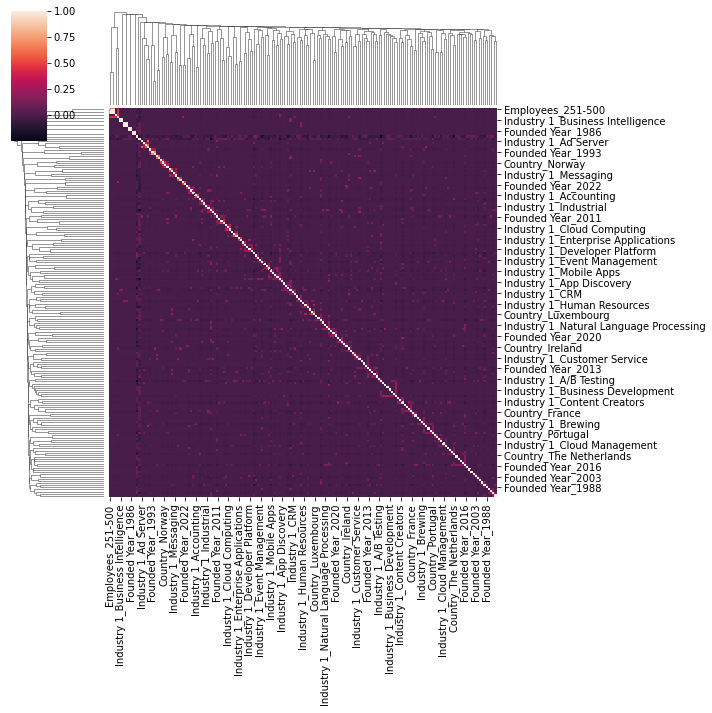

In [247]:
X = pd_stats.drop(GDPR_classes,axis=1) # independant features
X = pd.get_dummies(X, drop_first = True)
sns.clustermap(X.corr())

#### Split data

In [244]:
train, test = train_test_split(pd_stats, test_size=0.2, random_state=42)
X_train = train.drop(GDPR_classes,axis=1) # independant features

#### Encode non-numerical categorical data, and drop first to avoid collinearity

In [245]:
X_train = pd.get_dummies(X_train, drop_first = True)

# Parameter Optimization

#### First without PO

In [288]:
train, test = train_test_split(pd_stats, test_size=0.25, random_state=25)
sel_alpha_list = dict()
acc_last = 0

In [289]:
y_train = train[GDPR_classes[0]] # dependant variable
y_test = test[GDPR_classes[0]] # dependant variable

In [290]:
# independent features
X_train = train.drop(GDPR_classes, axis=1) 
# encode non-numerical categorical data, and drop first to avoid collinearity
X_train = pd.get_dummies(X_train, drop_first = True)

X_test = test.drop(GDPR_classes, axis=1) # independant features
X_test = pd.get_dummies(X_test, drop_first = True)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [294]:
X_train

const  Employees_101-250  Employees_11-50  Employees_251-500  \
1390    1.0                  0                0                  0   
1836    1.0                  0                1                  0   
2781    1.0                  1                0                  0   
210     1.0                  0                1                  0   
2724    1.0                  0                0                  0   
...     ...                ...              ...                ...   
2527    1.0                  0                0                  0   
2164    1.0                  0                0                  0   
1115    1.0                  0                0                  0   
2166    1.0                  0                0                  0   
1005    1.0                  0                0                  0   

      Employees_51-100  Industry 1_A/B Testing  Industry 1_Accounting  \
1390                 0                       0                      0   
1836                 0                       0                      0   
2781                 0                       0                      0   
210                  0                       0                      0   
2724                 0                       0                      1   
...                ...                     ...                    ...   
2527                 0                       0                      0   
2164                 0                       0                      0   
1115                 0                       0                      0   
2166                 0                       0                      0   
1005                 0                       0                      0   

      Industry 1_Ad Server  Industry 1_Advertising  Industry 1_Aerospace  \
1390                     0                       0                     0   
1836                     0                       0                     0   
2781                     0                       0                     0   
210                      0                       0                     0   
2724                     0                       0                     0   
...                    ...                     ...                   ...   
2527                     0                       0                     0   
2164                     0                       0                     0   
1115                     0                       0                     0   
2166                     0                       1                     0   
1005                     0                       0                     0   

      Industry 1_Analytics  Industry 1_Android  Industry 1_Animation  \
1390                     0                   0                     0   
1836                     0                   0                     0   
2781                     0                   0                     0   
210                      0                   0                     0   
2724                     0                   0                     0   
...                    ...                 ...                   ...   
2527                     0                   0                     0   
2164                     0                   0                     0   
1115                     0                   0                     0   
2166                     0                   0                     0   
1005                     0                   0                     0   

      Industry 1_App Discovery  Industry 1_Apps  Industry 1_Architecture  \
1390                         0                0                        0   
1836                         0                0                        0   
2781                         0                0                        0   
210                          0                0                        0   
2724                         0                0                        0   
...                        ...              ...       

In [287]:
model = sm.Logit(y_train,X_train)
logit_model = model.fit()

C:\Users\aaberkan\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


C:\Users\aaberkan\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [ ]:
pred_train = logit_model.predict(X_train)>=.5
pred_test = logit_model.predict(X_test)>=.5

In [ ]:
acc_train = (y_train==pred_train).mean()
acc_test = (y_test==pred_test).mean()

print("Acc: ", acc_test)
print("Alpha: ", alpha_op)

In [279]:
alpha_list = list(np.arange(0.001, 10, 0.1))

##### Optimize parameters

In [282]:
opt_alpha = optimize_logit(pd_stats, True, alpha_list, True)

***************** NEW ROUND!
GDPR-category: Rights
349     1
1608    1
2308    1
2663    1
1778    1
       ..
2527    1
2164    0
1115    0
2166    0
1005    0
Name: Rights, Length: 340, dtype: category
Categories (2, int64): [0, 1]
flag 1
flag 2
Iteration limit reached    (Exit mode 9)
            Current function value: 0.3088550083961797
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000
flag 3
Acc:  0.611764705882353
Alpha:  0.001


C:\Users\aaberkan\Anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 106 out of 181 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\aaberkan\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SystemExit: 0

C:\Users\aaberkan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [261]:
X_train

Employees_101-250  Employees_11-50  Employees_251-500  Employees_51-100  \
141                   0                1                  0                 0   
447                   0                1                  0                 0   
1005                  0                0                  0                 0   
1658                  0                0                  0                 0   
223                   0                0                  0                 0   
...                 ...              ...                ...               ...   
496                   0                0                  0                 0   
752                   0                1                  0                 0   
1909                  0                1                  0                 0   
2347                  0                0                  0                 0   
713                   0                0                  0                 0   

      Industry 1_A/B Testing  Industry 1_Accounting  Industry 1_Ad Server  \
141                        0                      0                     0   
447                        0                      0                     0   
1005                       0                      0                     0   
1658                       0                      0                     0   
223                        0                      0                     0   
...                      ...                    ...                   ...   
496                        0                      0                     0   
752                        0                      0                     0   
1909                       0                      0                     0   
2347                       0                      0                     0   
713                        0                      0                     0   

      Industry 1_Advertising  Industry 1_Aerospace  Industry 1_Analytics  \
141                        0                     0                     0   
447                        0                     0                     0   
1005                       0                     0                     0   
1658                       0                     0                     0   
223                        0                     0                     0   
...                      ...                   ...                   ...   
496                        0                     0                     0   
752                        0                     0                     0   
1909                       1                     0                     0   
2347                       0                     0                     0   
713                        0                     0                     0   

      Industry 1_Android  Industry 1_Animation  Industry 1_App Discovery  \
141                    0                     0                         0   
447                    0                     0                         0   
1005                   0                     0                         0   
1658                   0                     0                         0   
223                    0                     0                         0   
...                  ...                   ...                       ...   
496                    0                     0                         0   
752                    0                     0                         0   
1909                   0                     0                         0   
2347                   0                     0                         0   
713                    0                     0                         0   

      Industry 1_Apps  Industry 1_Architecture  \
141                 0                        0   
447                 1                        0   
1005                0                        0   
1658                0                        0   
223                 0           

In [267]:
y_train

NameError: name 'y_train' is not defined

In [281]:
def optimize_logit(pd_stats, reg, alpha_range, intercept_set):
    train, test = train_test_split(pd_stats, test_size=0.2, random_state=25)
    sel_alpha_list = dict()
    acc_last = 0

    for GDPR_cat in GDPR_classes:
        alpha_sel = alpha_range[0]
        acc_last = 0

        print("***************** NEW ROUND!")
        for alpha_op in alpha_range:
            print("GDPR-category: " + GDPR_class)

            y_train = train[GDPR_class] # dependant variable
            y_test = test[GDPR_class] # dependant variable
            
#             sys.exit(0)

            # independent features
            X_train = train.drop(GDPR_classes, axis=1) 
            # encode non-numerical categorical data, and drop first to avoid collinearity
            X_train = pd.get_dummies(X_train, drop_first = True)

            X_test = test.drop(GDPR_classes, axis=1) # independant features
            X_test = pd.get_dummies(X_test, drop_first = True)

            if(intercept_set):
                X_train = sm.add_constant(X_train)
                X_test = sm.add_constant(X_test)
                
            print(y_train)

            print("flag 1")
            model = sm.Logit(y_train,X_train)
            print("flag 2")

            if(reg):
                logit_model = model.fit_regularized(method = 'l1', trim_mode = 'size', alpha = alpha_op)
            else:
                logit_model = model.fit()

            print("flag 3")

            pred_train = logit_model.predict(X_train)>=.5

            pred_test = logit_model.predict(X_test)>=.5

            acc_train = (y_train==pred_train).mean()

            acc_test = (y_test==pred_test).mean()
            
            print("Acc: ", acc_test)
            print("Alpha: ", alpha_op)

            sys.exit(0)
            if(acc_test >= acc_last):
                print("Alpha selected!")
                alpha_sel = alpha_op 
                acc_last = acc_test

            # last alpha in range? Place optimized alpha and accuracy in dict
            if(alpha_op == alpha_list[-1]):
                sel_alpha_list[GDPR_class] = [alpha_sel, acc_last]
            
            print()
            print()

    return sel_alpha_list